In [1]:
# Dependencies
import pandas as pd
import datetime as dt
import sklearn.datasets as dta
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from prophet import Prophet
from dotenv import load_dotenv
from matplotlib.dates import YearLocator, DateFormatter

In [13]:


data = [
    # November 2020
    ["National", 2020, 11, 37.76, 14.2],
    ["Bay Area", 2020, 11, 54.21, 14.3],
    ["New Jersey", 2020, 11, 32.84, 17.0],
    ["Nashville", 2020, 11, 30.72, 16.9],
    ["Austin", 2020, 11, 42.11, 11.5],
    ["Miami", 2020, 11, 42.54, 15.1],
    ["Washington DC", 2020, 11, 41.21, 15.5],
    ["San Diego", 2020, 11, 38.43, 14.2],
    ["Charlotte", 2020, 11, 28.78, 10.9],
    ["Philadelphia", 2020, 11, 29.29, 12.7],
    ["Houston", 2020, 11, 29.52, 22.1],
    ["Orlando", 2020, 11, 21.41, 14.7],
    ["Los Angeles", 2020, 11, 39.32, 13.3],
    ["Denver", 2020, 11, 28.83, 14.3],
    ["Phoenix", 2020, 11, 27.40, 17.4],
    ["Portland", 2020, 11, 29.66, 12.5],
    ["Tampa", 2020, 11, 28.65, 12.6],
    ["Twin Cities", 2020, 11, 26.80, 13.8],
    ["Dallas", 2020, 11, 28.50, 18.6],
    ["Manhattan", 2020, 11, 82.40, 10.3],
    ["Atlanta", 2020, 11, 27.01, 17.8],
    ["Seattle", 2020, 11, 36.59, 10.9],
    ["Chicago", 2020, 11, 27.93, 15.5],
    ["Boston", 2020, 11, 34.37, 10.8],
    ["Brooklyn", 2020, 11, 50.45, 13.6],
    ["San Francisco", 2020, 11, 64.34, 10.9],
    
    # August 2020
    ["National", 2020, 8, 38.07, 13.6],
    ["San Diego", 2020, 8, 42.61, 14.3],
    ["Bay Area", 2020, 8, 53.10, 13.8],
    ["Miami", 2020, 8, 42.35, 12.6],
    ["Manhattan", 2020, 8, 86.62, 8.8],
    ["Denver", 2020, 8, 29.07, 12.9],
    ["Austin", 2020, 8, 42.36, 10.6],
    ["New Jersey", 2020, 8, 32.28, 18.3],
    ["Los Angeles", 2020, 8, 38.74, 12.5],
    ["Atlanta", 2020, 8, 26.87, 17.5],
    ["Orlando", 2020, 8, 21.42, 12.5],
    ["Charlotte", 2020, 8, 28.66, 10.9],
    ["Houston", 2020, 8, 29.96, 22.0],
    ["Washington DC", 2020, 8, 39.90, 15.1],
    ["Phoenix", 2020, 8, 27.69, 17.5],
    ["Portland", 2020, 8, 29.55, 12.5],
    ["Twin Cities", 2020, 8, 27.27, 12.6],
    ["Philadelphia", 2020, 8, 28.46, 12.6],
    ["Dallas", 2020, 8, 27.68, 18.9],
    ["Chicago", 2020, 8, 28.32, 14.2],
    ["Boston", 2020, 8, 34.14, 10.1],
    ["Nashville", 2020, 8, 29.91, 12.3],
    ["Brooklyn", 2020, 8, 51.03, 13.9],
    ["Seattle", 2020, 8, 35.96, 9.6],
    ["Tampa", 2020, 8, 27.43, 12.5],
    ["San Francisco", 2020, 8, 64.18, 9.8],
    
    # November 2022
    ["National", 2022, 11, 38.06, 16.2],
    ["Charlotte", 2022, 11, 34.22, 12.6],
    ["Orlando", 2022, 11, 24.57, 15.9],
    ["Miami", 2022, 11, 49.63, 9.8],
    ["San Diego", 2022, 11, 43.73, 14.5],
    ["San Francisco", 2022, 11, 67.23, 19.1],
    ["Seattle", 2022, 11, 37.56, 18.1],
    ["Atlanta", 2022, 11, 30.29, 20.7],
    ["Nashville", 2022, 11, 31.20, 17.8],
    ["Chicago", 2022, 11, 27.89, 19.3],
    ["Phoenix", 2022, 11, 27.70, 15.4],
    ["Philadelphia", 2022, 11, 30.27, 12.9],
    ["Washington DC", 2022, 11, 41.53, 14.3],
    ["Houston", 2022, 11, 30.16, 26.3],
    ["Bay Area", 2022, 11, 55.77, 16.2],
    ["Twin Cities", 2022, 11, 26.13, 14.4],
    ["Manhattan", 2022, 11, 74.73, 14.8],
    ["Los Angeles", 2022, 11, 42.32, 14.8],
    ["Boston", 2022, 11, 37.53, 8.9],
    ["New Jersey", 2022, 11, 33.01, 17.5],
    ["Dallas", 2022, 11, 28.76, 18.2],
    ["Denver", 2022, 11, 29.92, 18.7],
    ["Austin", 2022, 11, 41.74, 18.3],
    ["Tampa", 2022, 11, 27.53, 12.0],
    ["Portland", 2022, 11, 28.65, 15.6],
    ["Brooklyn", 2022, 11, 47.12, 17.7],
    
    # October 2023
    ["National", 2023, 10, 37.77, 17.8],
    ["Boston", 2023, 10, 45.61, 10.3],
    ["New Jersey", 2023, 10, 34.60, 17.5],
    ["Twin Cities", 2023, 10, 26.71, 17.2],
    ["Atlanta", 2023, 10, 31.20, 17.0],
    ["Philadelphia", 2023, 10, 31.77, 13.8],
    ["Houston", 2023, 10, 30.69, 25.0],
    ["Denver", 2023, 10, 30.70, 21.9],
    ["Chicago", 2023, 10, 27.84, 17.2],
    ["Seattle", 2023, 10, 37.55, 21.8],
    ["Phoenix", 2023, 10, 27.68, 17.8],
    ["Detroit", 2023, 10, 21.50, 27.8],
    ["Austin", 2023, 10, 41.88, 20.5],
    ["Orlando", 2023, 10, 23.65, 16.5],
    ["Tampa", 2023, 10, 28.27, 14.2],
    ["Washington DC", 2023, 10, 40.65, 15.7],
    ["Los Angeles", 2023, 10, 41.84, 16.0],
    ["Nashville", 2023, 10, 30.29, 16.1],
    ["Bay Area", 2023, 10, 54.01, 18.9],
    ["San Diego", 2023, 10, 42.47, 18.2],
    ["Dallas", 2023, 10, 27.57, 19.5],
    ["Manhattan", 2023, 10, 70.71, 17.4],
    ["San Francisco", 2023, 10, 63.08, 22.6],
    ["Charlotte", 2023, 10, 31.80, 15.7],
    ["Portland", 2023, 10, 27.62, 16.4],
    ["Miami", 2023, 10, 44.83, 14.5],
    
    # March 2024
    ["National", 2024, 3, 37.74, 18.2],
    ["Manhattan", 2024, 3, 71.30, 17.6],
    ["San Francisco", 2024, 3, 60.81, 24.2],
    ["Bay Area", 2024, 3, 52.70, 20.8],
    ["Miami", 2024, 3, 49.05, 13.3],
    ["Los Angeles", 2024, 3, 41.19, 16.4],
    ["Seattle", 2024, 3, 37.71, 22.6],
    ["Dallas", 2024, 3, 29.08, 21.6],
    ["Austin", 2024, 3, 42.79, 22.0],
    ["Washington DC", 2024, 3, 40.72, 16.5],
    ["Boston", 2024, 3, 49.50, 12.8],
    ["Chicago", 2024, 3, 28.68, 19.0],
    ["Denver", 2024, 3, 30.24, 22.7],
    ["San Diego", 2024, 3, 42.76, 18.2],
    ["Tampa", 2024, 3, 28.62, 12.7],
    ["Houston", 2024, 3, 29.54, 23.5],
    ["Atlanta", 2024, 3, 31.54, 17.0],
    ["Phoenix", 2024, 3, 27.60, 18.0],
    ["New Jersey", 2024, 3, 34.79, 18.1],
    ["Philadelphia", 2024, 3, 31.85, 15.7],
    ["Charlotte", 2024, 3, 31.30, 14.5],
    ["Nashville", 2024, 3, 30.21, 15.5],
    ["Portland", 2024, 3, 27.84, 16.8],
    ["Orlando", 2024, 3, 24.44, 17.0],
    ["Twin Cities", 2024, 3, 25.80, 17.9],
    ["Detroit", 2024, 3, 22.36, 32.1],
    
    # May 2024
    ["National", 2024, 5, 37.72, 17.8],
    ["Boston", 2024, 5, 46.71, 12.1],
    ["Dallas", 2024, 5, 28.99, 21.6],
    ["Miami", 2024, 5, 49.08, 12.3],
    ["Atlanta", 2024, 5, 31.84, 18.5],
    ["Detroit", 2024, 5, 22.43, 20.8],
    ["Tampa", 2024, 5, 29.62, 13.1],
    ["Chicago", 2024, 5, 27.73, 19.1],
    ["Austin", 2024, 5, 42.48, 23.3],
    ["Phoenix", 2024, 5, 27.70, 18.2],
    ["Philadelphia", 2024, 5, 31.24, 15.3],
    ["Orlando", 2024, 5, 24.53, 15.7],
    ["New Jersey", 2024, 5, 34.80, 17.3],
    ["Nashville", 2024, 5, 30.30, 15.0],
    ["Bay Area", 2024, 5, 53.70, 20.0],
    ["Washington DC", 2024, 5, 39.80, 16.0],
    ["Denver", 2024, 5, 30.05, 23.0],
    ["Charlotte", 2024, 5, 30.04, 14.7],
    ["Manhattan", 2024, 5, 71.30, 16.2],
    ["Houston", 2024, 5, 29.56, 22.5],
    ["Los Angeles", 2024, 5, 40.87, 16.7],
    ["Portland", 2024, 5, 27.50, 16.5],
    ["Seattle", 2024, 5, 36.78, 23.0],
    ["San Francisco", 2024, 5, 60.79, 25.2],
    ["Twin Cities", 2024, 5, 24.91, 16.2],
    ["San Diego", 2024, 5, 42.54, 18.5],

    # October 2022
    ["National", 2022, 10, 37.94, 16.3],
    ["Charlotte", 2022, 10, 34.09, 12.5],
    ["San Diego", 2022, 10, 43.91, 14.5],
    ["Boston", 2022, 10, 40.20, 8.9],
    ["Miami", 2022, 10, 48.71, 12.7],
    ["Orlando", 2022, 10, 23.67, 16.8],
    ["San Francisco", 2022, 10, 66.75, 19.5],
    ["Seattle", 2022, 10, 37.18, 17.9],
    ["Philadelphia", 2022, 10, 30.76, 14.2],
    ["Atlanta", 2022, 10, 30.05, 21.1],
    ["Los Angeles", 2022, 10, 42.70, 14.6],
    ["Phoenix", 2022, 10, 27.44, 15.3],
    ["Washington DC", 2022, 10, 41.40, 14.3],
    ["New Jersey", 2022, 10, 33.15, 17.4],
    ["Nashville", 2022, 10, 30.93, 18.7],
    ["Bay Area", 2022, 10, 55.64, 16.0],
    ["Chicago", 2022, 10, 27.55, 19.7],
    ["Houston", 2022, 10, 29.76, 25.2],
    ["Denver", 2022, 10, 30.02, 18.5],
    ["Dallas", 2022, 10, 28.62, 18.5],
    ["Portland", 2022, 10, 29.94, 17.5],
    ["Manhattan", 2022, 10, 74.75, 14.6],
    ["Twin Cities", 2022, 10, 25.62, 13.2],
    ["Tampa", 2022, 10, 28.39, 17.2],
    ["Austin", 2022, 10, 41.76, 18.2],
    ["Brooklyn", 2022, 10, 44.10, 19.4],
    
    # August 2019
    ["National", 2019, 8, 36.48, 13.4],
    ["San Francisco", 2019, 8, 72.48, 8.0],
    ["Tampa", 2019, 8, 29.65, 11.2],
    ["Nashville", 2019, 8, 32.76, 11.0],
    ["Austin", 2019, 8, 42.48, 8.7],
    ["Brooklyn", 2019, 8, 58.03, 8.2],
    ["Bay Area", 2019, 8, 46.62, 14.7],
    ["Miami", 2019, 8, 38.75, 13.6],
    ["Dallas", 2019, 8, 28.44, 18.5],
    ["Philadelphia", 2019, 8, 29.08, 12.8],
    ["Phoenix", 2019, 8, 27.27, 16.6],
    ["Houston", 2019, 8, 29.53, 21.6],
    ["San Diego", 2019, 8, 38.07, 12.2],
    ["Los Angeles", 2019, 8, 37.73, 12.6],
    ["Twin Cities", 2019, 8, 26.84, 12.6],
    ["Atlanta", 2019, 8, 26.24, 16.4],
    ["Charlotte", 2019, 8, 27.99, 10.5],
    ["Manhattan", 2019, 8, 75.67, 7.7],
    ["Portland", 2019, 8, 29.39, 12.4],
    ["New Jersey", 2019, 8, 31.28, 20.7],
    ["Boston", 2019, 8, 36.35, 9.6],
    ["Denver", 2019, 8, 27.85, 13.5],
    ["Seattle", 2019, 8, 36.68, 8.5],
    ["Chicago", 2019, 8, 28.93, 15.2],
    ["Orlando", 2019, 8, 21.13, 11.6],
    ["Washington DC", 2019, 8, 38.85, 14.6],
    
    # January 2021
    ["National", 2021, 1, 38.32, 14.6],
    ["San Diego", 2021, 1, 41.21, 13.9],
    ["Bay Area", 2021, 1, 54.45, 15.1],
    ["New Jersey", 2021, 1, 32.65, 17.9],
    ["Nashville", 2021, 1, 30.57, 17.1],
    ["Washington DC", 2021, 1, 41.33, 15.6],
    ["Miami", 2021, 1, 42.60, 15.3],
    ["Manhattan", 2021, 1, 85.21, 10.5],
    ["Los Angeles", 2021, 1, 40.20, 13.6],
    ["Philadelphia", 2021, 1, 29.30, 12.8],
    ["Austin", 2021, 1, 42.34, 12.1],
    ["Phoenix", 2021, 1, 27.49, 18.4],
    ["Charlotte", 2021, 1, 28.92, 12.5],
    ["Tampa", 2021, 1, 29.24, 12.8],
    ["Orlando", 2021, 1, 21.60, 14.9],
    ["Houston", 2021, 1, 29.52, 22.5],
    ["Dallas", 2021, 1, 28.66, 18.5],
    ["Portland", 2021, 1, 29.60, 13.8],
    ["Atlanta", 2021, 1, 26.98, 18.6],
    ["Denver", 2021, 1, 28.64, 14.3],
    ["Twin Cities", 2021, 1, 26.66, 16.5],
    ["Chicago", 2021, 1, 27.99, 15.8],
    ["Seattle", 2021, 1, 35.53, 11.8],
    ["Brooklyn", 2021, 1, 50.48, 15.0],
    ["Boston", 2021, 1, 35.05, 11.1],
    ["San Francisco", 2021, 1, 64.46, 11.8],
    
    # February 2024
    ["National", 2024, 2, 37.83, 17.9],
    ["Boston", 2024, 2, 45.62, 12.2],
    ["Tampa", 2024, 2, 30.80, 13.3],
    ["Miami", 2024, 2, 49.64, 12.2],
    ["Detroit", 2024, 2, 22.39, 31.3],
    ["Atlanta", 2024, 2, 31.54, 17.1],
    ["New Jersey", 2024, 2, 34.47, 18.7],
    ["Denver", 2024, 2, 30.58, 22.1],
    ["Phoenix", 2024, 2, 27.82, 17.9],
    ["Philadelphia", 2024, 2, 31.22, 15.5],
    ["Washington DC", 2024, 2, 40.29, 16.1],
    ["Twin Cities", 2024, 2, 25.84, 16.6],
    ["Austin", 2024, 2, 40.33, 22.1],
    ["Seattle", 2024, 2, 37.87, 22.5],
    ["Chicago", 2024, 2, 27.62, 18.0],
    ["Los Angeles", 2024, 2, 41.78, 16.0],
    ["Orlando", 2024, 2, 24.08, 17.1],
    ["Houston", 2024, 2, 29.46, 24.4],
    ["Nashville", 2024, 2, 30.19, 16.5],
    ["Dallas", 2024, 2, 27.62, 21.1],
    ["Manhattan", 2024, 2, 71.53, 16.8],
    ["San Diego", 2024, 2, 42.80, 16.6],
    ["Bay Area", 2024, 2, 54.12, 20.8],
    ["Portland", 2024, 2, 27.66, 16.0],
    ["Charlotte", 2024, 2, 30.78, 14.0],
    ["San Francisco", 2024, 2, 59.81, 24.0],
    
    # May 2019
    ["National", 2019, 5, 36.33, 13.7],
    ["Brooklyn", 2019, 5, 54.30, 9.7],
    ["Houston", 2019, 5, 29.78, 20.8],
    ["San Francisco", 2019, 5, 69.43, 8.1],
    ["Orlando", 2019, 5, 22.22, 11.8],
    ["Bay Area", 2019, 5, 47.25, 15.2],
    ["Charlotte", 2019, 5, 28.03, 10.5],
    ["Nashville", 2019, 5, 29.22, 9.9],
    ["Twin Cities", 2019, 5, 26.55, 11.9],
    ["San Diego", 2019, 5, 37.31, 12.5],
    ["Austin", 2019, 5, 38.48, 9.5],
    ["Tampa", 2019, 5, 25.82, 11.7],
    ["Manhattan", 2019, 5, 75.04, 8.4],
    ["Miami", 2019, 5, 38.28, 13.6],
    ["Denver", 2019, 5, 27.93, 13.7],
    ["New Jersey", 2019, 5, 32.10, 20.4],
    ["Washington DC", 2019, 5, 39.37, 14.6],
    ["Los Angeles", 2019, 5, 38.19, 13.4],
    ["Portland", 2019, 5, 28.11, 12.7],
    ["Chicago", 2019, 5, 29.80, 14.7],
    ["Phoenix", 2019, 5, 26.96, 17.2],
    ["Dallas", 2019, 5, 27.90, 18.7],
    ["Atlanta", 2019, 5, 25.90, 16.0],
    ["Philadelphia", 2019, 5, 29.01, 13.0],
    ["Boston", 2019, 5, 37.63, 9.9],
    ["Seattle", 2019, 5, 36.54, 8.5],
    
    # June 2023
    ["National", 2023, 6, 37.82, 17.1],
    ["Boston", 2023, 6, 48.28, 10.6],
    ["San Diego", 2023, 6, 46.83, 15.5],
    ["Philadelphia", 2023, 6, 30.92, 12.9],
    ["New Jersey", 2023, 6, 34.51, 17.3],
    ["Twin Cities", 2023, 6, 27.25, 17.5],
    ["Orlando", 2023, 6, 24.50, 14.2],
    ["Atlanta", 2023, 6, 30.68, 19.4],
    ["Seattle", 2023, 6, 38.68, 20.1],
    ["Phoenix", 2023, 6, 27.73, 18.8],
    ["Washington DC", 2023, 6, 40.57, 14.6],
    ["Denver", 2023, 6, 30.62, 20.4],
    ["Los Angeles", 2023, 6, 42.18, 13.4],
    ["Chicago", 2023, 6, 27.40, 18.9],
    ["Nashville", 2023, 6, 30.27, 17.5],
    ["San Francisco", 2023, 6, 63.61, 21.1],
    ["Tampa", 2023, 6, 27.92, 14.8],
    ["Austin", 2023, 6, 42.23, 19.9],
    ["Houston", 2023, 6, 30.39, 23.4],
    ["Miami", 2023, 6, 46.93, 12.7],
    ["Manhattan", 2023, 6, 70.56, 17.2],
    ["Portland", 2023, 6, 28.71, 15.7],
    ["Bay Area", 2023, 6, 53.62, 18.2],
    ["Dallas", 2023, 6, 27.16, 17.5],
    ["Brooklyn", 2023, 6, 44.47, 12.8],
    ["Charlotte", 2023, 6, 30.69, 11.8],

    # March 2022
    ["National", 2022, 3, 38.65, 15.9],
    ["Boston", 2022, 3, 38.96, 10.5],
    ["Miami", 2022, 3, 47.38, 12.8],
    ["Charlotte", 2022, 3, 31.99, 14.7],
    ["Atlanta", 2022, 3, 29.30, 21.7],
    ["Brooklyn", 2022, 3, 53.04, 17.0],
    ["Denver", 2022, 3, 30.03, 17.2],
    ["Orlando", 2022, 3, 22.10, 15.8],
    ["Los Angeles", 2022, 3, 41.49, 13.7],
    ["Houston", 2022, 3, 30.33, 24.9],
    ["Austin", 2022, 3, 43.30, 15.9],
    ["Dallas", 2022, 3, 28.70, 17.3],
    ["Bay Area", 2022, 3, 56.89, 15.1],
    ["Seattle", 2022, 3, 35.71, 14.9],
    ["Chicago", 2022, 3, 27.34, 20.3],
    ["Philadelphia", 2022, 3, 29.25, 13.3],
    ["San Diego", 2022, 3, 40.40, 13.6],
    ["Washington DC", 2022, 3, 41.61, 16.8],
    ["New Jersey", 2022, 3, 32.51, 17.6],
    ["Nashville", 2022, 3, 30.52, 18.8],
    ["Tampa", 2022, 3, 27.70, 16.0],
    ["Phoenix", 2022, 3, 26.73, 15.1],
    ["Twin Cities", 2022, 3, 25.34, 14.5],
    ["Portland", 2022, 3, 27.99, 12.3],
    ["San Francisco", 2022, 3, 63.04, 17.3],
    ["Manhattan", 2022, 3, 74.20, 14.4],

    # May 2023
    ["National", 2023, 5, 38.36, 17.0],
    ["Brooklyn", 2023, 5, 50.71, 17.1],
    ["Charlotte", 2023, 5, 29.09, 12.1],
    ["Bay Area", 2023, 5, 53.22, 17.7],
    ["Dallas", 2023, 5, 27.91, 17.1],
    ["Miami", 2023, 5, 42.55, 11.8],
    ["Nashville", 2023, 5, 30.76, 18.5],
    ["Houston", 2023, 5, 29.47, 23.2],
    ["Austin", 2023, 5, 42.40, 20.7],
    ["Los Angeles", 2023, 5, 39.09, 14.2],
    ["Denver", 2023, 5, 28.86, 20.2],
    ["Tampa", 2023, 5, 28.69, 14.8],
    ["Chicago", 2023, 5, 28.09, 18.8],
    ["Washington DC", 2023, 5, 40.86, 15.3],
    ["Portland", 2023, 5, 29.69, 15.7],
    ["Atlanta", 2023, 5, 27.11, 19.4],
    ["Phoenix", 2023, 5, 26.52, 18.5],
    ["Manhattan", 2023, 5, 85.94, 17.0],
    ["Seattle", 2023, 5, 36.54, 19.5],
    ["San Francisco", 2023, 5, 64.40, 20.0],
    ["Twin Cities", 2023, 5, 26.68, 16.9],
    ["Orlando", 2023, 5, 21.37, 16.5],
    ["New Jersey", 2023, 5, 31.82, 16.9],
    ["Philadelphia", 2023, 5, 29.07, 13.3],
    ["Boston", 2023, 5, 34.91, 10.3],
    ["San Diego", 2023, 5, 39.22, 15.4],

    # December 2018
    ["National", 2018, 12, 33.41, 14.0],
    ["San Francisco", 2018, 12, 58.86, 8.4],
    ["Bay Area", 2018, 12, 42.89, 15.2],
    ["San Diego", 2018, 12, 37.40, 12.4],
    ["Philadelphia", 2018, 12, 28.47, 11.9],
    ["Los Angeles", 2018, 12, 37.66, 13.9],
    ["Dallas", 2018, 12, 27.53, 19.6],
    ["Manhattan", 2018, 12, 75.92, 9.0],
    ["Tampa", 2018, 12, 25.56, 11.5],
    ["Phoenix", 2018, 12, 26.58, 17.3],
    ["Nashville", 2018, 12, 28.36, 11.2],
    ["Houston", 2018, 12, 28.57, 22.4],
    ["Atlanta", 2018, 12, 25.69, 15.8],
    ["Boston", 2018, 12, 37.11, 10.1],
    ["Denver", 2018, 12, 28.32, 14.7],
    ["Seattle", 2018, 12, 36.18, 9.5],
    ["Miami", 2018, 12, 37.96, 13.5],
    ["Twin Cities", 2018, 12, 26.14, 11.9],
    ["New Jersey", 2018, 12, 32.52, 20.8],
    ["Orlando", 2018, 12, 21.90, 11.7],
    ["Chicago", 2018, 12, 29.58, 15.9],
    ["Austin", 2018, 12, 35.99, 10.1],
    ["Brooklyn", 2018, 12, 47.94, 8.7],
    ["Charlotte", 2018, 12, 26.92, 11.3],
    ["Portland", 2018, 12, 28.39, 12.7],
    ["Washington DC", 2018, 12, 38.87, 14.7],

    # February 2021
    ["National", 2021, 2, 38.31, 15.0],
    ["Nashville", 2021, 2, 31.06, 17.1],
    ["Washington DC", 2021, 2, 41.87, 15.7],
    ["Bay Area", 2021, 2, 54.33, 16.2],
    ["New Jersey", 2021, 2, 32.86, 17.9],
    ["Miami", 2021, 2, 42.60, 15.8],
    ["Los Angeles", 2021, 2, 40.22, 13.8],
    ["Charlotte", 2021, 2, 29.06, 12.9],
    ["Atlanta", 2021, 2, 27.54, 18.8],
    ["San Diego", 2021, 2, 39.44, 13.9],
    ["Phoenix", 2021, 2, 27.46, 18.3],
    ["Manhattan", 2021, 2, 85.17, 10.5],
    ["Tampa", 2021, 2, 28.38, 14.2],
    ["Orlando", 2021, 2, 21.47, 15.4],
    ["Philadelphia", 2021, 2, 29.20, 12.7],
    ["Houston", 2021, 2, 29.47, 23.5],
    ["Austin", 2021, 2, 42.43, 15.1],
    ["Denver", 2021, 2, 28.77, 14.7],
    ["Portland", 2021, 2, 29.71, 13.9],
    ["Dallas", 2021, 2, 28.06, 19.0],
    ["Twin Cities", 2021, 2, 26.50, 16.5],
    ["Chicago", 2021, 2, 28.04, 16.6],
    ["Seattle", 2021, 2, 35.34, 13.0],
    ["Brooklyn", 2021, 2, 50.48, 14.8],
    ["Boston", 2021, 2, 34.64, 11.4],
    ["San Francisco", 2021, 2, 64.30, 12.8],

    # February 2020
    ["National", 2020, 2, 38.25, 13.4],
    ["Manhattan", 2020, 2, 86.11, 7.7],
    ["Austin", 2020, 2, 42.72, 7.9],
    ["Miami", 2020, 2, 41.58, 13.1],
    ["Brooklyn", 2020, 2, 55.94, 13.6],
    ["Bay Area", 2020, 2, 50.86, 13.3],
    ["Tampa", 2020, 2, 29.26, 11.7],
    ["San Diego", 2020, 2, 39.09, 11.4],
    ["San Francisco", 2020, 2, 71.84, 7.3],
    ["Atlanta", 2020, 2, 27.52, 15.9],
    ["Denver", 2020, 2, 28.90, 13.1],
    ["Houston", 2020, 2, 29.95, 21.3],
    ["Los Angeles", 2020, 2, 39.59, 12.0],
    ["Twin Cities", 2020, 2, 26.95, 12.0],
    ["Portland", 2020, 2, 30.01, 12.2],
    ["Charlotte", 2020, 2, 28.25, 10.5],
    ["Orlando", 2020, 2, 21.72, 11.6],
    ["Phoenix", 2020, 2, 27.13, 18.4],
    ["Washington DC", 2020, 2, 39.18, 13.9],
    ["Seattle", 2020, 2, 38.56, 8.2],
    ["New Jersey", 2020, 2, 31.43, 22.1],
    ["Dallas", 2020, 2, 27.70, 17.5],
    ["Philadelphia", 2020, 2, 28.88, 13.1],
    ["Nashville", 2020, 2, 30.08, 12.7],
    ["Chicago", 2020, 2, 28.79, 14.3],
    ["Boston", 2020, 2, 36.55, 9.9],

    # May 2022
    ["National", 2022, 5, 37.56, 15.4],
    ["Charlotte", 2022, 5, 33.08, 14.7],
    ["Boston", 2022, 5, 39.02, 9.7],
    ["Miami", 2022, 5, 47.08, 13.1],
    ["Atlanta", 2022, 5, 29.50, 20.0],
    ["Phoenix", 2022, 5, 28.49, 13.9],
    ["Orlando", 2022, 5, 23.11, 15.1],
    ["San Diego", 2022, 5, 40.78, 12.5],
    ["Houston", 2022, 5, 31.14, 24.6],
    ["New Jersey", 2022, 5, 33.21, 18.0],
    ["Brooklyn", 2022, 5, 49.74, 17.3],
    ["Austin", 2022, 5, 44.52, 15.6],
    ["Dallas", 2022, 5, 29.17, 18.0],
    ["Bay Area", 2022, 5, 56.52, 15.3],
    ["Denver", 2022, 5, 30.31, 17.3],
    ["Seattle", 2022, 5, 36.35, 15.6],
    ["Los Angeles", 2022, 5, 41.66, 13.0],
    ["Chicago", 2022, 5, 27.33, 19.5],
    ["Nashville", 2022, 5, 30.63, 18.0],
    ["Philadelphia", 2022, 5, 28.68, 12.6],
    ["Twin Cities", 2022, 5, 25.56, 13.4],
    ["Tampa", 2022, 5, 27.80, 14.6],
    ["Washington DC", 2022, 5, 39.94, 14.8],
    ["Portland", 2022, 5, 27.61, 11.9],
    ["San Francisco", 2022, 5, 62.57, 17.2],
    ["Manhattan", 2022, 5, 72.93, 14.1],

    # March 2023
    ["National", 2023, 3, 38.22, 16.7],
    ["San Diego", 2023, 3, 47.98, 14.4],
    ["Orlando", 2023, 3, 24.58, 16.3],
    ["Seattle", 2023, 3, 39.46, 18.6],
    ["Philadelphia", 2023, 3, 31.37, 14.3],
    ["Twin Cities", 2023, 3, 26.93, 15.9],
    ["Portland", 2023, 3, 29.36, 16.7],
    ["San Francisco", 2023, 3, 66.07, 19.1],
    ["Atlanta", 2023, 3, 30.62, 19.8],
    ["Nashville", 2023, 3, 31.73, 17.4],
    ["Phoenix", 2023, 3, 27.51, 18.2],
    ["Charlotte", 2023, 3, 32.85, 11.4],
    ["Chicago", 2023, 3, 28.00, 19.1],
    ["Denver", 2023, 3, 30.61, 19.4],
    ["New Jersey", 2023, 3, 33.13, 17.0],
    ["Houston", 2023, 3, 30.66, 23.4],
    ["Bay Area", 2023, 3, 57.41, 17.3],
    ["Los Angeles", 2023, 3, 42.39, 14.7],
    ["Manhattan", 2023, 3, 74.22, 16.5],
    ["Tampa", 2023, 3, 27.78, 16.3],
    ["Miami", 2023, 3, 47.27, 11.9],
    ["Boston", 2023, 3, 38.77, 9.9],
    ["Dallas", 2023, 3, 28.39, 16.6],
    ["Washington DC", 2023, 3, 40.44, 14.8],
    ["Austin", 2023, 3, 40.95, 22.2],
    ["Brooklyn", 2023, 3, 42.45, 19.4],

    # June 2022
    ["National", 2022, 6, 37.58, 15.2],
    ["Charlotte", 2022, 6, 33.45, 14.5],
    ["Boston", 2022, 6, 39.31, 9.6],
    ["Miami", 2022, 6, 47.23, 12.9],
    ["San Diego", 2022, 6, 41.60, 12.8],
    ["Atlanta", 2022, 6, 29.47, 20.3],
    ["Orlando", 2022, 6, 23.43, 14.4],
    ["Seattle", 2022, 6, 37.41, 15.9],
    ["Bay Area", 2022, 6, 56.78, 15.5],
    ["New Jersey", 2022, 6, 32.69, 17.2],
    ["San Francisco", 2022, 6, 63.63, 17.4],
    ["Los Angeles", 2022, 6, 42.01, 13.1],
    ["Dallas", 2022, 6, 29.24, 17.9],
    ["Brooklyn", 2022, 6, 48.40, 16.8],
    ["Phoenix", 2022, 6, 26.96, 13.9],
    ["Houston", 2022, 6, 30.52, 23.8],
    ["Philadelphia", 2022, 6, 29.09, 13.1],
    ["Denver", 2022, 6, 30.14, 17.3],
    ["Portland", 2022, 6, 29.99, 14.0],
    ["Austin", 2022, 6, 42.39, 16.1],
    ["Chicago", 2022, 6, 27.30, 19.5],
    ["Nashville", 2022, 6, 30.27, 18.4],
    ["Twin Cities", 2022, 6, 25.83, 14.0],
    ["Tampa", 2022, 6, 27.95, 13.8],
    ["Washington DC", 2022, 6, 39.89, 14.5],
    ["Manhattan", 2022, 6, 72.59, 13.9],

    # February 2021
    ["National", 2021, 2, 38.31, 15.0],
    ["Nashville", 2021, 2, 31.06, 17.1],
    ["Washington DC", 2021, 2, 41.87, 15.7],
    ["Bay Area", 2021, 2, 54.33, 16.2],
    ["New Jersey", 2021, 2, 32.86, 17.9],
    ["Miami", 2021, 2, 42.60, 15.8],
    ["Los Angeles", 2021, 2, 40.22, 13.8],
    ["Charlotte", 2021, 2, 29.06, 12.9],
    ["Atlanta", 2021, 2, 27.54, 18.8],
    ["San Diego", 2021, 2, 39.44, 13.9],
    ["Phoenix", 2021, 2, 27.46, 18.3],
    ["Manhattan", 2021, 2, 85.17, 10.5],
    ["Tampa", 2021, 2, 28.38, 14.2],
    ["Orlando", 2021, 2, 21.47, 15.4],
    ["Philadelphia", 2021, 2, 29.20, 12.7],
    ["Houston", 2021, 2, 29.47, 23.5],
    ["Austin", 2021, 2, 42.43, 15.1],
    ["Denver", 2021, 2, 28.77, 14.7],
    ["Portland", 2021, 2, 29.71, 13.9],
    ["Dallas", 2021, 2, 28.06, 19.0],
    ["Twin Cities", 2021, 2, 26.50, 16.5],
    ["Chicago", 2021, 2, 28.04, 16.6],
    ["Seattle", 2021, 2, 35.34, 13.0],
    ["Brooklyn", 2021, 2, 50.48, 14.8],
    ["Boston", 2021, 2, 34.64, 11.4],
    ["San Francisco", 2021, 2, 64.30, 12.8],

    # June 2020
    ["National", 2020, 6, 38.29, 14.7],
    ["Tampa", 2020, 6, 29.52, 12.9],
    ["Nashville", 2020, 6, 32.10, 13.7],
    ["Miami", 2020, 6, 42.92, 14.5],
    ["Atlanta", 2020, 6, 27.76, 18.1],
    ["Manhattan", 2020, 6, 86.63, 9.1],
    ["Bay Area", 2020, 6, 50.91, 16.0],
    ["New Jersey", 2020, 6, 33.02, 23.9],
    ["San Diego", 2020, 6, 39.40, 17.0],
    ["Los Angeles", 2020, 6, 39.68, 12.5],
    ["Houston", 2020, 6, 30.72, 23.3],
    ["Denver", 2020, 6, 29.47, 13.6],
    ["Austin", 2020, 6, 42.01, 9.3],
    ["Charlotte", 2020, 6, 28.99, 11.1],
    ["San Francisco", 2020, 6, 67.16, 9.5],
    ["Portland", 2020, 6, 30.31, 13.7],
    ["Philadelphia", 2020, 6, 28.72, 13.6],
    ["Twin Cities", 2020, 6, 26.95, 14.9],
    ["Seattle", 2020, 6, 37.77, 9.0],
    ["Washington DC", 2020, 6, 40.39, 17.1],
    ["Chicago", 2020, 6, 28.81, 15.4],
    ["Phoenix", 2020, 6, 26.71, 21.9],
    ["Dallas", 2020, 6, 27.69, 19.5],
    ["Orlando", 2020, 6, 21.44, 14.0],
    ["Boston", 2020, 6, 33.94, 11.0],
    ["Brooklyn", 2020, 6, 51.28, 18.7],

    # March 2021
    ["National", 2021, 3, 38.67, 15.6],
    ["Bay Area", 2021, 3, 57.11, 19.3],
    ["Washington DC", 2021, 3, 42.21, 15.8],
    ["New Jersey", 2021, 3, 33.04, 18.6],
    ["Los Angeles", 2021, 3, 40.43, 13.8],
    ["Atlanta", 2021, 3, 27.68, 19.6],
    ["San Diego", 2021, 3, 40.58, 14.0],
    ["Nashville", 2021, 3, 31.34, 19.0],
    ["Miami", 2021, 3, 42.22, 15.6],
    ["Phoenix", 2021, 3, 27.72, 18.5],
    ["Denver", 2021, 3, 28.72, 16.0],
    ["Austin", 2021, 3, 42.40, 16.0],
    ["Philadelphia", 2021, 3, 29.36, 13.4],
    ["Orlando", 2021, 3, 21.32, 14.9],
    ["Manhattan", 2021, 3, 85.82, 10.7],
    ["Tampa", 2021, 3, 28.35, 15.1],
    ["Portland", 2021, 3, 30.17, 15.0],
    ["Dallas", 2021, 3, 28.35, 19.1],
    ["Charlotte", 2021, 3, 28.94, 14.2],
    ["Brooklyn", 2021, 3, 50.61, 15.8],
    ["San Francisco", 2021, 3, 69.66, 13.5],
    ["Boston", 2021, 3, 33.51, 12.0],
    ["Houston", 2021, 3, 29.59, 24.0],
    ["Seattle", 2021, 3, 35.52, 13.9],
    ["Twin Cities", 2021, 3, 26.53, 16.0],
    ["Chicago", 2021, 3, 27.59, 17.4],

    # June 2024
    ["National", 2024, 6, 31.67, 18.1],
    ["Boston", 2024, 6, 47.60, 12.8],
    ["Dallas", 2024, 6, 28.99, 21.8],
    ["Miami", 2024, 6, 49.79, 12.0],
    ["Atlanta", 2024, 6, 32.02, 18.4],
    ["Tampa", 2024, 6, 29.23, 13.3],
    ["Detroit", 2024, 6, 22.00, 19.2],
    ["Philadelphia", 2024, 6, 31.56, 15.3],
    ["Chicago", 2024, 6, 27.81, 19.1],
    ["Manhattan", 2024, 6, 71.34, 16.6],
    ["New Jersey", 2024, 6, 34.80, 17.0],
    ["Austin", 2024, 6, 42.52, 22.9],
    ["Denver", 2024, 6, 30.62, 22.1],
    ["Orlando", 2024, 6, 24.47, 15.6],
    ["Phoenix", 2024, 6, 27.68, 18.3],
    ["Bay Area", 2024, 6, 53.28, 20.8],
    ["Nashville", 2024, 6, 30.01, 16.0],
    ["Charlotte", 2024, 6, 30.39, 14.9],
    ["Washington DC", 2024, 6, 39.78, 16.2],
    ["Houston", 2024, 6, 29.68, 23.8],
    ["Los Angeles", 2024, 6, 41.06, 17.0],
    ["Portland", 2024, 6, 27.56, 17.1],
    ["Seattle", 2024, 6, 36.65, 23.2],
    ["San Francisco", 2024, 6, 60.99, 25.4],
    ["Twin Cities", 2024, 6, 24.93, 16.1],
    ["San Diego", 2024, 6, 42.05, 18.0],

    # March 2019
    ["National", 2019, 3, 36.09, 13.7],
    ["San Francisco", 2019, 3, 66.04, 9.0],
    ["Brooklyn", 2019, 3, 55.13, 8.3],
    ["Bay Area", 2019, 3, 46.07, 15.0],
    ["Houston", 2019, 3, 29.21, 21.3],
    ["Charlotte", 2019, 3, 27.74, 10.5],
    ["Philadelphia", 2019, 3, 29.45, 12.3],
    ["Austin", 2019, 3, 37.99, 9.3],
    ["Washington DC", 2019, 3, 39.23, 14.7],
    ["Los Angeles", 2019, 3, 38.23, 13.3],
    ["Nashville", 2019, 3, 28.64, 10.9],
    ["Phoenix", 2019, 3, 26.76, 16.8],
    ["Atlanta", 2019, 3, 25.97, 16.3],
    ["Boston", 2019, 3, 37.66, 9.9],
    ["Miami", 2019, 3, 37.92, 13.3],
    ["Dallas", 2019, 3, 27.45, 18.9],
    ["Twin Cities", 2019, 3, 26.09, 12.6],
    ["Chicago", 2019, 3, 29.72, 15.2],
    ["Manhattan", 2019, 3, 74.60, 8.4],
    ["San Diego", 2019, 3, 37.15, 12.1],
    ["Denver", 2019, 3, 27.97, 13.8],
    ["Portland", 2019, 3, 27.57, 12.6],
    ["Tampa", 2019, 3, 25.06, 10.8],
    ["Orlando", 2019, 3, 21.16, 13.3],
    ["Seattle", 2019, 3, 37.01, 8.8],
    ["New Jersey", 2019, 3, 30.89, 20.3],

    # November 2020
    ["National", 2020, 11, 38.00, 13.8],
    ["Bay Area", 2020, 11, 54.76, 13.8],
    ["San Diego", 2020, 11, 40.27, 13.8],
    ["Austin", 2020, 11, 42.42, 11.3],
    ["New Jersey", 2020, 11, 32.76, 16.8],
    ["Washington DC", 2020, 11, 41.27, 14.8],
    ["Orlando", 2020, 11, 21.44, 14.4],
    ["Miami", 2020, 11, 42.46, 13.7],
    ["Nashville", 2020, 11, 31.69, 15.0],
    ["Houston", 2020, 11, 29.80, 22.0],
    ["Charlotte", 2020, 11, 28.76, 9.7],
    ["Los Angeles", 2020, 11, 38.93, 13.0],
    ["Philadelphia", 2020, 11, 29.29, 12.7],
    ["Phoenix", 2020, 11, 27.31, 17.2],
    ["Manhattan", 2020, 11, 85.65, 9.9],
    ["Atlanta", 2020, 11, 26.97, 17.7],
    ["Denver", 2020, 11, 28.61, 14.1],
    ["Portland", 2020, 11, 28.88, 12.4],
    ["Chicago", 2020, 11, 28.15, 15.3],
    ["Twin Cities", 2020, 11, 26.90, 11.3],
    ["Seattle", 2020, 11, 35.99, 10.2],
    ["Dallas", 2020, 11, 27.70, 18.3],
    ["Brooklyn", 2020, 11, 51.01, 13.3],
    ["Boston", 2020, 11, 33.75, 10.6],
    ["Tampa", 2020, 11, 27.89, 11.5],
    ["San Francisco", 2020, 11, 64.80, 10.7],

    # February 2022
    ["National", 2022, 2, 38.62, 15.7],
    ["Los Angeles", 2022, 2, 41.62, 13.3],
    ["Bay Area", 2022, 2, 55.79, 14.8],
    ["Tampa", 2022, 2, 29.70, 16.2],
    ["Miami", 2022, 2, 43.43, 13.1],
    ["Denver", 2022, 2, 30.25, 16.5],
    ["Austin", 2022, 2, 43.70, 15.4],
    ["Boston", 2022, 2, 34.81, 10.5],
    ["Philadelphia", 2022, 2, 29.60, 14.2],
    ["Washington DC", 2022, 2, 42.01, 16.6],
    ["Orlando", 2022, 2, 22.13, 16.7],
    ["Nashville", 2022, 2, 30.90, 18.9],
    ["Phoenix", 2022, 2, 28.01, 15.5],
    ["New Jersey", 2022, 2, 33.14, 17.4],
    ["San Diego", 2022, 2, 38.90, 14.0],
    ["Dallas", 2022, 2, 28.66, 17.1],
    ["Portland", 2022, 2, 29.97, 14.3],
    ["Atlanta", 2022, 2, 27.64, 22.3],
    ["Charlotte", 2022, 2, 29.00, 15.3],
    ["Chicago", 2022, 2, 28.12, 20.3],
    ["Houston", 2022, 2, 30.18, 24.8],
    ["Twin Cities", 2022, 2, 26.80, 14.5],
    ["San Francisco", 2022, 2, 69.18, 16.8],
    ["Manhattan", 2022, 2, 83.52, 13.1],
    ["Seattle", 2022, 2, 35.79, 14.9],
    ["Brooklyn", 2022, 2, 48.08, 17.8],

    # February 2023
    ["National", 2023, 2, 38.28, 16.5],
    ["Orlando", 2023, 2, 24.62, 16.3],
    ["San Diego", 2023, 2, 44.97, 13.2],
    ["Seattle", 2023, 2, 38.63, 18.2],
    ["Charlotte", 2023, 2, 34.49, 12.7],
    ["Philadelphia", 2023, 2, 31.24, 14.3],
    ["San Francisco", 2023, 2, 67.25, 19.2],
    ["Atlanta", 2023, 2, 30.60, 20.5],
    ["New Jersey", 2023, 2, 33.63, 17.0],
    ["Nashville", 2023, 2, 31.59, 17.5],
    ["Chicago", 2023, 2, 28.23, 19.2],
    ["Manhattan", 2023, 2, 76.04, 16.0],
    ["Miami", 2023, 2, 46.89, 12.8],
    ["Tampa", 2023, 2, 28.41, 16.4],
    ["Phoenix", 2023, 2, 27.38, 17.1],
    ["Bay Area", 2023, 2, 57.10, 17.6],
    ["Houston", 2023, 2, 30.48, 22.5],
    ["Los Angeles", 2023, 2, 42.70, 14.6],
    ["Dallas", 2023, 2, 28.95, 16.8],
    ["Denver", 2023, 2, 30.06, 17.6],
    ["Twin Cities", 2023, 2, 26.05, 15.5],
    ["Washington DC", 2023, 2, 40.52, 13.8],
    ["Austin", 2023, 2, 41.00, 20.4],
    ["Portland", 2023, 2, 27.99, 14.6],
    ["Boston", 2023, 2, 35.77, 9.8],
    ["Brooklyn", 2023, 2, 44.22, 18.6],

    # May 2021
    ["National", 2021, 5, 38.36, 15.6],
    ["Los Angeles", 2021, 5, 41.04, 13.6],
    ["Bay Area", 2021, 5, 55.40, 18.9],
    ["Boston", 2021, 5, 35.13, 11.9],
    ["New Jersey", 2021, 5, 33.32, 18.9],
    ["Philadelphia", 2021, 5, 29.88, 13.7],
    ["Miami", 2021, 5, 43.15, 14.8],
    ["Atlanta", 2021, 5, 27.69, 19.6],
    ["Denver", 2021, 5, 29.85, 16.4],
    ["Nashville", 2021, 5, 31.46, 19.4],
    ["Washington DC", 2021, 5, 41.65, 15.8],
    ["Austin", 2021, 5, 43.48, 16.7],
    ["Tampa", 2021, 5, 29.03, 15.3],
    ["San Diego", 2021, 5, 39.29, 14.2],
    ["Phoenix", 2021, 5, 27.80, 17.9],
    ["Orlando", 2021, 5, 21.63, 15.6],
    ["Chicago", 2021, 5, 28.24, 16.8],
    ["Dallas", 2021, 5, 28.48, 18.7],
    ["Charlotte", 2021, 5, 29.08, 12.9],
    ["Twin Cities", 2021, 5, 26.85, 15.8],
    ["Seattle", 2021, 5, 35.28, 15.8],
    ["Houston", 2021, 5, 29.58, 23.6],
    ["Portland", 2021, 5, 29.48, 16.0],
    ["Manhattan", 2021, 5, 82.50, 10.4],
    ["San Francisco", 2021, 5, 67.73, 13.9],
    ["Brooklyn", 2021, 5, 47.88, 15.2],

    # March 2020
    ["National", 2020, 3, 37.99, 12.8],
    ["Manhattan", 2020, 3, 85.84, 7.4],
    ["Miami", 2020, 3, 41.48, 12.0],
    ["Bay Area", 2020, 3, 50.38, 12.8],
    ["Tampa", 2020, 3, 29.09, 10.6],
    ["San Diego", 2020, 3, 39.07, 11.6],
    ["San Francisco", 2020, 3, 71.64, 6.9],
    ["Atlanta", 2020, 3, 27.09, 15.7],
    ["Portland", 2020, 3, 29.92, 11.9],
    ["Twin Cities", 2020, 3, 27.00, 11.3],
    ["Charlotte", 2020, 3, 28.88, 9.4],
    ["Los Angeles", 2020, 3, 39.39, 11.0],
    ["Austin", 2020, 3, 41.31, 7.4],
    ["Houston", 2020, 3, 29.91, 20.6],
    ["Orlando", 2020, 3, 21.47, 11.2],
    ["Phoenix", 2020, 3, 26.93, 17.0],
    ["Washington DC", 2020, 3, 39.51, 13.7],
    ["Denver", 2020, 3, 28.31, 12.1],
    ["Seattle", 2020, 3, 37.92, 7.7],
    ["New Jersey", 2020, 3, 31.58, 20.6],
    ["Dallas", 2020, 3, 27.60, 17.6],
    ["Nashville", 2020, 3, 30.67, 11.1],
    ["Philadelphia", 2020, 3, 28.45, 12.7],
    ["Chicago", 2020, 3, 28.79, 13.7],
    ["Brooklyn", 2020, 3, 53.11, 11.5],
    ["Boston", 2020, 3, 33.57, 9.6],

    # June 2021
    ["National", 2021, 6, 38.60, 15.6],
    ["Boston", 2021, 6, 35.46, 11.7],
    ["Los Angeles", 2021, 6, 41.29, 13.1],
    ["Bay Area", 2021, 6, 55.56, 18.6],
    ["Miami", 2021, 6, 43.11, 14.6],
    ["Denver", 2021, 6, 29.79, 16.6],
    ["Austin", 2021, 6, 43.33, 16.4],
    ["Nashville", 2021, 6, 31.68, 18.8],
    ["Philadelphia", 2021, 6, 29.97, 13.4],
    ["Tampa", 2021, 6, 28.93, 15.9],
    ["Washington DC", 2021, 6, 41.79, 16.8],
    ["New Jersey", 2021, 6, 33.06, 19.4],
    ["Phoenix", 2021, 6, 27.94, 18.0],
    ["Atlanta", 2021, 6, 27.72, 20.0],
    ["Orlando", 2021, 6, 22.04, 15.6],
    ["Dallas", 2021, 6, 28.73, 18.5],
    ["Charlotte", 2021, 6, 29.13, 12.3],
    ["Chicago", 2021, 6, 28.15, 16.9],
    ["Twin Cities", 2021, 6, 26.96, 15.9],
    ["Houston", 2021, 6, 30.12, 23.3],
    ["Portland", 2021, 6, 30.27, 15.2],
    ["San Diego", 2021, 6, 38.57, 14.3],
    ["Seattle", 2021, 6, 35.99, 15.0],
    ["Manhattan", 2021, 6, 83.60, 10.9],
    ["San Francisco", 2021, 6, 68.59, 14.3],
    ["Brooklyn", 2021, 6, 48.08, 16.2],

    # April 2021
    ["National", 2021, 4, 38.32, 16.0],
    ["Los Angeles", 2021, 4, 40.65, 14.0],
    ["Washington DC", 2021, 4, 42.22, 15.8],
    ["Boston", 2021, 4, 34.42, 12.2],
    ["Miami", 2021, 4, 42.94, 15.5],
    ["Bay Area", 2021, 4, 54.68, 19.2],
    ["Austin", 2021, 4, 43.54, 17.1],
    ["New Jersey", 2021, 4, 33.07, 20.0],
    ["Atlanta", 2021, 4, 27.72, 20.0],
    ["Phoenix", 2021, 4, 27.79, 18.7],
    ["Philadelphia", 2021, 4, 29.78, 14.1],
    ["San Diego", 2021, 4, 40.10, 14.6],
    ["Nashville", 2021, 4, 31.35, 19.7],
    ["Tampa", 2021, 4, 28.64, 15.3],
    ["Denver", 2021, 4, 29.16, 16.0],
    ["Orlando", 2021, 4, 21.27, 16.1],
    ["Dallas", 2021, 4, 28.24, 19.2],
    ["Charlotte", 2021, 4, 28.90, 15.2],
    ["Portland", 2021, 4, 29.76, 15.3],
    ["Twin Cities", 2021, 4, 26.83, 15.8],
    ["Chicago", 2021, 4, 27.83, 17.9],
    ["Seattle", 2021, 4, 35.47, 14.7],
    ["Houston", 2021, 4, 29.68, 23.9],
    ["Manhattan", 2021, 4, 82.69, 11.3],
    ["San Francisco", 2021, 4, 68.23, 14.1],
    ["Brooklyn", 2021, 4, 48.94, 15.3],

    # September 2023
    ["National", 2023, 9, 37.78, 17.8],
    ["Boston", 2023, 9, 44.88, 10.3],
    ["Atlanta", 2023, 9, 31.41, 18.7],
    ["New Jersey", 2023, 9, 34.53, 17.6],
    ["Twin Cities", 2023, 9, 26.71, 16.9],
    ["Seattle", 2023, 9, 37.87, 22.3],
    ["Houston", 2023, 9, 30.66, 24.9],
    ["Orlando", 2023, 9, 24.31, 16.5],
    ["Denver", 2023, 9, 30.85, 20.7],
    ["Chicago", 2023, 9, 28.11, 17.9],
    ["Phoenix", 2023, 9, 27.90, 18.8],
    ["Philadelphia", 2023, 9, 30.93, 14.0],
    ["Austin", 2023, 9, 42.26, 21.2],
    ["Tampa", 2023, 9, 28.17, 15.1],
    ["Bay Area", 2023, 9, 53.80, 19.9],
    ["Manhattan", 2023, 9, 70.05, 17.7],
    ["San Diego", 2023, 9, 43.14, 15.1],
    ["Washington DC", 2023, 9, 40.57, 16.0],
    ["San Francisco", 2023, 9, 65.18, 24.2],
    ["Nashville", 2023, 9, 29.99, 16.6],
    ["Los Angeles", 2023, 9, 41.81, 16.5],
    ["Dallas", 2023, 9, 27.28, 19.0],
    ["Charlotte", 2023, 9, 32.23, 16.2],
    ["Portland", 2023, 9, 28.61, 16.6],
    ["Miami", 2023, 9, 45.47, 13.8],
    ["Brooklyn", 2023, 9, 45.46, 16.7],

    # December 2021
    ["National", 2021, 12, 38.44, 15.5],
    ["Boston", 2021, 12, 38.37, 10.3],
    ["San Diego", 2021, 12, 42.73, 14.1],
    ["Phoenix", 2021, 12, 30.01, 15.3],
    ["Atlanta", 2021, 12, 29.21, 21.5],
    ["Tampa", 2021, 12, 30.90, 16.9],
    ["Denver", 2021, 12, 30.75, 16.3],
    ["Miami", 2021, 12, 45.27, 12.5],
    ["Los Angeles", 2021, 12, 42.33, 13.2],
    ["Orlando", 2021, 12, 22.68, 16.0],
    ["Charlotte", 2021, 12, 30.38, 14.6],
    ["Bay Area", 2021, 12, 57.15, 16.1],
    ["Dallas", 2021, 12, 30.03, 17.6],
    ["New Jersey", 2021, 12, 34.51, 17.4],
    ["Austin", 2021, 12, 43.61, 17.0],
    ["Houston", 2021, 12, 30.27, 24.3],
    ["Philadelphia", 2021, 12, 29.78, 14.3],
    ["Washington DC", 2021, 12, 41.78, 16.5],
    ["Chicago", 2021, 12, 28.19, 18.8],
    ["Nashville", 2021, 12, 30.54, 17.7],
    ["Portland", 2021, 12, 29.47, 13.7],
    ["Twin Cities", 2021, 12, 26.52, 14.6],
    ["Brooklyn", 2021, 12, 49.88, 17.4],
    ["San Francisco", 2021, 12, 63.46, 15.1],
    ["Seattle", 2021, 12, 35.67, 16.1],
    ["Manhattan", 2021, 12, 76.45, 12.8],

    # December 2022
    ["National", 2022, 12, 38.19, 16.5],
    ["Charlotte", 2022, 12, 34.06, 13.2],
    ["Orlando", 2022, 12, 24.14, 16.1],
    ["Seattle", 2022, 12, 38.54, 18.4],
    ["San Diego", 2022, 12, 43.59, 14.2],
    ["San Francisco", 2022, 12, 67.18, 19.3],
    ["Miami", 2022, 12, 47.00, 11.8],
    ["Philadelphia", 2022, 12, 31.30, 13.7],
    ["Atlanta", 2022, 12, 30.36, 20.0],
    ["Nashville", 2022, 12, 31.42, 18.0],
    ["Phoenix", 2022, 12, 27.68, 16.0],
    ["Chicago", 2022, 12, 27.79, 19.5],
    ["Manhattan", 2022, 12, 76.09, 15.2],
    ["Portland", 2022, 12, 30.46, 17.3],
    ["Washington DC", 2022, 12, 41.46, 13.6],
    ["Bay Area", 2022, 12, 55.88, 17.5],
    ["Los Angeles", 2022, 12, 42.60, 14.9],
    ["New Jersey", 2022, 12, 33.13, 17.2],
    ["Houston", 2022, 12, 29.64, 25.8],
    ["Twin Cities", 2022, 12, 25.81, 14.9],
    ["Boston", 2022, 12, 37.34, 9.0],
    ["Dallas", 2022, 12, 28.82, 18.5],
    ["Denver", 2022, 12, 29.87, 18.3],
    ["Tampa", 2022, 12, 27.98, 16.5],
    ["Austin", 2022, 12, 40.99, 19.6],
    ["Brooklyn", 2022, 12, 42.29, 19.1],

    # April 2020
    ["National", 2020, 4, 37.89, 13.1],
    ["Manhattan", 2020, 4, 86.19, 7.9],
    ["Miami", 2020, 4, 41.62, 11.8],
    ["San Diego", 2020, 4, 38.88, 11.6],
    ["Tampa", 2020, 4, 29.49, 11.3],
    ["Atlanta", 2020, 4, 27.09, 15.6],
    ["Charlotte", 2020, 4, 29.10, 9.5],
    ["Portland", 2020, 4, 29.86, 12.4],
    ["Houston", 2020, 4, 30.21, 21.6],
    ["San Francisco", 2020, 4, 72.01, 6.9],
    ["Washington DC", 2020, 4, 39.80, 14.3],
    ["Denver", 2020, 4, 28.29, 12.0],
    ["Los Angeles", 2020, 4, 38.97, 11.4],
    ["Twin Cities", 2020, 4, 27.07, 11.2],
    ["Bay Area", 2020, 4, 48.41, 13.7],
    ["Dallas", 2020, 4, 27.57, 17.3],
    ["Orlando", 2020, 4, 21.53, 12.7],
    ["Seattle", 2020, 4, 37.55, 8.4],
    ["New Jersey", 2020, 4, 31.46, 20.8],
    ["Chicago", 2020, 4, 28.97, 14.1],
    ["Phoenix", 2020, 4, 26.40, 17.3],
    ["Philadelphia", 2020, 4, 28.56, 12.7],
    ["Austin", 2020, 4, 41.32, 7.4],
    ["Brooklyn", 2020, 4, 51.18, 12.0],
    ["Nashville", 2020, 4, 29.18, 10.6],
    ["Boston", 2020, 4, 32.23, 9.9],

    # April 2022
    ["National", 2022, 4, 37.37, 15.7],
    ["Charlotte", 2022, 4, 32.29, 14.5],
    ["Miami", 2022, 4, 47.76, 13.5],
    ["Boston", 2022, 4, 37.54, 9.8],
    ["Brooklyn", 2022, 4, 52.95, 18.2],
    ["Orlando", 2022, 4, 22.87, 15.6],
    ["Atlanta", 2022, 4, 29.58, 20.7],
    ["Los Angeles", 2022, 4, 42.20, 12.9],
    ["Seattle", 2022, 4, 36.68, 15.7],
    ["Denver", 2022, 4, 30.21, 17.5],
    ["San Diego", 2022, 4, 40.58, 13.1],
    ["Bay Area", 2022, 4, 56.95, 16.0],
    ["Dallas", 2022, 4, 28.78, 17.3],
    ["Houston", 2022, 4, 30.55, 24.8],
    ["New Jersey", 2022, 4, 32.52, 18.2],
    ["Phoenix", 2022, 4, 26.76, 15.1],
    ["Austin", 2022, 4, 42.29, 15.4],
    ["Nashville", 2022, 4, 30.62, 18.3],
    ["Tampa", 2022, 4, 27.63, 15.6],
    ["Philadelphia", 2022, 4, 28.86, 13.5],
    ["Chicago", 2022, 4, 27.26, 20.2],
    ["Washington DC", 2022, 4, 40.20, 15.2],
    ["Twin Cities", 2022, 4, 25.46, 13.7],
    ["Portland", 2022, 4, 28.20, 13.0],
    ["San Francisco", 2022, 4, 63.71, 17.4],
    ["Manhattan", 2022, 4, 71.87, 14.2],

    # July 2019
    ["National", 2019, 7, 36.95, 13.5],
    ["San Francisco", 2019, 7, 75.43, 8.1],
    ["Tampa", 2019, 7, 30.39, 11.9],
    ["Brooklyn", 2019, 7, 58.26, 7.8],
    ["Austin", 2019, 7, 40.05, 8.8],
    ["Manhattan", 2019, 7, 79.82, 8.1],
    ["Bay Area", 2019, 7, 46.82, 14.6],
    ["Dallas", 2019, 7, 28.85, 18.4],
    ["Phoenix", 2019, 7, 27.35, 16.4],
    ["Philadelphia", 2019, 7, 28.86, 13.0],
    ["Miami", 2019, 7, 38.59, 14.0],
    ["Los Angeles", 2019, 7, 37.48, 13.1],
    ["Twin Cities", 2019, 7, 26.93, 12.5],
    ["Houston", 2019, 7, 28.87, 21.6],
    ["Atlanta", 2019, 7, 26.01, 16.2],
    ["Charlotte", 2019, 7, 28.13, 10.4],
    ["New Jersey", 2019, 7, 31.53, 20.8],
    ["San Diego", 2019, 7, 37.14, 12.2],
    ["Denver", 2019, 7, 27.96, 13.7],
    ["Portland", 2019, 7, 28.62, 12.6],
    ["Boston", 2019, 7, 35.32, 9.8],
    ["Seattle", 2019, 7, 36.95, 8.2],
    ["Chicago", 2019, 7, 29.52, 14.7],
    ["Orlando", 2019, 7, 21.61, 11.4],
    ["Nashville", 2019, 7, 32.07, 10.9],
    ["Washington DC", 2019, 7, 39.32, 14.7],

    # December 2019
    ["National", 2019, 12, 37.73, 13.4],
    ["San Francisco", 2019, 12, 69.27, 8.2],
    ["Manhattan", 2019, 12, 85.41, 7.4],
    ["Bay Area", 2019, 12, 47.77, 13.6],
    ["Miami", 2019, 12, 41.68, 11.7],
    ["Brooklyn", 2019, 12, 56.41, 10.5],
    ["Tampa", 2019, 12, 29.59, 11.2],
    ["Atlanta", 2019, 12, 27.69, 16.2],
    ["Austin", 2019, 12, 40.24, 8.7],
    ["Charlotte", 2019, 12, 28.20, 10.7],
    ["Houston", 2019, 12, 29.46, 21.4],
    ["San Diego", 2019, 12, 38.50, 11.9],
    ["Los Angeles", 2019, 12, 39.19, 12.4],
    ["Phoenix", 2019, 12, 27.17, 18.5],
    ["Twin Cities", 2019, 12, 26.87, 11.9],
    ["Portland", 2019, 12, 29.50, 11.5],
    ["Philadelphia", 2019, 12, 29.08, 13.2],
    ["Washington DC", 2019, 12, 39.20, 14.3],
    ["Dallas", 2019, 12, 28.11, 17.6],
    ["Nashville", 2019, 12, 30.01, 11.0],
    ["Denver", 2019, 12, 28.05, 12.4],
    ["Orlando", 2019, 12, 21.48, 12.2],
    ["New Jersey", 2019, 12, 31.44, 20.8],
    ["Seattle", 2019, 12, 37.53, 8.1],
    ["Chicago", 2019, 12, 27.95, 15.5],
    ["Boston", 2019, 12, 34.42, 9.5],

    # September 2021
    ["National", 2021, 9, 38.62, 14.9],
    ["Los Angeles", 2021, 9, 41.62, 13.0],
    ["Bay Area", 2021, 9, 55.79, 16.3],
    ["Tampa", 2021, 9, 29.70, 15.6],
    ["Miami", 2021, 9, 43.43, 13.6],
    ["Denver", 2021, 9, 30.25, 16.5],
    ["Austin", 2021, 9, 43.70, 15.7],
    ["Boston", 2021, 9, 34.81, 11.7],
    ["Philadelphia", 2021, 9, 29.60, 12.0],
    ["Washington DC", 2021, 9, 42.01, 14.7],
    ["Orlando", 2021, 9, 22.13, 15.3],
    ["Nashville", 2021, 9, 30.90, 17.2],
    ["Phoenix", 2021, 9, 28.01, 16.0],
    ["New Jersey", 2021, 9, 33.14, 18.7],
    ["San Diego", 2021, 9, 38.90, 13.3],
    ["Dallas", 2021, 9, 28.66, 18.2],
    ["Portland", 2021, 9, 29.97, 13.7],
    ["Atlanta", 2021, 9, 27.64, 19.9],
    ["Charlotte", 2021, 9, 29.00, 14.6],
    ["Chicago", 2021, 9, 28.12, 16.9],
    ["Houston", 2021, 9, 30.18, 21.7],
    ["Twin Cities", 2021, 9, 26.80, 14.5],
    ["San Francisco", 2021, 9, 69.18, 15.0],
    ["Manhattan", 2021, 9, 83.52, 10.8],
    ["Seattle", 2021, 9, 35.79, 15.5],
    ["Brooklyn", 2021, 9, 48.08, 14.9],

    # April 2023
    ["National", 2023, 4, 38.23, 16.7],
    ["San Diego", 2023, 4, 47.70, 14.7],
    ["Philadelphia", 2023, 4, 31.29, 13.2],
    ["Boston", 2023, 4, 42.46, 10.1],
    ["Seattle", 2023, 4, 39.73, 19.0],
    ["Orlando", 2023, 4, 24.62, 15.5],
    ["Twin Cities", 2023, 4, 26.96, 16.8],
    ["Portland", 2023, 4, 29.39, 16.5],
    ["New Jersey", 2023, 4, 33.77, 16.6],
    ["Atlanta", 2023, 4, 30.51, 19.7],
    ["Manhattan", 2023, 4, 74.02, 16.8],
    ["San Francisco", 2023, 4, 65.37, 19.4],
    ["Chicago", 2023, 4, 27.92, 18.8],
    ["Phoenix", 2023, 4, 27.33, 18.3],
    ["Denver", 2023, 4, 30.46, 19.9],
    ["Charlotte", 2023, 4, 32.55, 11.8],
    ["Tampa", 2023, 4, 27.90, 16.0],
    ["Washington DC", 2023, 4, 40.37, 15.2],
    ["Los Angeles", 2023, 4, 42.45, 14.4],
    ["Nashville", 2023, 4, 30.46, 17.7],
    ["Dallas", 2023, 4, 28.54, 17.2],
    ["Houston", 2023, 4, 30.15, 21.5],
    ["Austin", 2023, 4, 41.41, 22.0],
    ["Miami", 2023, 4, 46.60, 12.1],
    ["Bay Area", 2023, 4, 55.08, 17.1],
    ["Brooklyn", 2023, 4, 48.83, 19.4],

    # April 2019
    ["National", 2019, 4, 36.40, 13.7],
    ["Austin", 2019, 4, 40.43, 9.1],
    ["Brooklyn", 2019, 4, 53.72, 8.2],
    ["Bay Area", 2019, 4, 47.55, 14.9],
    ["San Francisco", 2019, 4, 67.94, 8.7],
    ["Tampa", 2019, 4, 26.12, 11.1],
    ["Nashville", 2019, 4, 29.23, 10.4],
    ["Twin Cities", 2019, 4, 26.70, 12.4],
    ["Los Angeles", 2019, 4, 38.62, 13.4],
    ["Houston", 2019, 4, 29.62, 21.0],
    ["Charlotte", 2019, 4, 27.86, 10.1],
    ["Orlando", 2019, 4, 21.76, 14.0],
    ["Dallas", 2019, 4, 28.00, 18.7],
    ["Washington DC", 2019, 4, 39.39, 14.7],
    ["New Jersey", 2019, 4, 32.08, 20.4],
    ["Atlanta", 2019, 4, 25.87, 16.0],
    ["Philadelphia", 2019, 4, 29.35, 13.0],
    ["Manhattan", 2019, 4, 74.29, 8.5],
    ["Phoenix", 2019, 4, 27.21, 16.8],
    ["Denver", 2019, 4, 27.89, 13.9],
    ["Portland", 2019, 4, 27.77, 12.6],
    ["Boston", 2019, 4, 39.74, 9.9],
    ["Miami", 2019, 4, 38.18, 13.5],
    ["San Diego", 2019, 4, 36.58, 12.3],
    ["Seattle", 2019, 4, 37.57, 8.7],
    ["Chicago", 2019, 4, 29.47, 14.7],

    # August 2020
    ["National", 2020, 8, 38.32, 13.3],
    ["Manhattan", 2020, 8, 88.61, 8.4],
    ["San Diego", 2020, 8, 43.03, 12.9],
    ["Bay Area", 2020, 8, 52.32, 13.8],
    ["Miami", 2020, 8, 41.65, 12.4],
    ["Los Angeles", 2020, 8, 39.01, 12.0],
    ["Denver", 2020, 8, 29.10, 11.2],
    ["Houston", 2020, 8, 30.64, 21.8],
    ["New Jersey", 2020, 8, 32.21, 19.3],
    ["Atlanta", 2020, 8, 27.04, 17.2],
    ["Orlando", 2020, 8, 21.42, 12.3],
    ["Austin", 2020, 8, 42.33, 10.0],
    ["Boston", 2020, 8, 35.35, 10.2],
    ["Washington DC", 2020, 8, 39.84, 15.1],
    ["Charlotte", 2020, 8, 28.38, 10.7],
    ["Twin Cities", 2020, 8, 26.91, 10.8],
    ["Phoenix", 2020, 8, 27.23, 17.5],
    ["Dallas", 2020, 8, 27.53, 18.3],
    ["Portland", 2020, 8, 29.31, 12.3],
    ["Chicago", 2020, 8, 28.72, 14.5],
    ["Seattle", 2020, 8, 36.59, 8.9],
    ["Philadelphia", 2020, 8, 28.38, 12.3],
    ["Nashville", 2020, 8, 29.71, 10.3],
    ["Tampa", 2020, 8, 27.49, 11.6],
    ["Brooklyn", 2020, 8, 51.05, 13.4],
    ["San Francisco", 2020, 8, 64.12, 8.7],

    # December 2023
    ["National", 2023, 12, 37.64, 18.3],
    ["Boston", 2023, 12, 47.27, 11.8],
    ["New Jersey", 2023, 12, 34.88, 19.8],
    ["Tampa", 2023, 12, 28.64, 13.3],
    ["Philadelphia", 2023, 12, 31.90, 14.3],
    ["Denver", 2023, 12, 30.22, 22.2],
    ["Detroit", 2023, 12, 21.34, 25.0],
    ["Houston", 2023, 12, 29.88, 24.0],
    ["Atlanta", 2023, 12, 30.55, 17.1],
    ["Austin", 2023, 12, 41.20, 21.1],
    ["Twin Cities", 2023, 12, 26.04, 17.8],
    ["Miami", 2023, 12, 46.76, 14.1],
    ["Phoenix", 2023, 12, 27.63, 19.0],
    ["Seattle", 2023, 12, 38.16, 22.5],
    ["Chicago", 2023, 12, 27.35, 18.2],
    ["Washington DC", 2023, 12, 40.62, 17.9],
    ["Los Angeles", 2023, 12, 41.67, 16.8],
    ["Orlando", 2023, 12, 23.95, 17.1],
    ["Bay Area", 2023, 12, 54.23, 20.2],
    ["Nashville", 2023, 12, 30.32, 16.5],
    ["San Diego", 2023, 12, 42.00, 17.4],
    ["Dallas", 2023, 12, 26.99, 20.2],
    ["Portland", 2023, 12, 28.34, 15.6],
    ["Charlotte", 2023, 12, 31.44, 12.9],
    ["San Francisco", 2023, 12, 61.91, 23.6],
    ["Manhattan", 2023, 12, 70.00, 16.4],

    # August 2021
    ["National", 2021, 8, 38.62, 15.4],
    ["Los Angeles", 2021, 8, 41.62, 13.5],
    ["Bay Area", 2021, 8, 55.79, 18.0],
    ["Tampa", 2021, 8, 29.70, 15.3],
    ["Miami", 2021, 8, 43.43, 14.2],
    ["Denver", 2021, 8, 30.25, 17.2],
    ["Austin", 2021, 8, 43.70, 15.9],
    ["Boston", 2021, 8, 34.81, 11.6],
    ["Philadelphia", 2021, 8, 29.60, 12.3],
    ["Washington DC", 2021, 8, 42.01, 15.8],
    ["Orlando", 2021, 8, 22.13, 15.2],
    ["Nashville", 2021, 8, 30.90, 17.8],
    ["Phoenix", 2021, 8, 28.01, 17.2],
    ["New Jersey", 2021, 8, 33.14, 18.9],
    ["San Diego", 2021, 8, 38.90, 14.8],
    ["Dallas", 2021, 8, 28.66, 18.9],
    ["Portland", 2021, 8, 29.97, 13.1],
    ["Atlanta", 2021, 8, 27.64, 19.7],
    ["Charlotte", 2021, 8, 29.00, 15.3],
    ["Chicago", 2021, 8, 28.12, 16.9],
    ["Houston", 2021, 8, 30.18, 22.7],
    ["Twin Cities", 2021, 8, 26.80, 15.3],
    ["San Francisco", 2021, 8, 69.18, 15.4],
    ["Manhattan", 2021, 8, 83.52, 10.8],
    ["Seattle", 2021, 8, 35.79, 15.7],
    ["Brooklyn", 2021, 8, 48.08, 15.3],

    # April 2024
    ["National", 2024, 4, 37.66, 18.8],
    ["Boston", 2024, 4, 46.62, 12.4],
    ["Miami", 2024, 4, 49.00, 13.0],
    ["New Jersey", 2024, 4, 35.40, 18.1],
    ["Detroit", 2024, 4, 22.46, 28.8],
    ["Atlanta", 2024, 4, 31.68, 18.4],
    ["Tampa", 2024, 4, 28.69, 12.4],
    ["Austin", 2024, 4, 42.25, 22.4],
    ["Philadelphia", 2024, 4, 31.88, 16.0],
    ["Phoenix", 2024, 4, 27.67, 17.5],
    ["Orlando", 2024, 4, 24.84, 17.1],
    ["Washington DC", 2024, 4, 40.59, 16.8],
    ["Dallas", 2024, 4, 28.56, 21.1],
    ["Chicago", 2024, 4, 27.85, 19.1],
    ["Nashville", 2024, 4, 30.21, 15.8],
    ["Denver", 2024, 4, 30.08, 23.9],
    ["Houston", 2024, 4, 29.38, 23.6],
    ["Charlotte", 2024, 4, 31.62, 15.6],
    ["Los Angeles", 2024, 4, 41.03, 16.5],
    ["Bay Area", 2024, 4, 52.89, 21.1],
    ["Twin Cities", 2024, 4, 25.83, 18.1],
    ["Manhattan", 2024, 4, 69.72, 17.6],
    ["Seattle", 2024, 4, 37.02, 23.0],
    ["Portland", 2024, 4, 27.22, 16.2],
    ["San Francisco", 2024, 4, 59.30, 25.9],
    ["San Diego", 2024, 4, 43.00, 18.4],

    # August 2023
    ["National", 2023, 8, 37.83, 17.5],
    ["Boston", 2023, 8, 46.13, 10.6],
    ["Twin Cities", 2023, 8, 26.62, 15.9],
    ["Bay Area", 2023, 8, 55.91, 19.2],
    ["New Jersey", 2023, 8, 34.36, 17.1],
    ["Orlando", 2023, 8, 24.31, 16.6],
    ["Chicago", 2023, 8, 28.18, 17.8],
    ["Atlanta", 2023, 8, 31.01, 18.7],
    ["Houston", 2023, 8, 30.57, 25.3],
    ["Seattle", 2023, 8, 37.96, 22.0],
    ["Austin", 2023, 8, 42.85, 21.2],
    ["Phoenix", 2023, 8, 27.81, 18.8],
    ["Denver", 2023, 8, 30.73, 20.8],
    ["Philadelphia", 2023, 8, 30.76, 14.2],
    ["San Diego", 2023, 8, 43.85, 16.0],
    ["Washington DC", 2023, 8, 40.38, 15.3],
    ["Tampa", 2023, 8, 28.13, 14.4],
    ["San Francisco", 2023, 8, 65.45, 23.2],
    ["Manhattan", 2023, 8, 69.58, 17.3],
    ["Nashville", 2023, 8, 29.95, 16.2],
    ["Los Angeles", 2023, 8, 42.00, 15.7],
    ["Charlotte", 2023, 8, 32.57, 15.5],
    ["Miami", 2023, 8, 46.14, 11.6],
    ["Dallas", 2023, 8, 27.39, 18.5],
    ["Portland", 2023, 8, 28.07, 15.9],
    ["Brooklyn", 2023, 8, 45.97, 16.4],

    # February 2019
    ["National", 2019, 2, 35.95, 13.7],
    ["Bay Area", 2019, 2, 46.16, 14.7],
    ["Boston", 2019, 2, 38.64, 9.9],
    ["San Francisco", 2019, 2, 59.32, 8.8],
    ["Philadelphia", 2019, 2, 29.77, 12.4],
    ["Tampa", 2019, 2, 25.67, 11.6],
    ["Atlanta", 2019, 2, 26.40, 15.8],
    ["Phoenix", 2019, 2, 26.92, 16.7],
    ["Austin", 2019, 2, 37.71, 9.3],
    ["Los Angeles", 2019, 2, 37.98, 13.2],
    ["Nashville", 2019, 2, 28.53, 11.1],
    ["Dallas", 2019, 2, 27.65, 19.8],
    ["Washington DC", 2019, 2, 39.27, 14.9],
    ["Houston", 2019, 2, 28.43, 22.1],
    ["New Jersey", 2019, 2, 32.42, 19.8],
    ["Portland", 2019, 2, 28.49, 12.8],
    ["Twin Cities", 2019, 2, 25.94, 12.2],
    ["San Diego", 2019, 2, 37.02, 12.9],
    ["Orlando", 2019, 2, 21.46, 13.3],
    ["Manhattan", 2019, 2, 74.10, 8.8],
    ["Charlotte", 2019, 2, 27.25, 10.7],
    ["Miami", 2019, 2, 37.87, 12.9],
    ["Denver", 2019, 2, 27.87, 14.0],
    ["Chicago", 2019, 2, 29.39, 15.4],
    ["Seattle", 2019, 2, 37.98, 8.7],
    ["Brooklyn", 2019, 2, 47.97, 9.0],

    # July 2022
    ["National", 2022, 7, 37.75, 15.1],
    ["Charlotte", 2022, 7, 33.62, 13.2],
    ["Boston", 2022, 7, 40.66, 9.1],
    ["San Diego", 2022, 7, 44.31, 12.5],
    ["Miami", 2022, 7, 47.30, 11.3],
    ["Atlanta", 2022, 7, 29.48, 20.1],
    ["Orlando", 2022, 7, 23.42, 15.0],
    ["Seattle", 2022, 7, 38.10, 15.3],
    ["San Francisco", 2022, 7, 66.53, 18.0],
    ["Los Angeles", 2022, 7, 43.43, 13.0],
    ["New Jersey", 2022, 7, 33.16, 17.1],
    ["Philadelphia", 2022, 7, 30.33, 13.4],
    ["Brooklyn", 2022, 7, 48.99, 16.6],
    ["Bay Area", 2022, 7, 56.23, 15.2],
    ["Dallas", 2022, 7, 29.08, 17.8],
    ["Phoenix", 2022, 7, 27.07, 13.9],
    ["Denver", 2022, 7, 30.33, 16.9],
    ["Houston", 2022, 7, 30.47, 22.9],
    ["Portland", 2022, 7, 29.82, 14.2],
    ["Nashville", 2022, 7, 30.72, 18.9],
    ["Tampa", 2022, 7, 28.74, 14.7],
    ["Chicago", 2022, 7, 27.24, 18.9],
    ["Austin", 2022, 7, 42.13, 15.7],
    ["Twin Cities", 2022, 7, 25.76, 14.1],
    ["Washington DC", 2022, 7, 39.71, 13.9],
    ["Manhattan", 2022, 7, 71.53, 14.0],

    # June 2019
    ["National", 2019, 6, 36.44, 13.5],
    ["San Francisco", 2019, 6, 70.35, 8.0],
    ["Brooklyn", 2019, 6, 55.12, 6.7],
    ["Bay Area", 2019, 6, 47.48, 14.3],
    ["Austin", 2019, 6, 39.63, 9.0],
    ["Tampa", 2019, 6, 26.76, 11.8],
    ["Nashville", 2019, 6, 31.89, 9.3],
    ["Charlotte", 2019, 6, 27.90, 10.1],
    ["Houston", 2019, 6, 29.14, 21.7],
    ["Twin Cities", 2019, 6, 26.79, 12.2],
    ["Phoenix", 2019, 6, 27.02, 16.7],
    ["Washington DC", 2019, 6, 39.46, 14.6],
    ["Portland", 2019, 6, 28.85, 12.5],
    ["Dallas", 2019, 6, 28.14, 18.4],
    ["Philadelphia", 2019, 6, 29.00, 12.9],
    ["New Jersey", 2019, 6, 31.66, 20.7],
    ["Orlando", 2019, 6, 21.92, 11.8],
    ["Manhattan", 2019, 6, 75.66, 7.9],
    ["Atlanta", 2019, 6, 25.81, 16.5],
    ["Denver", 2019, 6, 28.14, 14.2],
    ["Los Angeles", 2019, 6, 37.66, 13.4],
    ["San Diego", 2019, 6, 37.26, 12.5],
    ["Miami", 2019, 6, 37.64, 13.4],
    ["Chicago", 2019, 6, 29.50, 14.7],
    ["Seattle", 2019, 6, 36.95, 8.4],
    ["Boston", 2019, 6, 37.16, 9.6],

    # November 2022
    ["National", 2022, 11, 38.06, 16.2],
    ["Charlotte", 2022, 11, 34.22, 12.6],
    ["Orlando", 2022, 11, 24.57, 15.9],
    ["Miami", 2022, 11, 49.63, 9.8],
    ["San Diego", 2022, 11, 43.73, 14.5],
    ["San Francisco", 2022, 11, 67.23, 19.1],
    ["Seattle", 2022, 11, 37.56, 18.1],
    ["Atlanta", 2022, 11, 30.29, 20.7],
    ["Nashville", 2022, 11, 31.20, 17.8],
    ["Chicago", 2022, 11, 27.89, 19.3],
    ["Phoenix", 2022, 11, 27.70, 15.4],
    ["Philadelphia", 2022, 11, 30.27, 12.9],
    ["Washington DC", 2022, 11, 41.53, 14.3],
    ["Houston", 2022, 11, 30.16, 26.3],
    ["Bay Area", 2022, 11, 55.77, 16.2],
    ["Twin Cities", 2022, 11, 26.13, 14.4],
    ["Manhattan", 2022, 11, 74.73, 14.8],
    ["Los Angeles", 2022, 11, 42.32, 14.8],
    ["Boston", 2022, 11, 37.53, 8.9],
    ["New Jersey", 2022, 11, 33.01, 17.5],
    ["Dallas", 2022, 11, 28.76, 18.2],
    ["Denver", 2022, 11, 29.92, 18.7],
    ["Austin", 2022, 11, 41.74, 18.3],
    ["Tampa", 2022, 11, 27.53, 12.0],
    ["Portland", 2022, 11, 28.65, 15.6],
    ["Brooklyn", 2022, 11, 47.12, 17.7],

    # November 2023
    ["National", 2023, 11, 37.73, 18.2],
    ["Boston", 2023, 11, 45.31, 10.6],
    ["New Jersey", 2023, 11, 34.56, 19.4],
    ["Atlanta", 2023, 11, 31.32, 17.4],
    ["Philadelphia", 2023, 11, 31.98, 14.3],
    ["Seattle", 2023, 11, 38.29, 22.3],
    ["Denver", 2023, 11, 30.33, 21.0],
    ["Detroit", 2023, 11, 21.32, 25.7],
    ["Twin Cities", 2023, 11, 26.34, 17.8],
    ["Tampa", 2023, 11, 28.40, 13.9],
    ["Phoenix", 2023, 11, 27.63, 19.2],
    ["Chicago", 2023, 11, 27.73, 18.3],
    ["Houston", 2023, 11, 29.95, 25.4],
    ["Austin", 2023, 11, 41.36, 21.2],
    ["Los Angeles", 2023, 11, 41.60, 16.9],
    ["Washington DC", 2023, 11, 40.88, 18.5],
    ["Bay Area", 2023, 11, 54.41, 20.3],
    ["Orlando", 2023, 11, 23.89, 17.1],
    ["Nashville", 2023, 11, 30.24, 16.6],
    ["San Diego", 2023, 11, 42.20, 17.7],
    ["Dallas", 2023, 11, 27.64, 18.9],
    ["Manhattan", 2023, 11, 70.78, 17.4],
    ["Charlotte", 2023, 11, 32.12, 15.7],
    ["Miami", 2023, 11, 46.52, 14.1],
    ["Portland", 2023, 11, 28.15, 15.9],
    ["San Francisco", 2023, 11, 62.18, 24.2],

    # January 2024
    ["National", 2024, 1, 37.35, 18.0],
    ["Boston", 2024, 1, 45.71, 12.5],
    ["New Jersey", 2024, 1, 34.41, 19.7],
    ["Tampa", 2024, 1, 29.54, 13.3],
    ["Atlanta", 2024, 1, 31.46, 17.8],
    ["Detroit", 2024, 1, 21.67, 25.4],
    ["Denver", 2024, 1, 30.30, 22.2],
    ["Twin Cities", 2024, 1, 26.02, 16.9],
    ["Chicago", 2024, 1, 27.73, 18.1],
    ["Phoenix", 2024, 1, 27.55, 18.6],
    ["Washington DC", 2024, 1, 40.39, 17.1],
    ["Austin", 2024, 1, 41.15, 22.0],
    ["Philadelphia", 2024, 1, 31.11, 13.9],
    ["Seattle", 2024, 1, 38.09, 23.0],
    ["Houston", 2024, 1, 29.46, 24.3],
    ["San Diego", 2024, 1, 42.95, 17.2],
    ["Miami", 2024, 1, 45.96, 12.4],
    ["Los Angeles", 2024, 1, 41.48, 16.7],
    ["Orlando", 2024, 1, 23.89, 16.3],
    ["Nashville", 2024, 1, 30.27, 17.0],
    ["Bay Area", 2024, 1, 54.45, 19.9],
    ["Dallas", 2024, 1, 26.49, 19.7],
    ["San Francisco", 2024, 1, 61.56, 23.7],
    ["Portland", 2024, 1, 27.91, 15.8],
    ["Manhattan", 2024, 1, 68.28, 16.5],
    ["Charlotte", 2024, 1, 30.66, 12.9],

    # July 2023
    ["National", 2023, 7, 37.89, 17.1],
    ["Boston", 2023, 7, 46.47, 10.0],
    ["San Diego", 2023, 7, 46.85, 16.0],
    ["Twin Cities", 2023, 7, 27.21, 17.4],
    ["Orlando", 2023, 7, 24.71, 15.4],
    ["Atlanta", 2023, 7, 30.81, 18.7],
    ["New Jersey", 2023, 7, 34.31, 17.0],
    ["Phoenix", 2023, 7, 27.74, 18.9],
    ["Washington DC", 2023, 7, 40.36, 14.8],
    ["Philadelphia", 2023, 7, 30.68, 12.9],
    ["Chicago", 2023, 7, 27.54, 19.4],
    ["Charlotte", 2023, 7, 33.93, 13.9],
    ["Denver", 2023, 7, 30.60, 19.9],
    ["Austin", 2023, 7, 42.40, 20.5],
    ["Houston", 2023, 7, 30.54, 23.2],
    ["Seattle", 2023, 7, 38.00, 20.9],
    ["Miami", 2023, 7, 47.00, 12.8],
    ["Nashville", 2023, 7, 30.27, 17.5],
    ["Los Angeles", 2023, 7, 42.75, 14.1],
    ["Manhattan", 2023, 7, 70.00, 17.4],
    ["Tampa", 2023, 7, 28.13, 14.4],
    ["San Francisco", 2023, 7, 64.06, 21.7],
    ["Bay Area", 2023, 7, 53.53, 18.4],
    ["Portland", 2023, 7, 28.25, 15.9],
    ["Dallas", 2023, 7, 27.33, 18.1],
    ["Brooklyn", 2023, 7, 45.51, 11.3],

    # July 2021
    ["National", 2021, 7, 38.62, 15.5],
    ["Los Angeles", 2021, 7, 41.62, 13.1],
    ["Bay Area", 2021, 7, 55.79, 18.4],
    ["Tampa", 2021, 7, 29.70, 15.1],
    ["Miami", 2021, 7, 43.43, 14.2],
    ["Denver", 2021, 7, 30.25, 16.8],
    ["Austin", 2021, 7, 43.70, 16.1],
    ["Boston", 2021, 7, 34.81, 11.7],
    ["Philadelphia", 2021, 7, 29.60, 12.1],
    ["Washington DC", 2021, 7, 42.01, 15.9],
    ["Orlando", 2021, 7, 22.13, 15.6],
    ["Nashville", 2021, 7, 30.90, 18.3],
    ["Phoenix", 2021, 7, 28.01, 17.7],
    ["New Jersey", 2021, 7, 33.14, 19.2],
    ["San Diego", 2021, 7, 38.90, 14.2],
    ["Dallas", 2021, 7, 28.66, 19.4],
    ["Portland", 2021, 7, 29.97, 13.8],
    ["Atlanta", 2021, 7, 27.64, 19.9],
    ["Charlotte", 2021, 7, 29.00, 15.2],
    ["Chicago", 2021, 7, 28.12, 16.7],
    ["Houston", 2021, 7, 30.18, 23.5],
    ["Twin Cities", 2021, 7, 26.80, 15.5],
    ["San Francisco", 2021, 7, 69.18, 15.2],
    ["Manhattan", 2021, 7, 83.52, 10.9],
    ["Seattle", 2021, 7, 35.79, 15.8],
    ["Brooklyn", 2021, 7, 48.08, 15.5],

    # September 2019
    ["National", 2019, 9, 37.18, 13.3],
    ["San Francisco", 2019, 9, 75.54, 7.8],
    ["Tampa", 2019, 9, 29.46, 11.1],
    ["Austin", 2019, 9, 41.42, 8.2],
    ["Bay Area", 2019, 9, 47.40, 14.8],
    ["Brooklyn", 2019, 9, 57.47, 10.5],
    ["Manhattan", 2019, 9, 81.97, 7.5],
    ["Dallas", 2019, 9, 28.75, 18.1],
    ["San Diego", 2019, 9, 38.50, 12.1],
    ["Phoenix", 2019, 9, 27.24, 16.7],
    ["Nashville", 2019, 9, 31.27, 10.4],
    ["Twin Cities", 2019, 9, 27.13, 12.5],
    ["Houston", 2019, 9, 29.41, 21.7],
    ["Miami", 2019, 9, 38.87, 13.2],
    ["Philadelphia", 2019, 9, 28.85, 13.3],
    ["Los Angeles", 2019, 9, 38.12, 12.5],
    ["Atlanta", 2019, 9, 26.23, 16.4],
    ["Charlotte", 2019, 9, 28.02, 10.6],
    ["Portland", 2019, 9, 29.42, 12.5],
    ["New Jersey", 2019, 9, 31.64, 20.6],
    ["Seattle", 2019, 9, 37.05, 8.4],
    ["Denver", 2019, 9, 27.81, 13.2],
    ["Boston", 2019, 9, 35.81, 9.5],
    ["Chicago", 2019, 9, 28.87, 14.6],
    ["Orlando", 2019, 9, 21.27, 12.0],
    ["Washington DC", 2019, 9, 38.98, 14.4],

    # November 2021
    ["National", 2021, 11, 38.62, 15.2],
    ["Los Angeles", 2021, 11, 41.62, 12.7],
    ["Bay Area", 2021, 11, 55.79, 16.0],
    ["Tampa", 2021, 11, 29.70, 16.0],
    ["Miami", 2021, 11, 43.43, 12.5],
    ["Denver", 2021, 11, 30.25, 15.7],
    ["Austin", 2021, 11, 43.70, 17.3],
    ["Boston", 2021, 11, 34.81, 10.6],
    ["Philadelphia", 2021, 11, 29.60, 13.3],
    ["Washington DC", 2021, 11, 42.01, 15.9],
    ["Orlando", 2021, 11, 22.13, 16.4],
    ["Nashville", 2021, 11, 30.90, 17.9],
    ["Phoenix", 2021, 11, 28.01, 14.7],
    ["New Jersey", 2021, 11, 33.14, 16.9],
    ["San Diego", 2021, 11, 38.90, 13.8],
    ["Dallas", 2021, 11, 28.66, 17.6],
    ["Portland", 2021, 11, 29.97, 13.6],
    ["Atlanta", 2021, 11, 27.64, 20.7],
    ["Charlotte", 2021, 11, 29.00, 14.3],
    ["Chicago", 2021, 11, 28.12, 19.0],
    ["Houston", 2021, 11, 30.18, 25.0],
    ["Twin Cities", 2021, 11, 26.80, 14.2],
    ["San Francisco", 2021, 11, 69.18, 14.8],
    ["Manhattan", 2021, 11, 83.52, 11.6],
    ["Seattle", 2021, 11, 35.79, 16.5],
    ["Brooklyn", 2021, 11, 48.08, 16.4],

    # October 2019
    ["National", 2019, 10, 37.73, 13.7],
    ["San Francisco", 2019, 10, 74.35, 8.2],
    ["Tampa", 2019, 10, 31.46, 12.0],
    ["Bay Area", 2019, 10, 47.87, 14.6],
    ["Manhattan", 2019, 10, 83.48, 7.5],
    ["Brooklyn", 2019, 10, 56.92, 12.0],
    ["Austin", 2019, 10, 41.23, 8.4],
    ["Miami", 2019, 10, 40.03, 13.6],
    ["Nashville", 2019, 10, 31.66, 10.7],
    ["San Diego", 2019, 10, 38.93, 12.6],
    ["Twin Cities", 2019, 10, 27.12, 12.9],
    ["Atlanta", 2019, 10, 27.18, 16.6],
    ["Charlotte", 2019, 10, 28.27, 10.9],
    ["Phoenix", 2019, 10, 27.50, 17.8],
    ["Los Angeles", 2019, 10, 38.81, 13.0],
    ["Dallas", 2019, 10, 28.79, 18.7],
    ["Philadelphia", 2019, 10, 28.99, 13.5],
    ["Houston", 2019, 10, 29.45, 21.7],
    ["Denver", 2019, 10, 27.85, 14.0],
    ["Portland", 2019, 10, 29.66, 12.4],
    ["Washington DC", 2019, 10, 38.85, 14.5],
    ["New Jersey", 2019, 10, 31.75, 20.6],
    ["Orlando", 2019, 10, 21.37, 12.7],
    ["Seattle", 2019, 10, 37.35, 8.3],
    ["Chicago", 2019, 10, 28.38, 15.2],
    ["Boston", 2019, 10, 35.13, 10.2],

    # July 2020
    ["National", 2020, 7, 38.21, 13.6],
    ["Miami", 2020, 7, 41.56, 12.6],
    ["Bay Area", 2020, 7, 51.52, 14.0],
    ["Manhattan", 2020, 7, 88.41, 8.2],
    ["Los Angeles", 2020, 7, 38.80, 12.2],
    ["Atlanta", 2020, 7, 27.02, 17.0],
    ["Boston", 2020, 7, 36.02, 9.8],
    ["Houston", 2020, 7, 30.77, 22.0],
    ["Austin", 2020, 7, 42.00, 9.4],
    ["Denver", 2020, 7, 28.81, 11.6],
    ["New Jersey", 2020, 7, 32.04, 20.3],
    ["Nashville", 2020, 7, 29.80, 12.3],
    ["Chicago", 2020, 7, 28.56, 14.5],
    ["Philadelphia", 2020, 7, 28.36, 12.1],
    ["San Diego", 2020, 7, 38.05, 13.7],
    ["Portland", 2020, 7, 29.62, 12.4],
    ["Charlotte", 2020, 7, 28.51, 10.7],
    ["Twin Cities", 2020, 7, 26.98, 13.2],
    ["Phoenix", 2020, 7, 26.91, 18.4],
    ["Orlando", 2020, 7, 21.43, 13.0],
    ["Dallas", 2020, 7, 27.34, 18.3],
    ["Washington DC", 2020, 7, 40.17, 15.2],
    ["Tampa", 2020, 7, 29.37, 11.6],
    ["San Francisco", 2020, 7, 63.63, 8.5],
    ["Seattle", 2020, 7, 37.64, 9.1],
    ["Brooklyn", 2020, 7, 50.97, 13.1],

    # January 2023
    ["National", 2023, 1, 38.04, 16.6],
    ["Orlando", 2023, 1, 24.74, 16.0],
    ["Seattle", 2023, 1, 38.49, 18.5],
    ["Philadelphia", 2023, 1, 31.42, 14.1],
    ["San Diego", 2023, 1, 43.83, 14.1],
    ["San Francisco", 2023, 1, 67.43, 18.8],
    ["Charlotte", 2023, 1, 34.05, 13.2],
    ["Miami", 2023, 1, 47.24, 11.7],
    ["Atlanta", 2023, 1, 30.38, 20.0],
    ["Nashville", 2023, 1, 31.68, 18.0],
    ["Chicago", 2023, 1, 27.80, 19.4],
    ["Portland", 2023, 1, 30.91, 17.3],
    ["Phoenix", 2023, 1, 27.63, 17.0],
    ["Bay Area", 2023, 1, 57.06, 17.9],
    ["Manhattan", 2023, 1, 75.74, 15.4],
    ["Los Angeles", 2023, 1, 42.65, 14.7],
    ["Twin Cities", 2023, 1, 25.85, 15.1],
    ["Denver", 2023, 1, 29.87, 18.3],
    ["Houston", 2023, 1, 29.54, 26.0],
    ["New Jersey", 2023, 1, 32.63, 17.1],
    ["Washington DC", 2023, 1, 40.53, 13.8],
    ["Tampa", 2023, 1, 28.11, 16.3],
    ["Dallas", 2023, 1, 28.18, 17.9],
    ["Austin", 2023, 1, 41.33, 19.1],
    ["Boston", 2023, 1, 36.34, 9.5],
    ["Brooklyn", 2023, 1, 40.76, 19.7],

    # November 2019
    ["National", 2019, 11, 37.77, 13.6],
    ["Tampa", 2019, 11, 31.42, 11.7],
    ["San Francisco", 2019, 11, 70.85, 7.8],
    ["Brooklyn", 2019, 11, 59.54, 12.1],
    ["Manhattan", 2019, 11, 85.25, 7.6],
    ["Bay Area", 2019, 11, 47.45, 14.1],
    ["Miami", 2019, 11, 41.78, 13.0],
    ["Twin Cities", 2019, 11, 27.49, 12.0],
    ["Atlanta", 2019, 11, 27.20, 16.3],
    ["Austin", 2019, 11, 40.88, 8.4],
    ["San Diego", 2019, 11, 38.40, 12.1],
    ["Phoenix", 2019, 11, 27.33, 18.2],
    ["Dallas", 2019, 11, 28.56, 17.8],
    ["Houston", 2019, 11, 29.41, 21.7],
    ["Los Angeles", 2019, 11, 38.76, 12.6],
    ["Charlotte", 2019, 11, 28.20, 11.0],
    ["Nashville", 2019, 11, 30.47, 11.5],
    ["Washington DC", 2019, 11, 38.95, 14.6],
    ["Philadelphia", 2019, 11, 28.98, 13.5],
    ["New Jersey", 2019, 11, 31.96, 21.0],
    ["Denver", 2019, 11, 28.11, 13.0],
    ["Portland", 2019, 11, 29.16, 11.8],
    ["Orlando", 2019, 11, 21.15, 12.5],
    ["Seattle", 2019, 11, 37.45, 8.2],
    ["Chicago", 2019, 11, 28.32, 14.8],
    ["Boston", 2019, 11, 34.74, 10.1],

    # January 2022
    ["National", 2022, 1, 38.62, 15.7],
    ["Los Angeles", 2022, 1, 41.62, 13.5],
    ["Bay Area", 2022, 1, 55.79, 16.2],
    ["Tampa", 2022, 1, 29.70, 16.5],
    ["Miami", 2022, 1, 43.43, 13.4],
    ["Denver", 2022, 1, 30.25, 16.3],
    ["Austin", 2022, 1, 43.70, 16.3],
    ["Boston", 2022, 1, 34.81, 10.7],
    ["Philadelphia", 2022, 1, 29.60, 14.1],
    ["Washington DC", 2022, 1, 42.01, 16.5],
    ["Orlando", 2022, 1, 22.13, 16.9],
    ["Nashville", 2022, 1, 30.90, 18.6],
    ["Phoenix", 2022, 1, 28.01, 14.9],
    ["New Jersey", 2022, 1, 33.14, 17.1],
    ["San Diego", 2022, 1, 38.90, 13.7],
    ["Dallas", 2022, 1, 28.66, 17.6],
    ["Portland", 2022, 1, 29.97, 14.1],
    ["Atlanta", 2022, 1, 27.64, 21.7],
    ["Charlotte", 2022, 1, 29.00, 14.7],
    ["Chicago", 2022, 1, 28.12, 19.6],
    ["Houston", 2022, 1, 30.18, 24.3],
    ["Twin Cities", 2022, 1, 26.80, 14.4],
    ["San Francisco", 2022, 1, 69.18, 15.9],
    ["Manhattan", 2022, 1, 83.52, 12.8],
    ["Seattle", 2022, 1, 35.79, 17.0],
    ["Brooklyn", 2022, 1, 48.08, 17.7],

    # January 2020
    ["National", 2020, 1, 37.85, 13.8],
    ["Manhattan", 2020, 1, 84.46, 8.0],
    ["Austin", 2020, 1, 42.04, 8.3],
    ["Tampa", 2020, 1, 29.91, 11.6],
    ["Brooklyn", 2020, 1, 56.28, 12.6],
    ["Bay Area", 2020, 1, 49.16, 13.6],
    ["Miami", 2020, 1, 41.68, 13.3],
    ["San Francisco", 2020, 1, 71.26, 7.7],
    ["Atlanta", 2020, 1, 27.46, 16.2],
    ["San Diego", 2020, 1, 37.99, 11.5],
    ["Charlotte", 2020, 1, 28.29, 10.7],
    ["Los Angeles", 2020, 1, 39.14, 12.5],
    ["Twin Cities", 2020, 1, 26.70, 12.1],
    ["Portland", 2020, 1, 29.68, 12.2],
    ["Denver", 2020, 1, 28.36, 12.7],
    ["Houston", 2020, 1, 29.45, 21.9],
    ["Washington DC", 2020, 1, 39.08, 15.6],
    ["Orlando", 2020, 1, 21.61, 13.2],
    ["Nashville", 2020, 1, 29.90, 11.6],
    ["Phoenix", 2020, 1, 27.06, 18.5],
    ["Dallas", 2020, 1, 27.71, 17.7],
    ["Philadelphia", 2020, 1, 28.62, 13.2],
    ["New Jersey", 2020, 1, 31.03, 21.4],
    ["Seattle", 2020, 1, 37.14, 8.2],
    ["Chicago", 2020, 1, 28.35, 15.7],
    ["Boston", 2020, 1, 37.17, 10.1],

    # October 2020
    ["National", 2020, 10, 38.11, 13.4],
    ["Bay Area", 2020, 10, 54.89, 12.6],
    ["Miami", 2020, 10, 42.36, 13.0],
    ["San Diego", 2020, 10, 41.90, 13.6],
    ["Austin", 2020, 10, 42.63, 11.0],
    ["New Jersey", 2020, 10, 32.88, 17.4],
    ["Manhattan", 2020, 10, 86.28, 9.1],
    ["Orlando", 2020, 10, 21.45, 12.7],
    ["Los Angeles", 2020, 10, 39.20, 12.7],
    ["Houston", 2020, 10, 29.67, 21.2],
    ["Charlotte", 2020, 10, 28.74, 9.7],
    ["Denver", 2020, 10, 28.73, 13.4],
    ["Philadelphia", 2020, 10, 29.06, 12.5],
    ["Washington DC", 2020, 10, 40.12, 14.6],
    ["Twin Cities", 2020, 10, 27.05, 11.4],
    ["Atlanta", 2020, 10, 26.94, 16.9],
    ["Nashville", 2020, 10, 32.05, 12.5],
    ["Phoenix", 2020, 10, 27.37, 16.7],
    ["Portland", 2020, 10, 29.37, 12.2],
    ["Chicago", 2020, 10, 28.08, 14.0],
    ["Brooklyn", 2020, 10, 50.91, 14.0],
    ["Dallas", 2020, 10, 27.80, 17.4],
    ["Seattle", 2020, 10, 35.79, 9.5],
    ["Boston", 2020, 10, 34.84, 10.4],
    ["Tampa", 2020, 10, 27.88, 12.0],
    ["San Francisco", 2020, 10, 65.87, 10.4],

    # January 2019
    ["National", 2019, 1, 36.23, 14.0],
    ["Bay Area", 2019, 1, 44.82, 15.3],
    ["Philadelphia", 2019, 1, 29.13, 12.9],
    ["Miami", 2019, 1, 38.41, 13.4],
    ["San Francisco", 2019, 1, 58.76, 9.5],
    ["Phoenix", 2019, 1, 27.13, 17.5],
    ["Chicago", 2019, 1, 29.77, 15.5],
    ["Seattle", 2019, 1, 37.49, 9.3],
    ["Boston", 2019, 1, 37.69, 10.2],
    ["Houston", 2019, 1, 29.03, 22.1],
    ["Nashville", 2019, 1, 28.37, 11.7],
    ["Denver", 2019, 1, 27.96, 14.2],
    ["Orlando", 2019, 1, 21.56, 13.3],
    ["Twin Cities", 2019, 1, 26.01, 12.2],
    ["Los Angeles", 2019, 1, 37.69, 13.6],
    ["Tampa", 2019, 1, 25.30, 11.2],
    ["Dallas", 2019, 1, 27.54, 20.0],
    ["Charlotte", 2019, 1, 27.24, 11.3],
    ["New Jersey", 2019, 1, 32.29, 20.4],
    ["Manhattan", 2019, 1, 74.33, 9.0],
    ["San Diego", 2019, 1, 37.02, 13.1],
    ["Washington DC", 2019, 1, 39.11, 15.0],
    ["Atlanta", 2019, 1, 25.71, 16.1],
    ["Austin", 2019, 1, 35.32, 9.9],
    ["Portland", 2019, 1, 28.22, 12.9],
    ["Brooklyn", 2019, 1, 47.87, 8.6]   
]

df = pd.DataFrame(data, columns=["Market", "Year", "Month", "Listing Rate", "Total Vacancy Rate"])

print(df)

df.to_csv('extracted_data.csv', index=False)

             Market  Year  Month  Listing Rate  Total Vacancy Rate
0          National  2020     11         37.76                14.2
1          Bay Area  2020     11         54.21                14.3
2        New Jersey  2020     11         32.84                17.0
3         Nashville  2020     11         30.72                16.9
4            Austin  2020     11         42.11                11.5
...             ...   ...    ...           ...                 ...
1685  Washington DC  2019      1         39.11                15.0
1686        Atlanta  2019      1         25.71                16.1
1687         Austin  2019      1         35.32                 9.9
1688       Portland  2019      1         28.22                12.9
1689       Brooklyn  2019      1         47.87                 8.6

[1690 rows x 5 columns]


In [15]:
# Function to format listing rate as dollars and cents
def format_listing_rate(val):
    return f"${val:.2f}"

# Function to format vacancy rate as a percentage
def format_vacancy_rate(val):
    return f"{val:.1f}%"

# Apply formatting
df['Listing Rate'] = df['Listing Rate'].apply(format_listing_rate)
df['Total Vacancy Rate'] = df['Total Vacancy Rate'].apply(format_vacancy_rate)

# Print the updated DataFrame
print(df)

             Market  Year  Month Listing Rate Total Vacancy Rate
0          National  2020     11       $37.76              14.2%
1          Bay Area  2020     11       $54.21              14.3%
2        New Jersey  2020     11       $32.84              17.0%
3         Nashville  2020     11       $30.72              16.9%
4            Austin  2020     11       $42.11              11.5%
...             ...   ...    ...          ...                ...
1685  Washington DC  2019      1       $39.11              15.0%
1686        Atlanta  2019      1       $25.71              16.1%
1687         Austin  2019      1       $35.32               9.9%
1688       Portland  2019      1       $28.22              12.9%
1689       Brooklyn  2019      1       $47.87               8.6%

[1690 rows x 5 columns]


In [17]:
# Convert 'Total Vacancy Rate' to numeric (if it includes % signs)
df['Total Vacancy Rate'] = df['Total Vacancy Rate'].astype(str).str.rstrip('%').astype('float')

# Convert 'Listing Rate' to numeric, removing $ signs and commas
df['Listing Rate'] = df['Listing Rate'].astype(str).replace({'\$': '', ',': ''}, regex=True).astype('float')

# Create a 'Date' column from 'Year' and 'Month'
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df.head(10)

Market  Year  Month  Listing Rate  Total Vacancy Rate       Date
0       National  2020     11         37.76                14.2 2020-11-01
1       Bay Area  2020     11         54.21                14.3 2020-11-01
2     New Jersey  2020     11         32.84                17.0 2020-11-01
3      Nashville  2020     11         30.72                16.9 2020-11-01
4         Austin  2020     11         42.11                11.5 2020-11-01
5          Miami  2020     11         42.54                15.1 2020-11-01
6  Washington DC  2020     11         41.21                15.5 2020-11-01
7      San Diego  2020     11         38.43                14.2 2020-11-01
8      Charlotte  2020     11         28.78                10.9 2020-11-01
9   Philadelphia  2020     11         29.29                12.7 2020-11-01

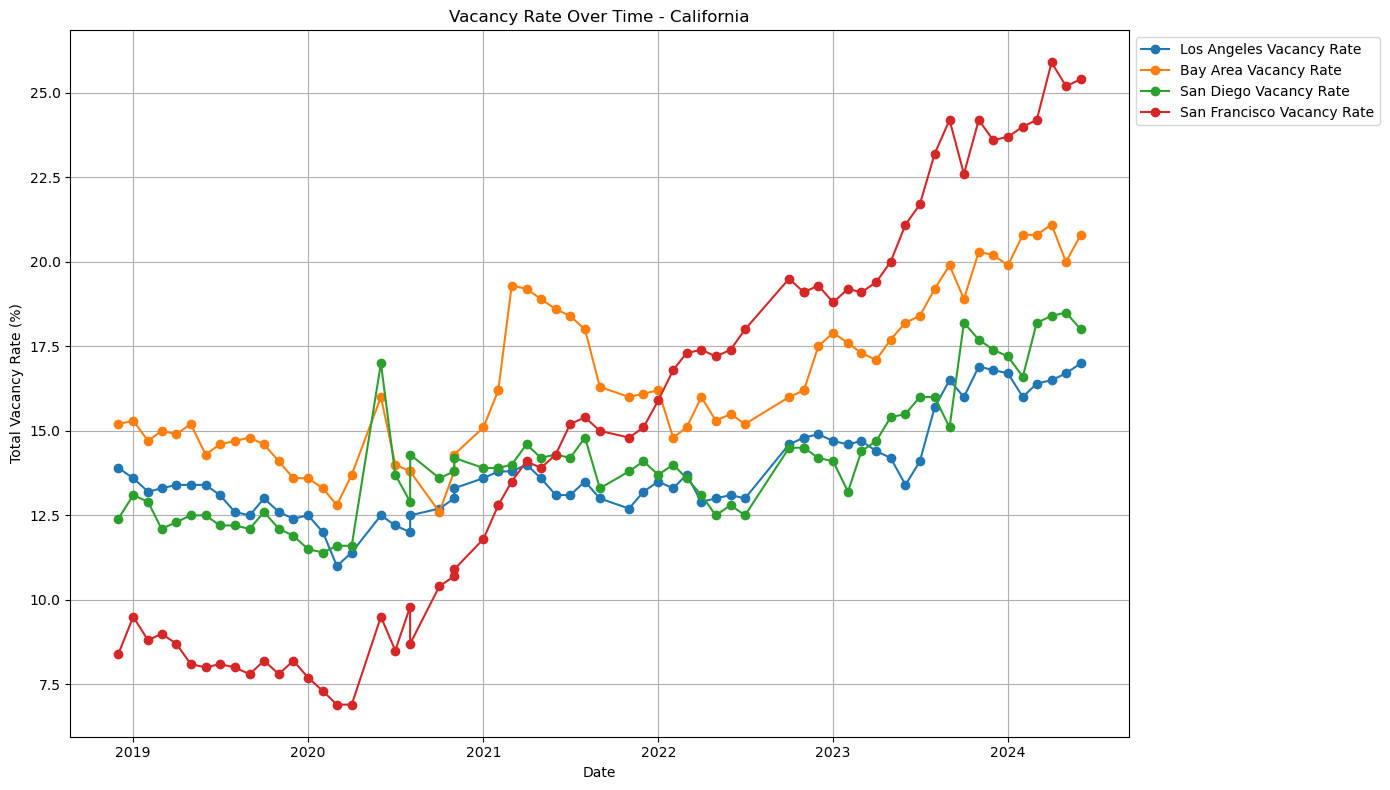

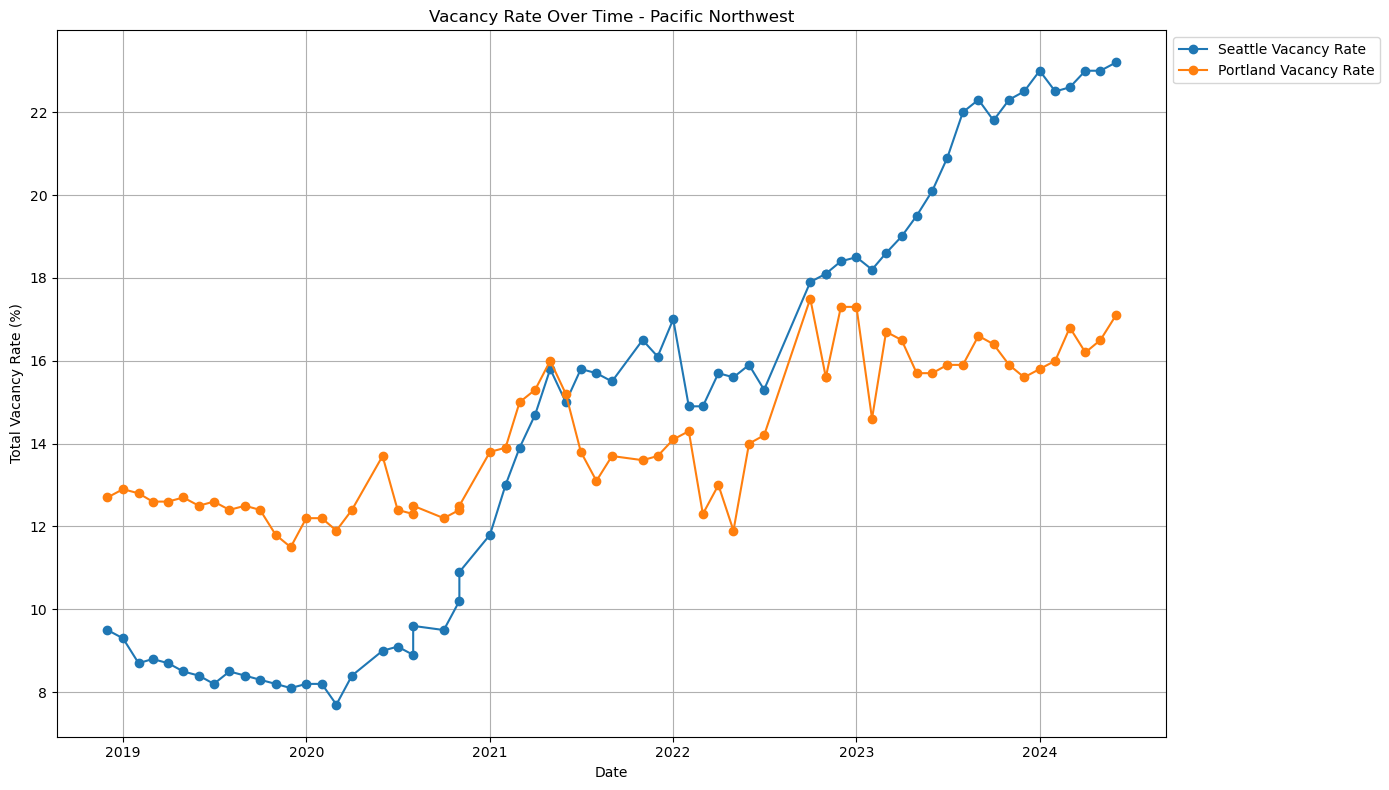

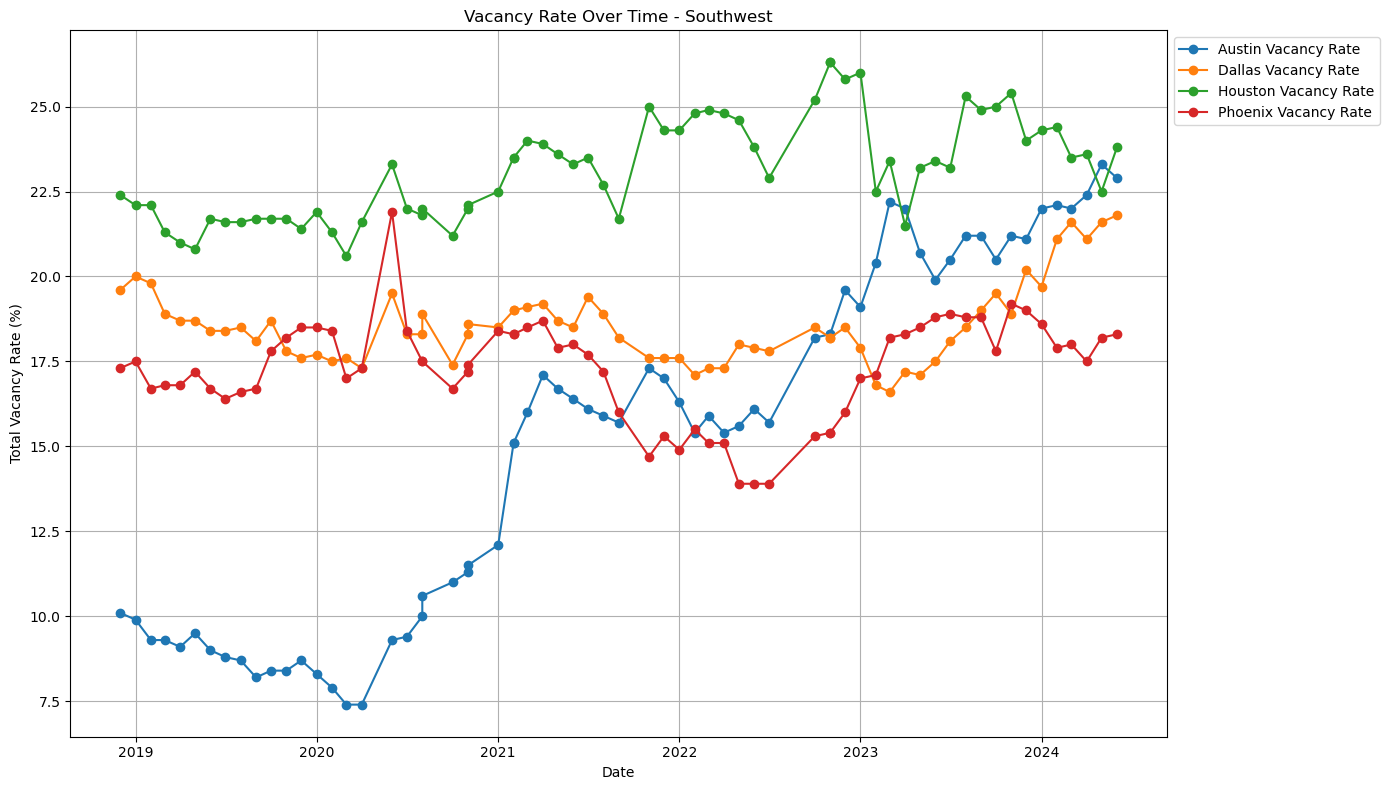

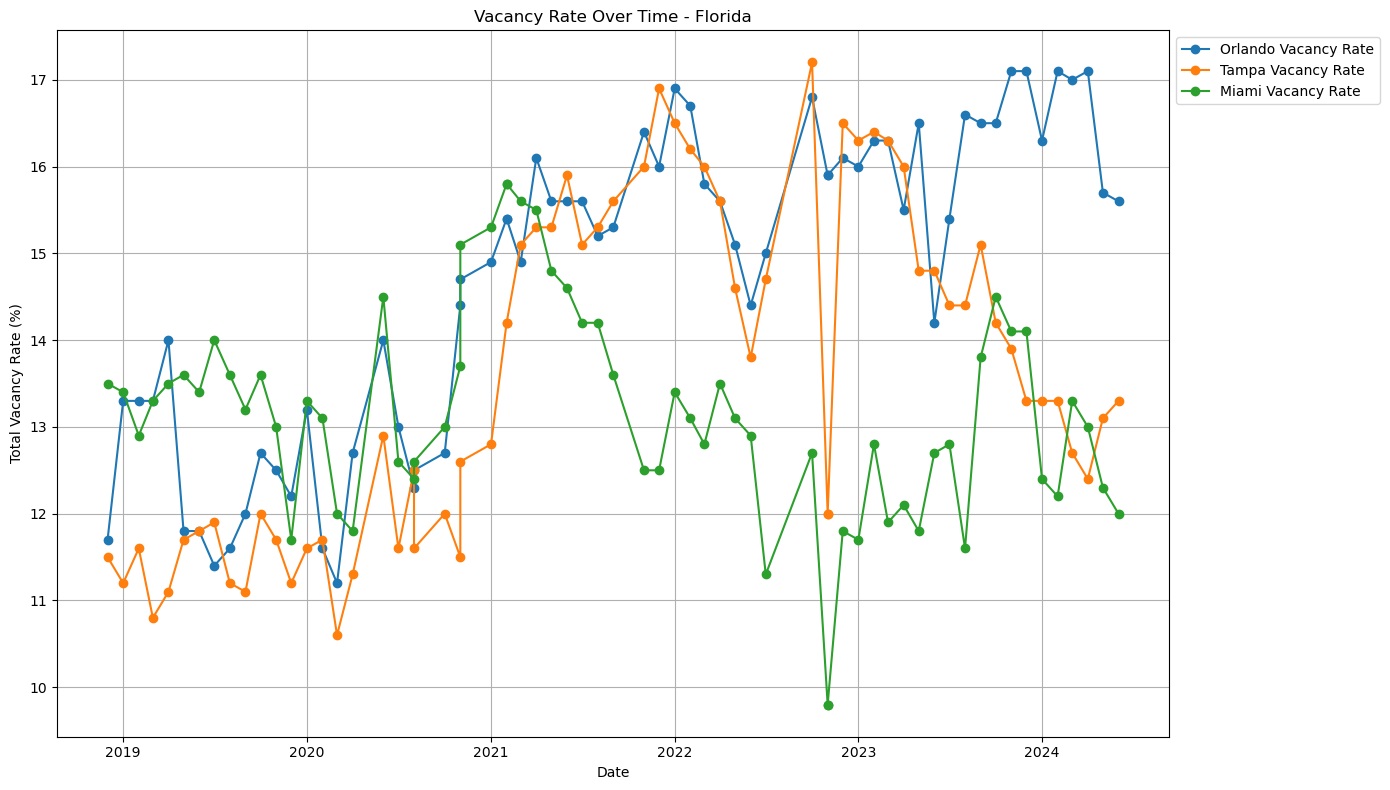

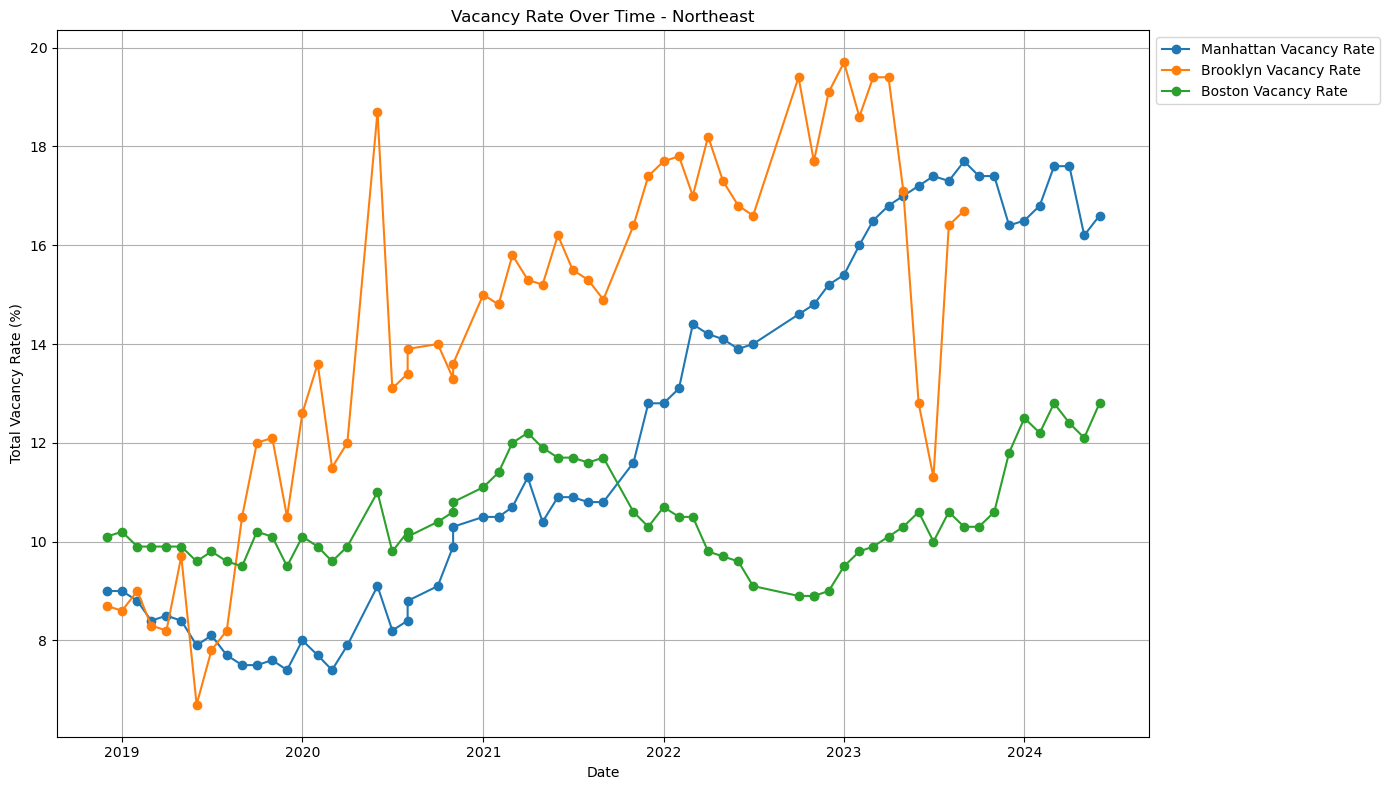

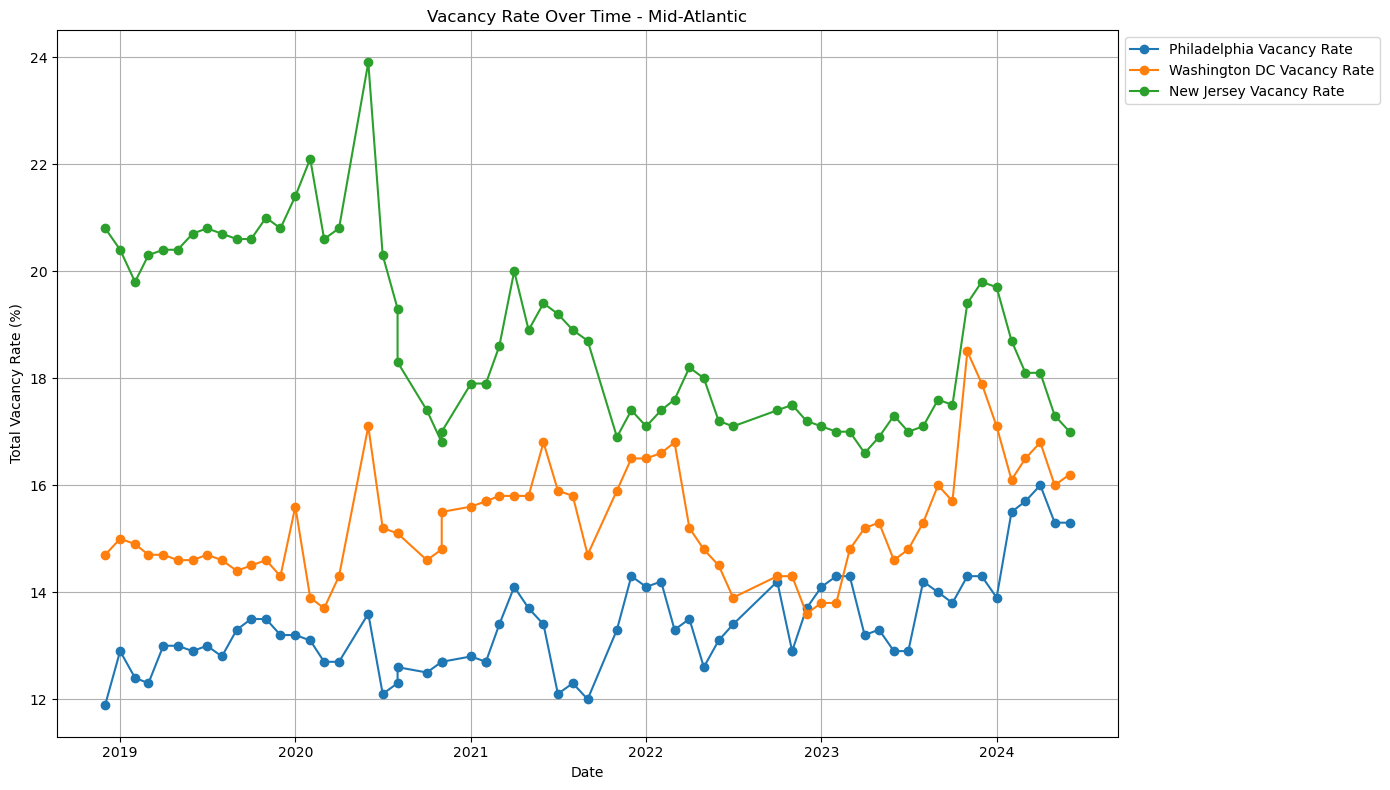

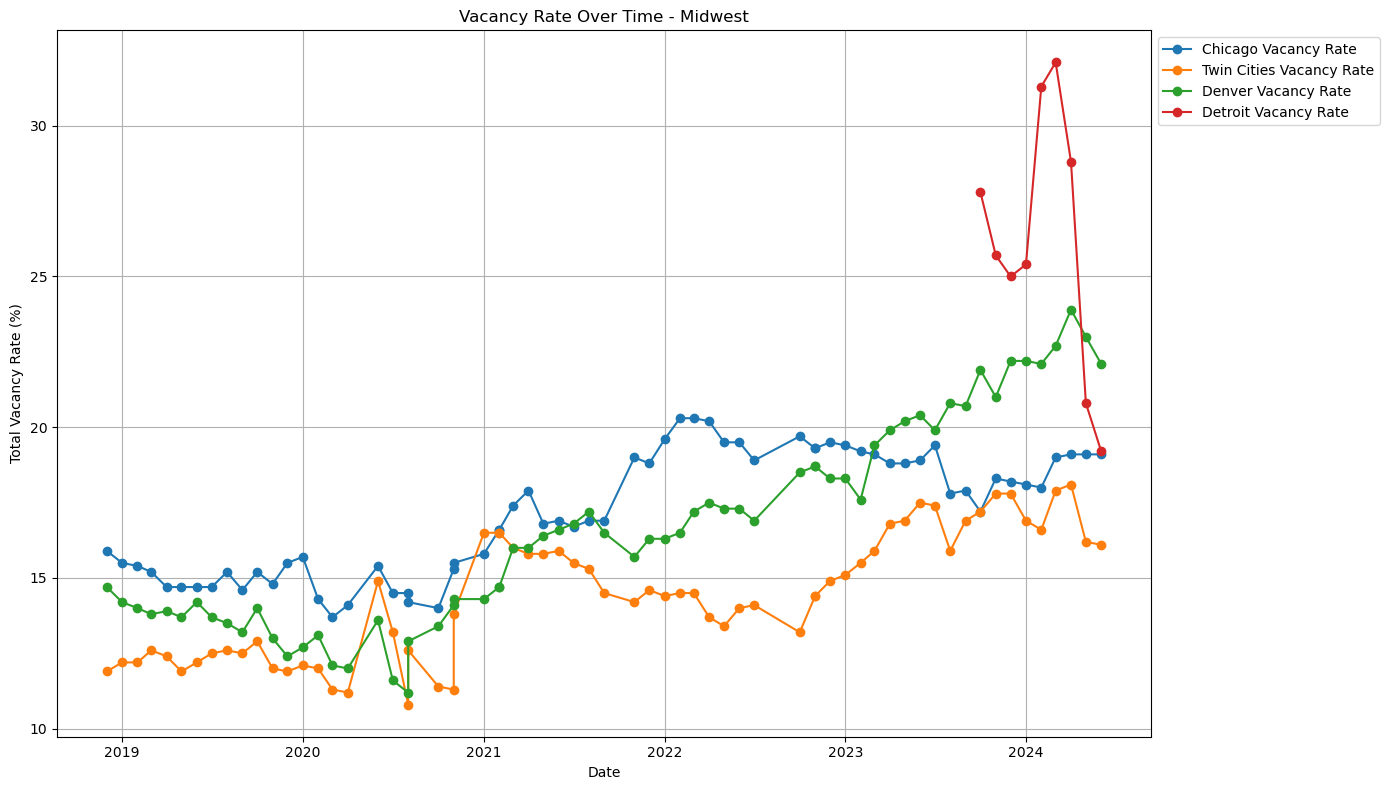

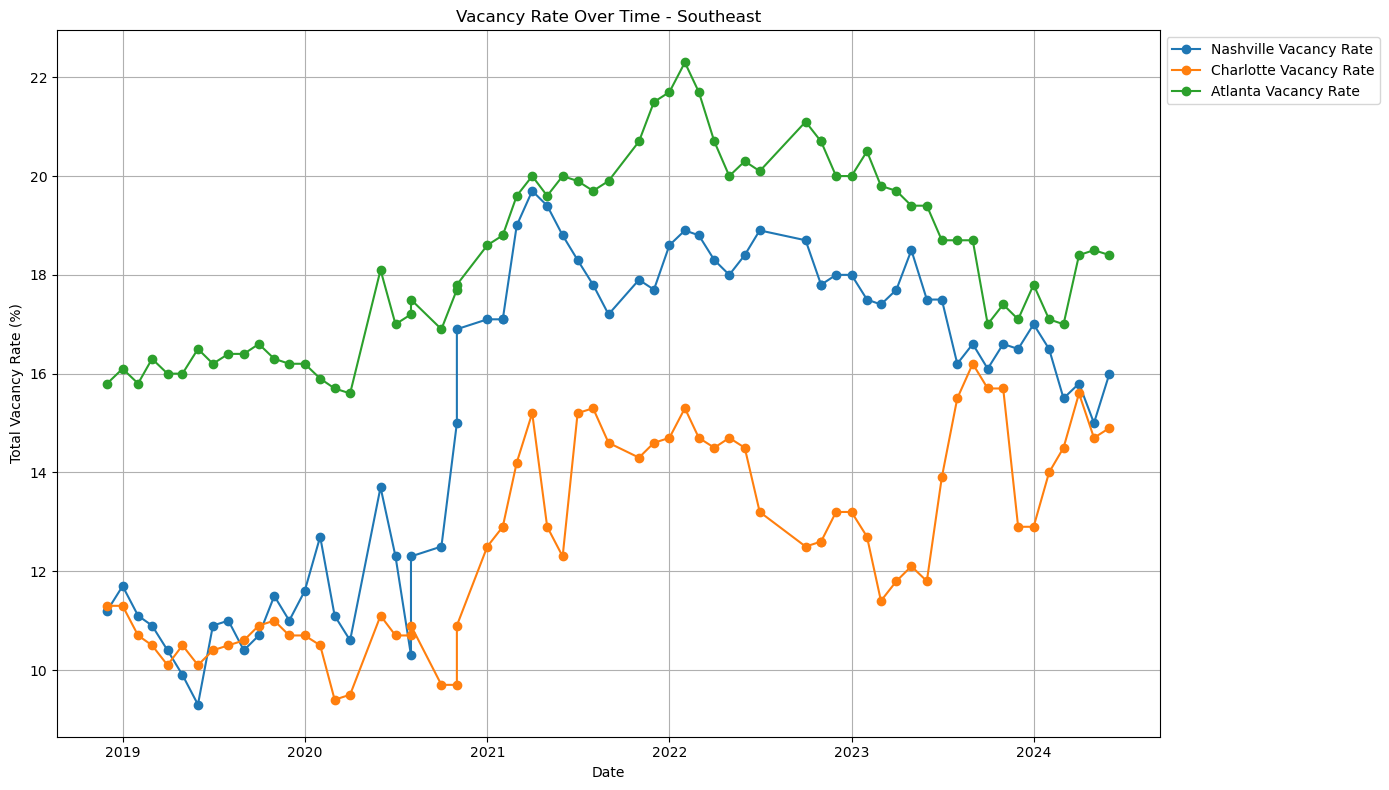

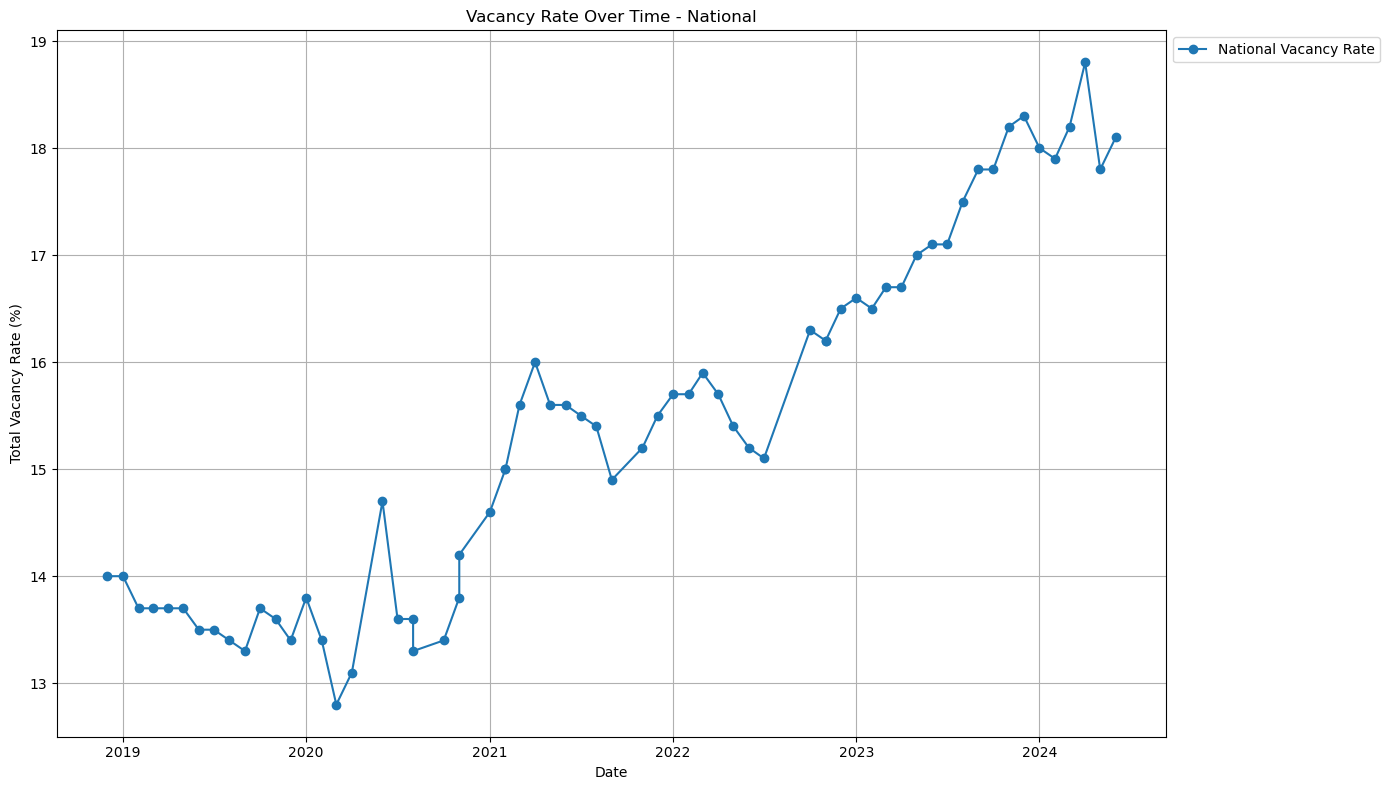

In [19]:


# Define the grouped cities
city_groups = {
    'California': ["Los Angeles", "Bay Area", "San Diego", "San Francisco"],
    'Pacific Northwest': ["Seattle", "Portland"],
    'Southwest': ["Austin", "Dallas", "Houston", "Phoenix"],
    'Florida': ["Orlando", "Tampa", "Miami"],
    'Northeast': ["Manhattan", "Brooklyn", "Boston"],
    'Mid-Atlantic': ["Philadelphia", "Washington DC", "New Jersey"],
    'Midwest': ["Chicago", "Twin Cities", "Denver", "Detroit"],
    'Southeast': [ "Nashville", "Charlotte", "Atlanta"],
    'National': ["National"]
}

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)  # Ensure data is sorted by Date

# Function to plot vacancy rates for a group of cities
def plot_vacancy_rates(group_name, cities):
    plt.figure(figsize=(14, 8))
    for city in cities:
        city_data = df[df['Market'] == city]
        plt.plot(city_data['Date'], city_data['Total Vacancy Rate'], '-o', label=f'{city} Vacancy Rate')
    plt.title(f'Vacancy Rate Over Time - {group_name}')
    plt.xlabel('Date')
    plt.ylabel('Total Vacancy Rate (%)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.gca().xaxis.set_major_locator(YearLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each group
for group_name, cities in city_groups.items():
    plot_vacancy_rates(group_name, cities)


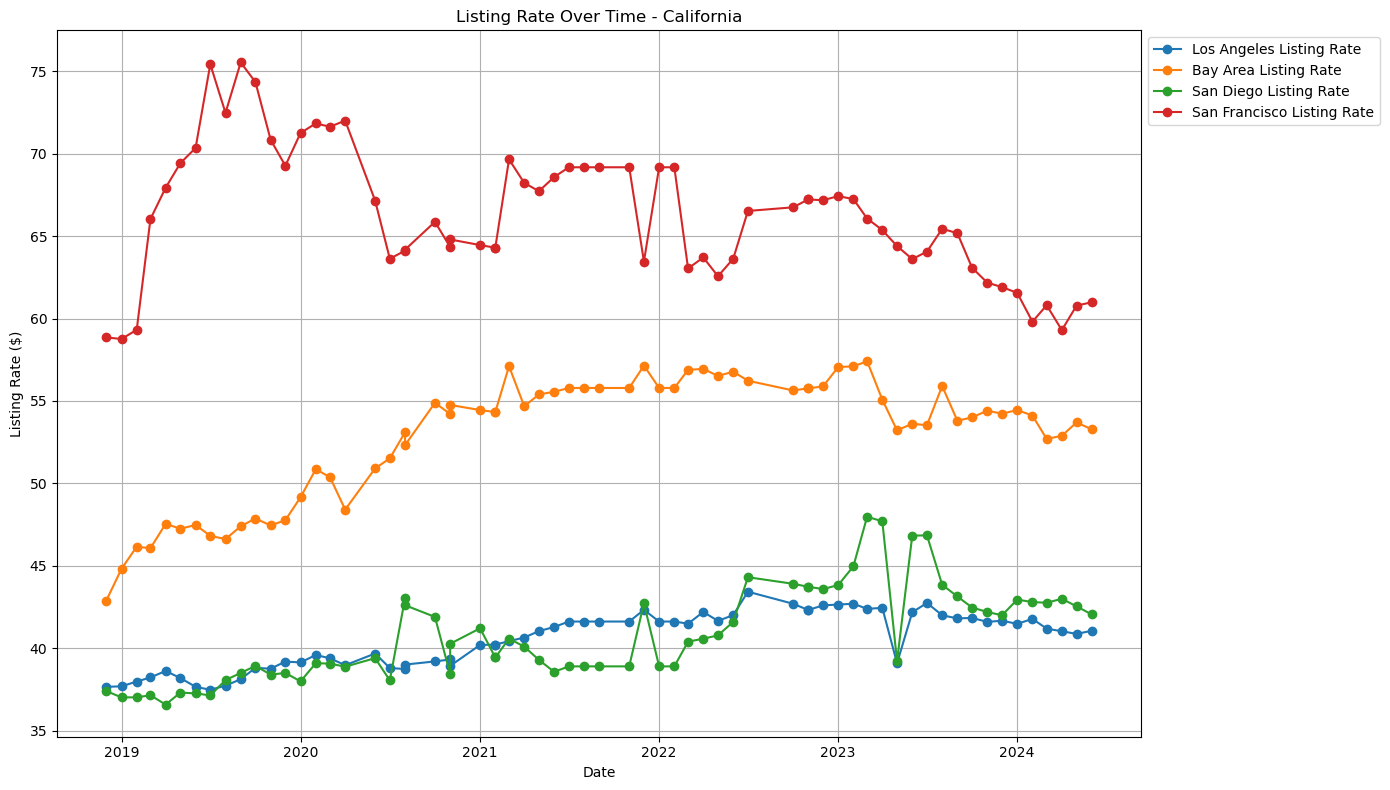

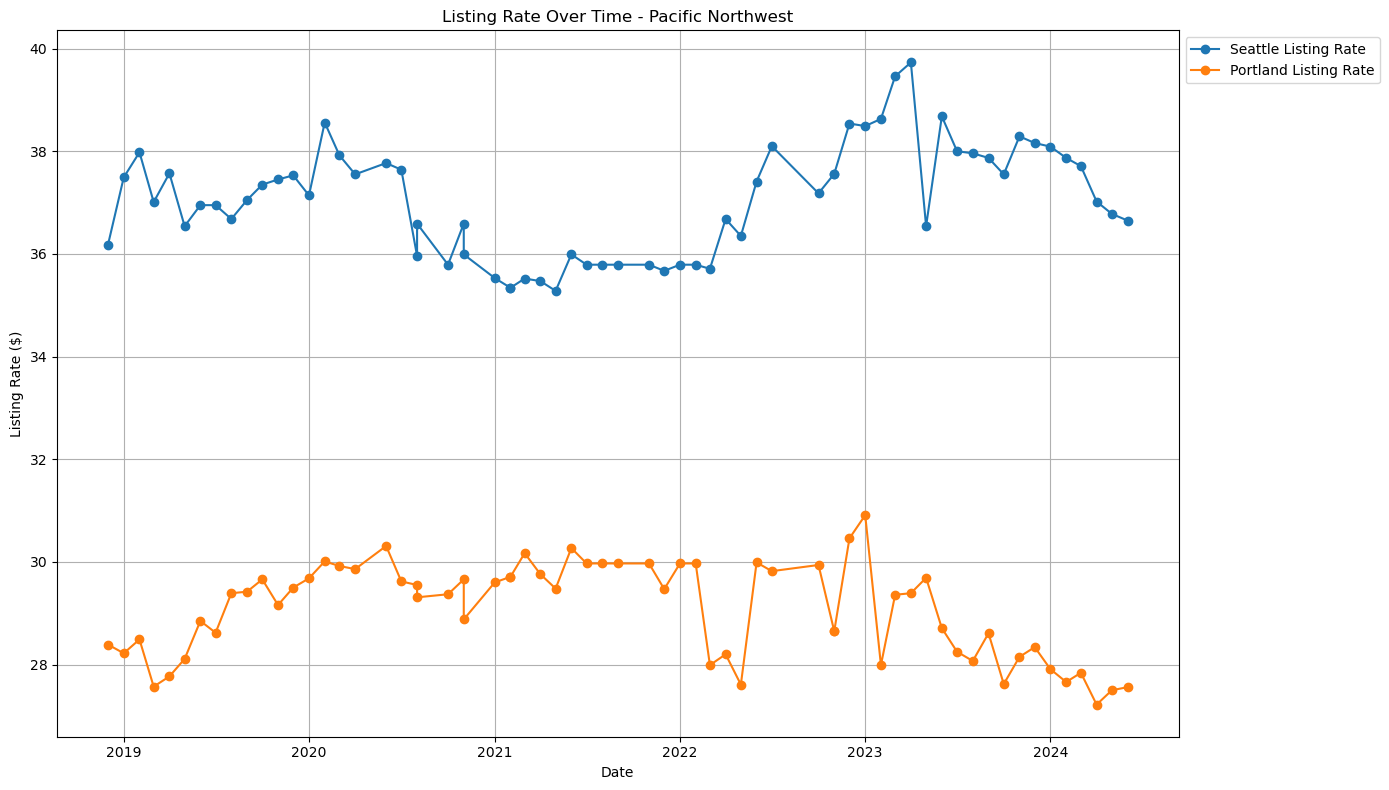

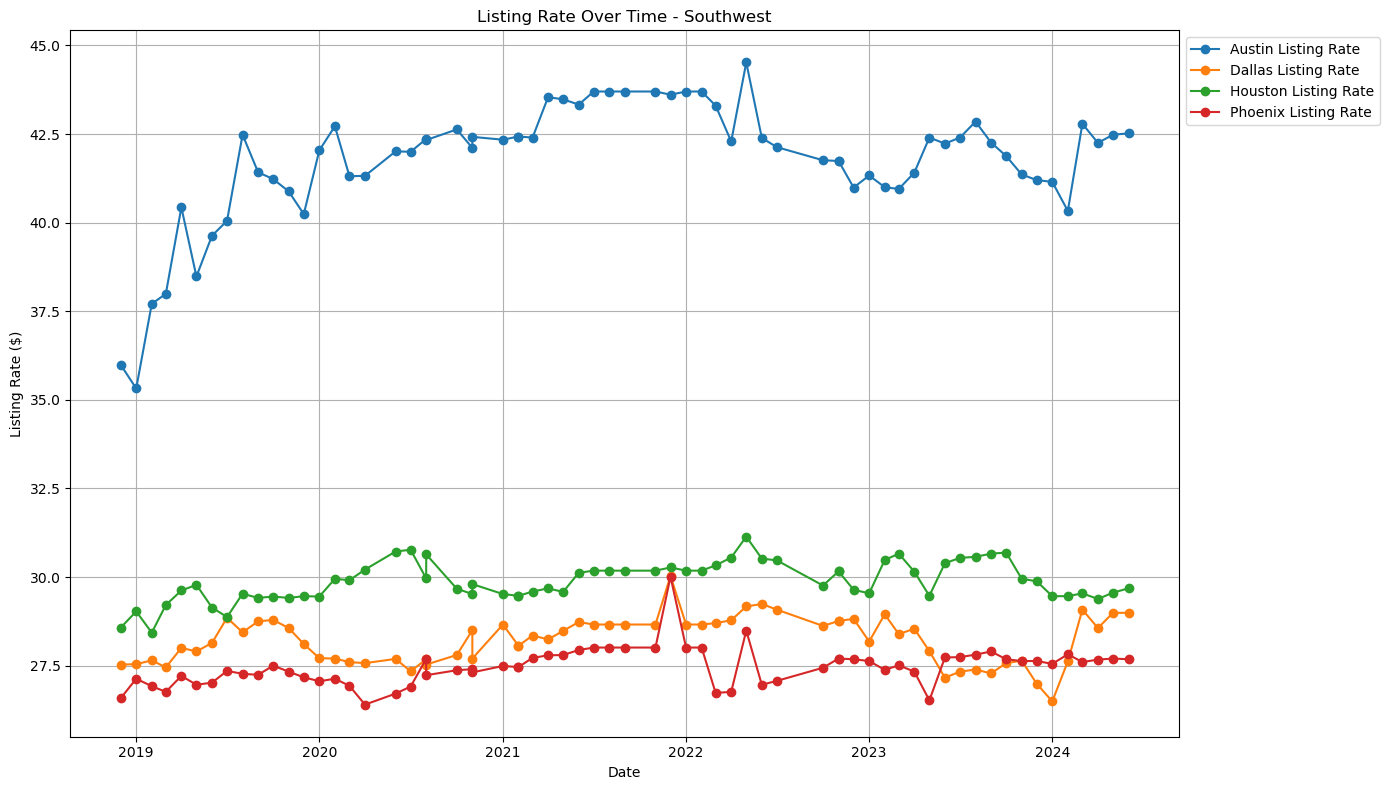

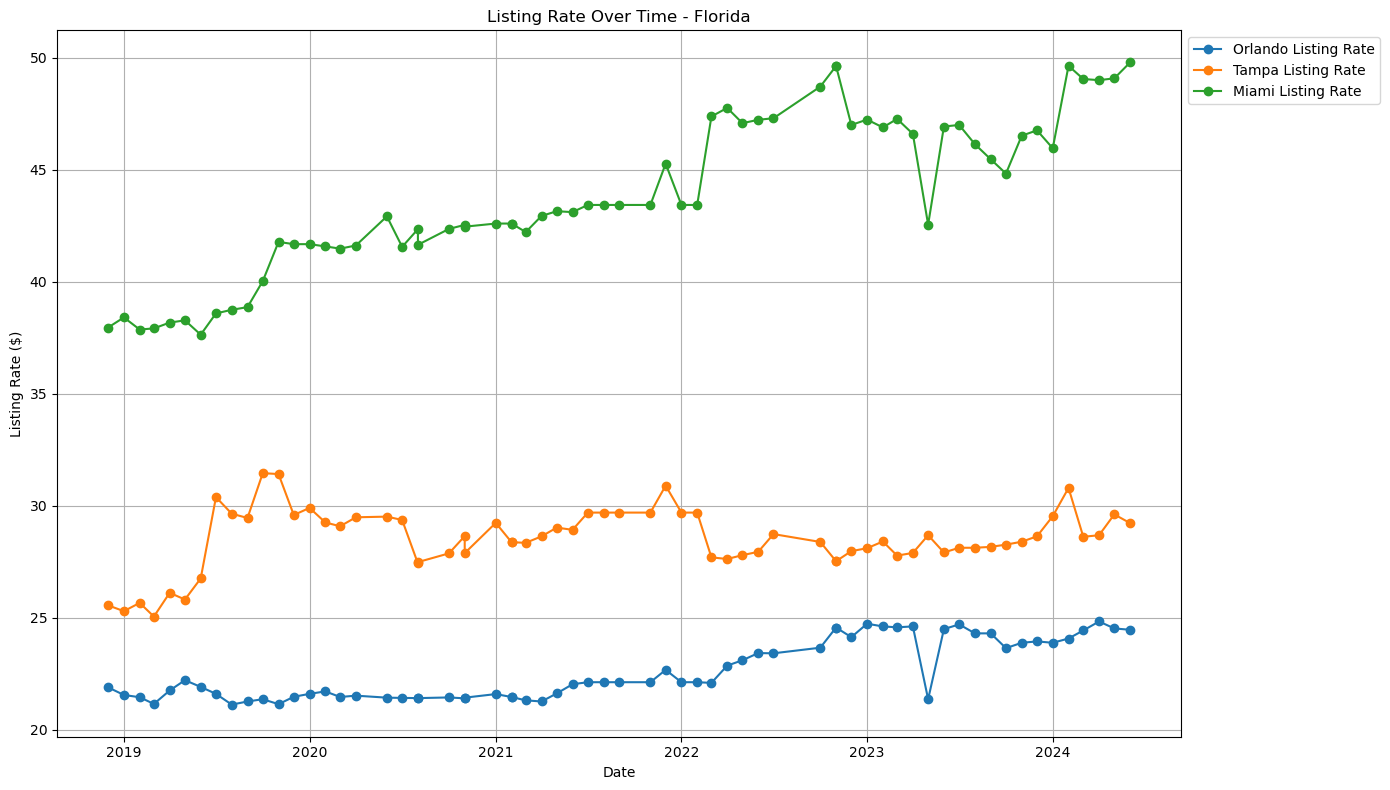

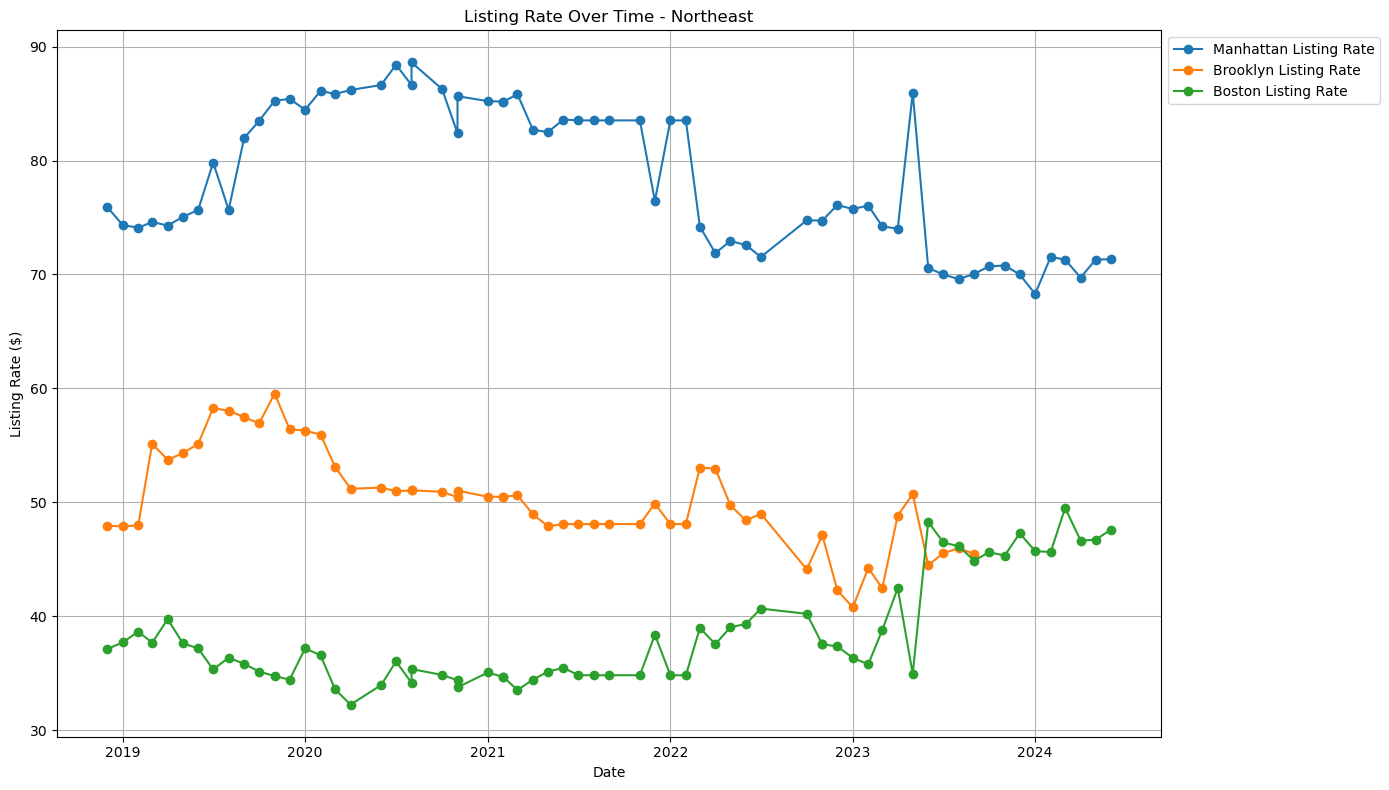

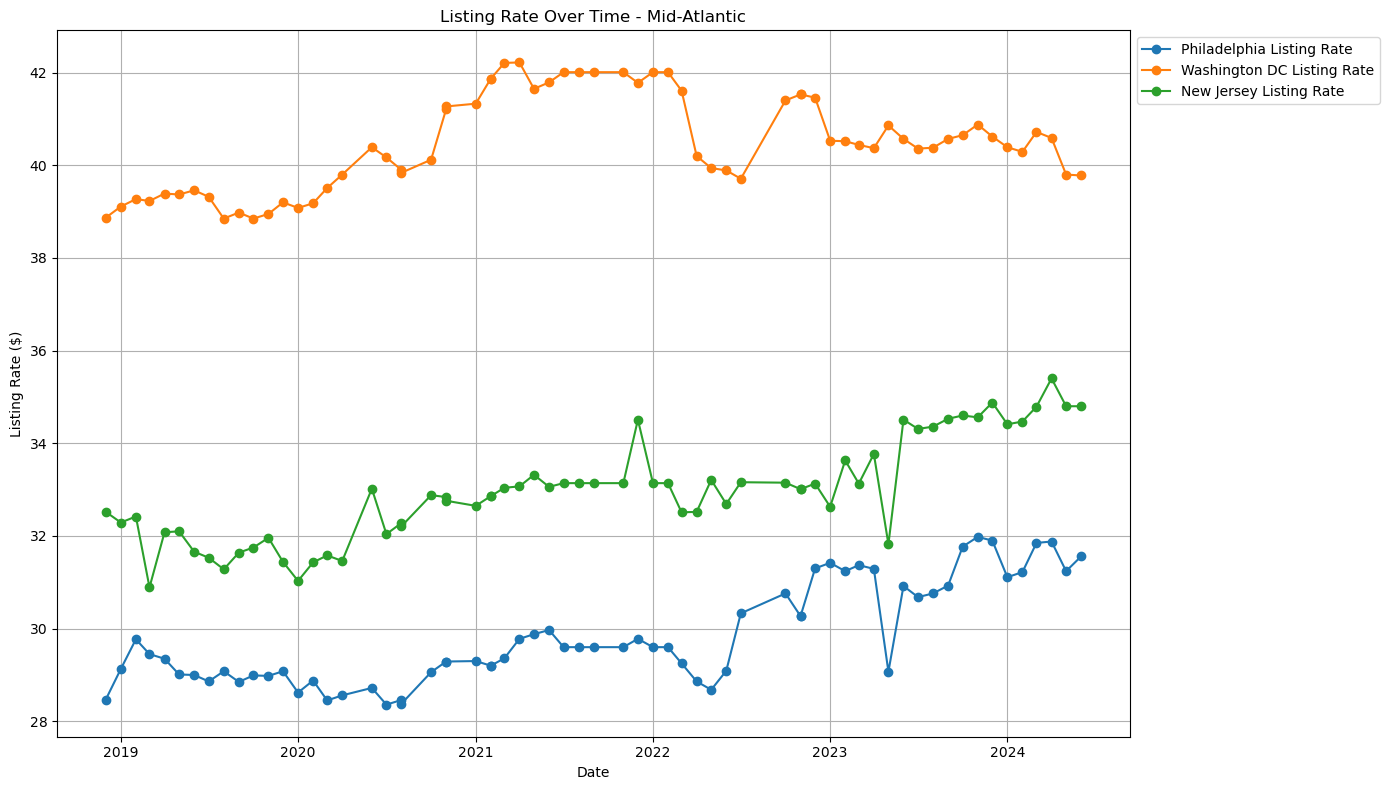

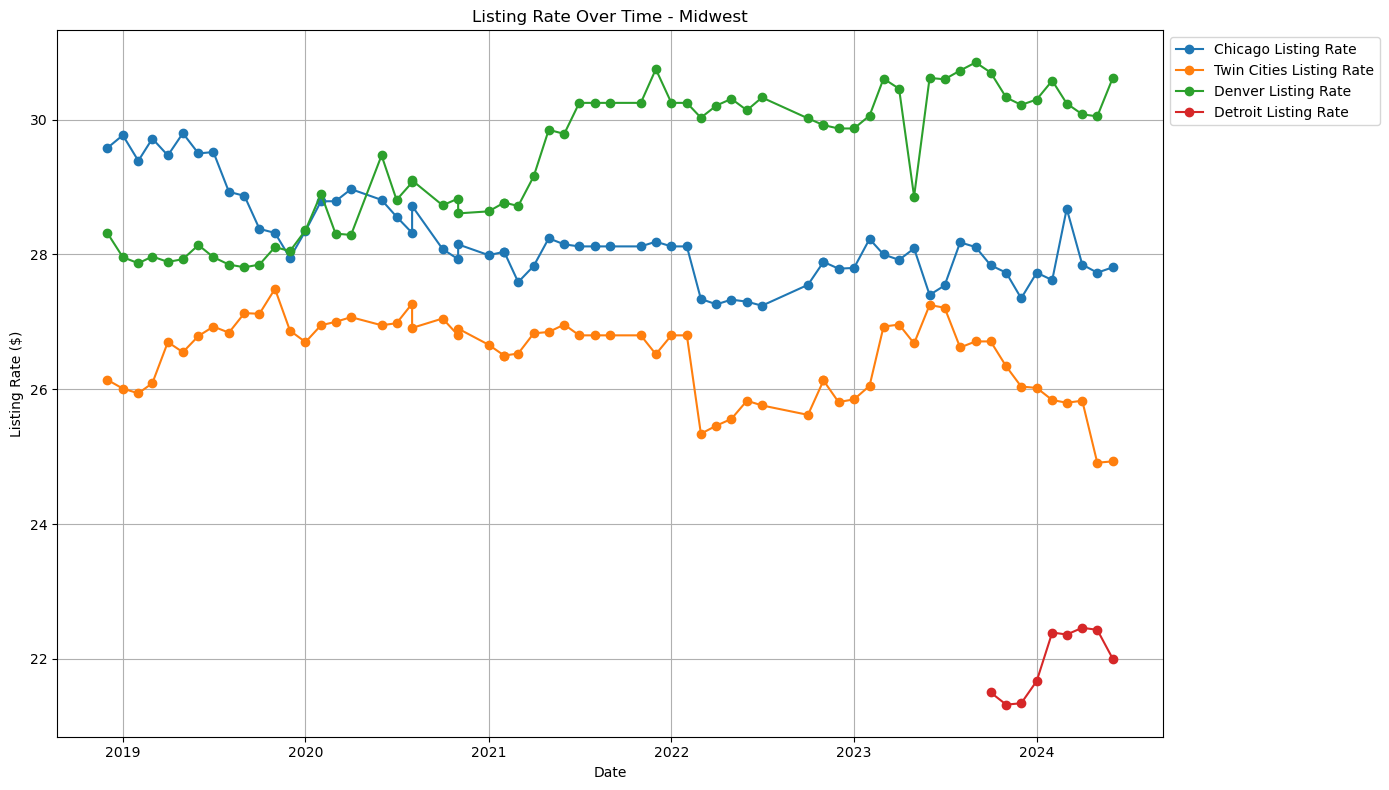

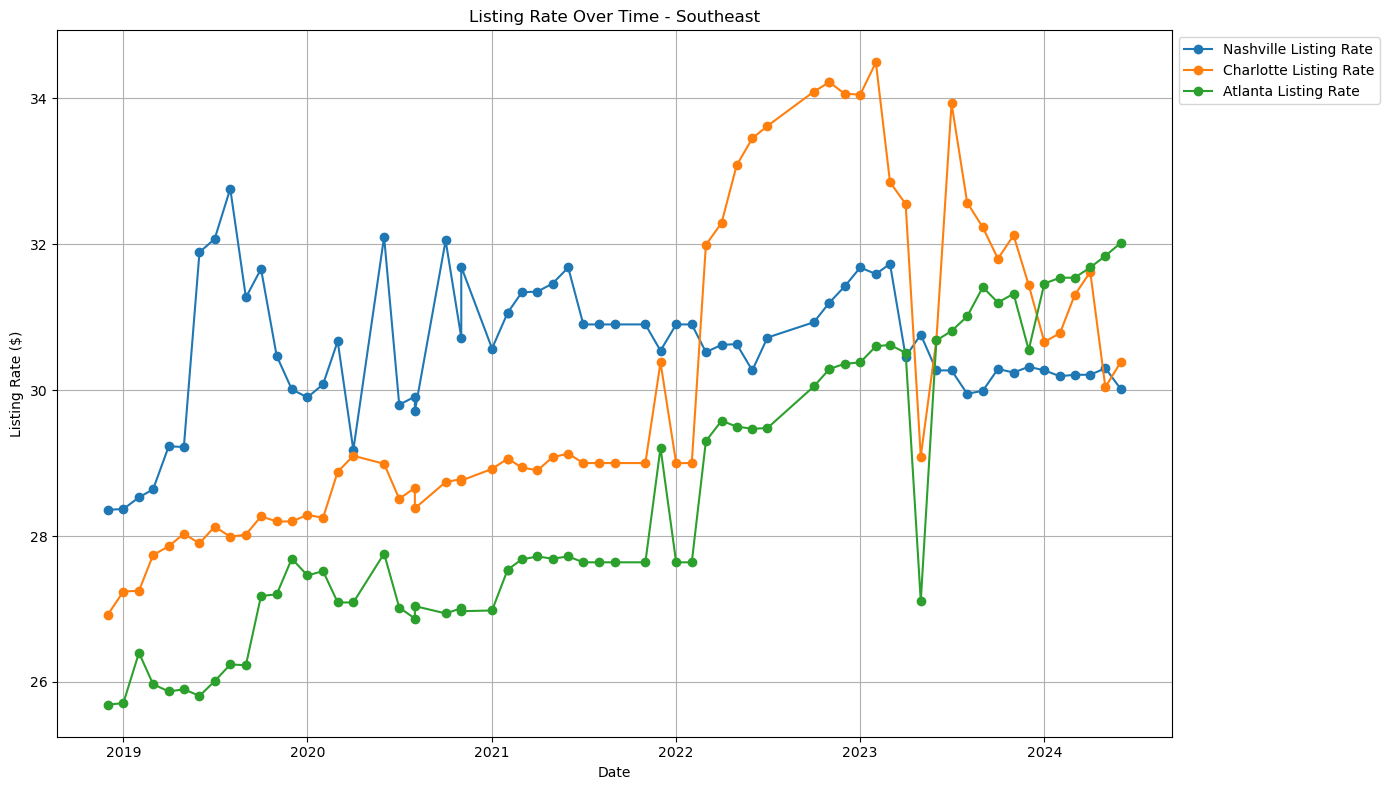

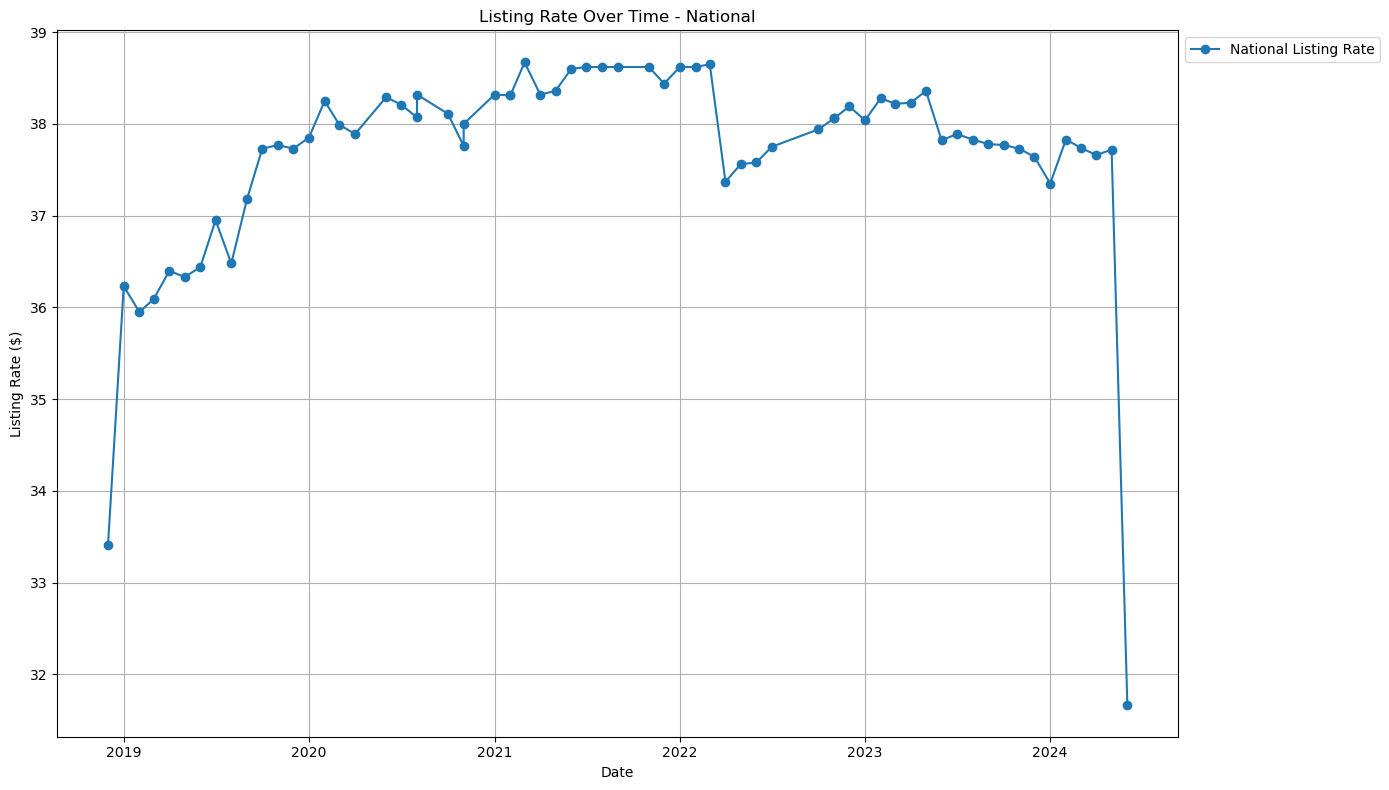

In [21]:
# Define the grouped cities
city_groups = {
    'California': ["Los Angeles", "Bay Area", "San Diego", "San Francisco"],
    'Pacific Northwest': ["Seattle", "Portland"],
    'Southwest': ["Austin", "Dallas", "Houston", "Phoenix"],
    'Florida': ["Orlando", "Tampa", "Miami"],
    'Northeast': ["Manhattan", "Brooklyn", "Boston"],
    'Mid-Atlantic': ["Philadelphia", "Washington DC", "New Jersey"],
    'Midwest': ["Chicago", "Twin Cities", "Denver", "Detroit"],
    'Southeast': [ "Nashville", "Charlotte", "Atlanta"],
    'National': ["National"]
}

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)  # Ensure data is sorted by Date

# Function to plot listing rates for a group of cities
def plot_listing_rates(group_name, cities):
    plt.figure(figsize=(14, 8))
    for city in cities:
        city_data = df[df['Market'] == city]
        plt.plot(city_data['Date'], city_data['Listing Rate'], '-o', label=f'{city} Listing Rate')
    plt.title(f'Listing Rate Over Time - {group_name}')
    plt.xlabel('Date')
    plt.ylabel('Listing Rate ($)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.gca().xaxis.set_major_locator(YearLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each group
for group_name, cities in city_groups.items():
    plot_listing_rates(group_name, cities)


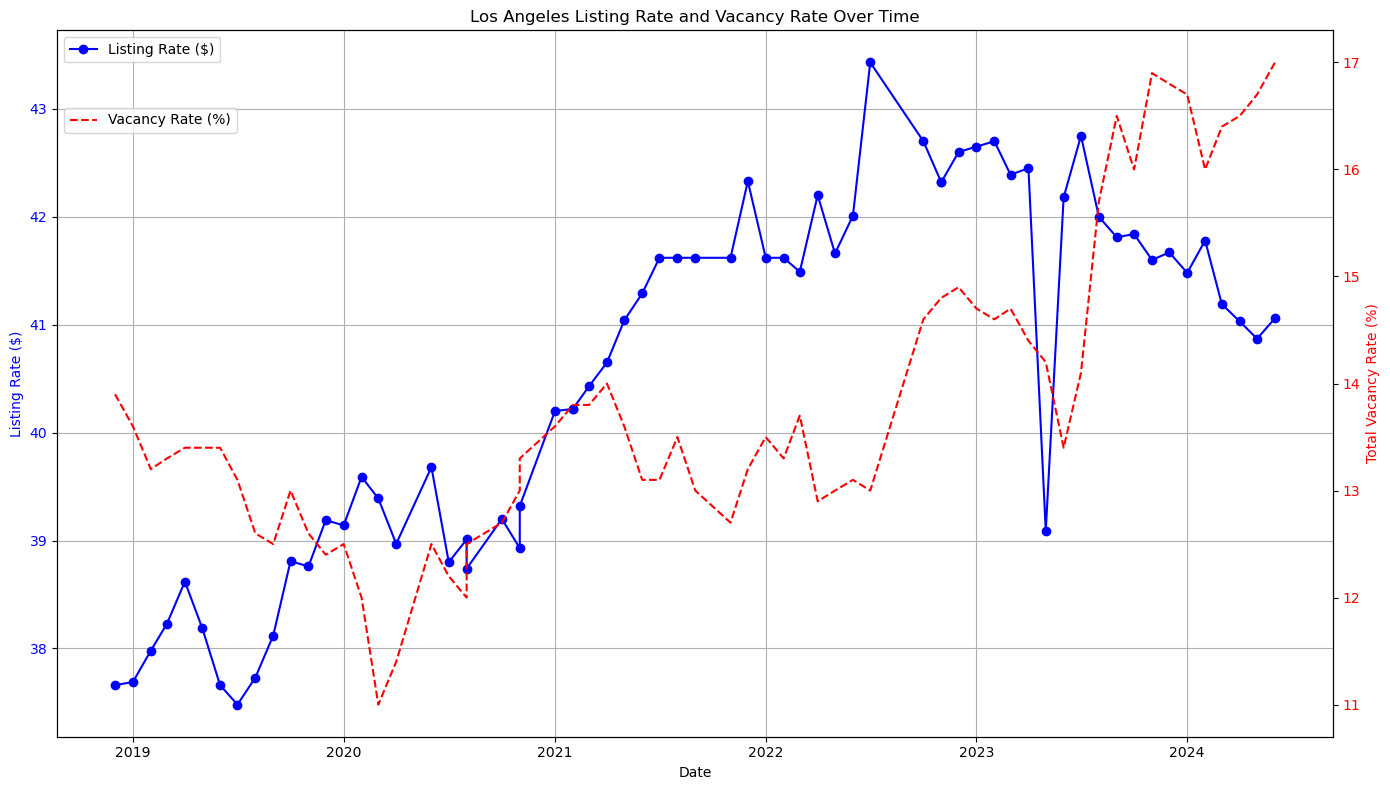

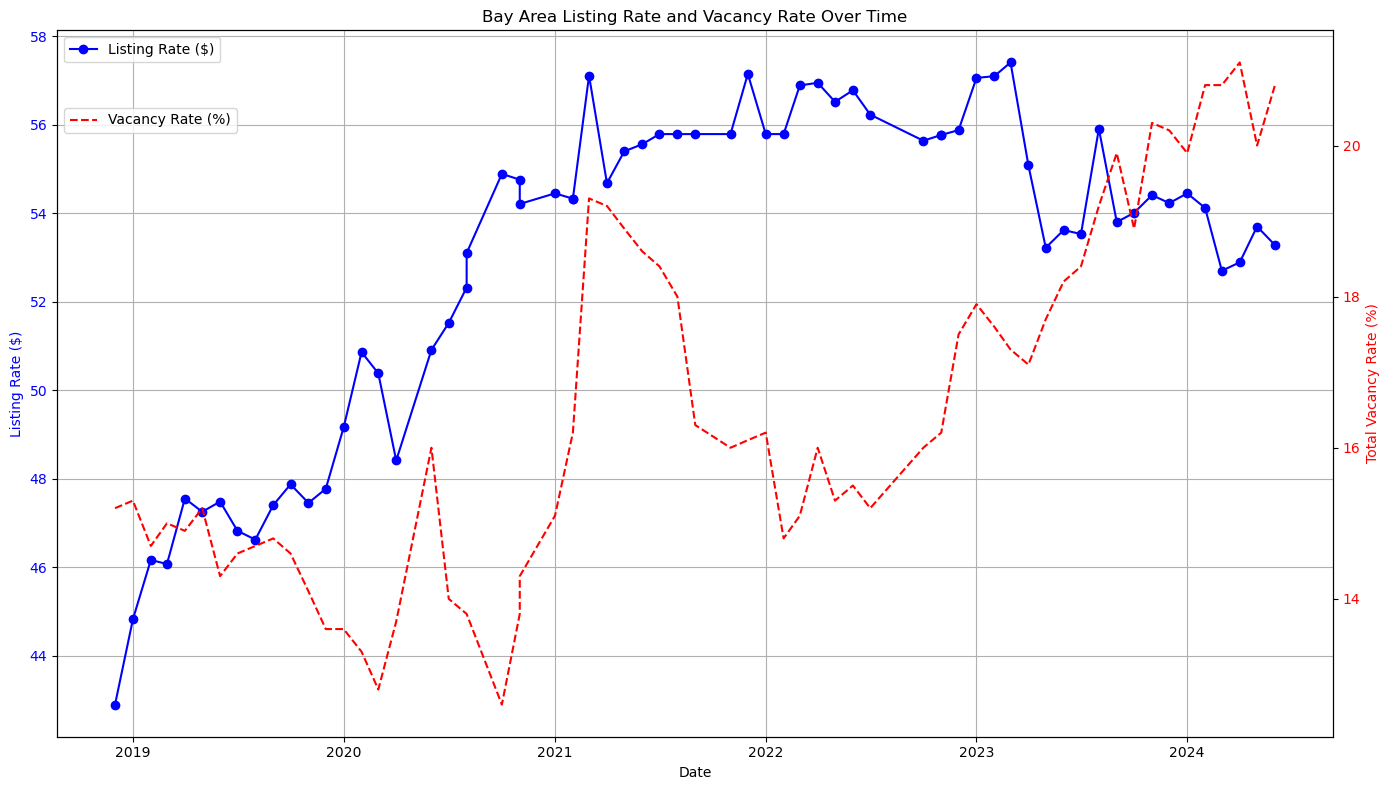

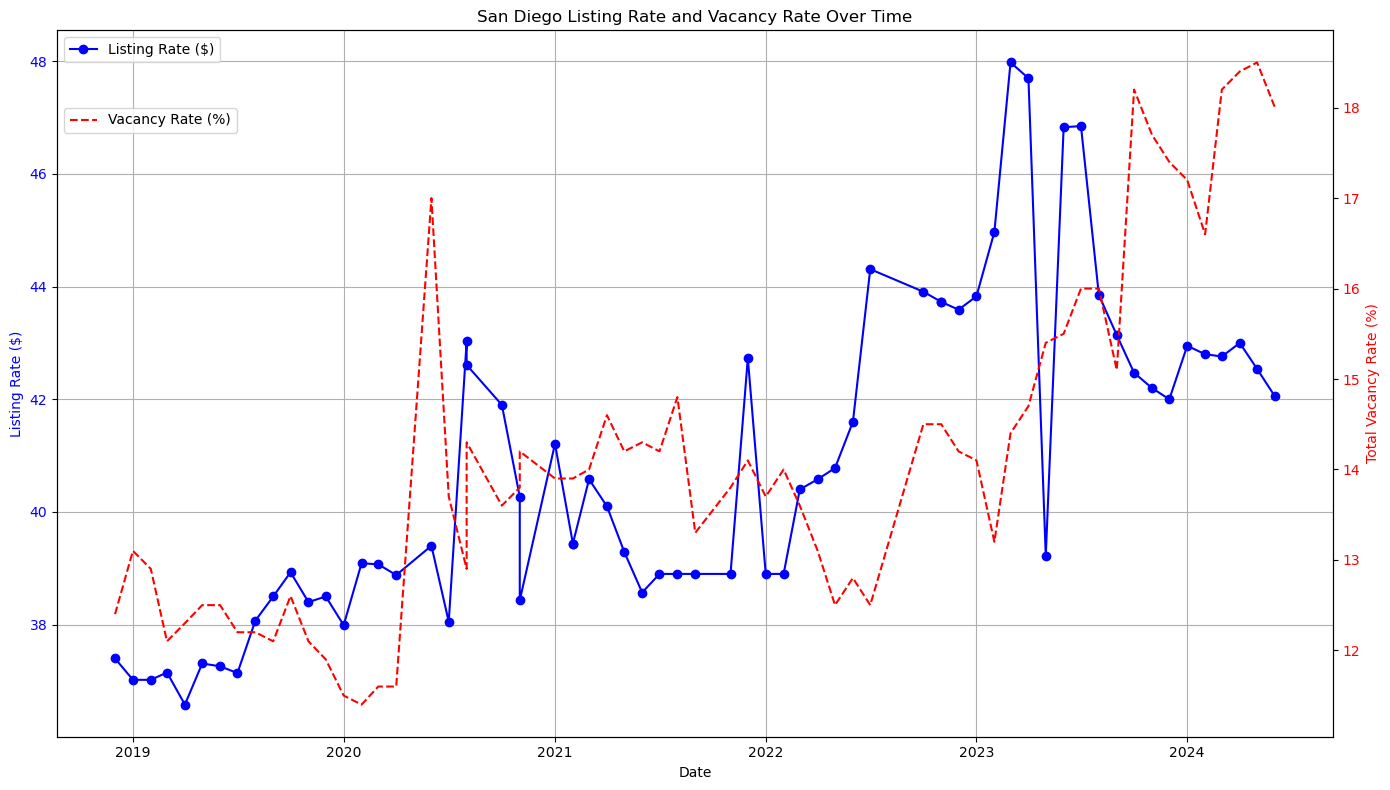

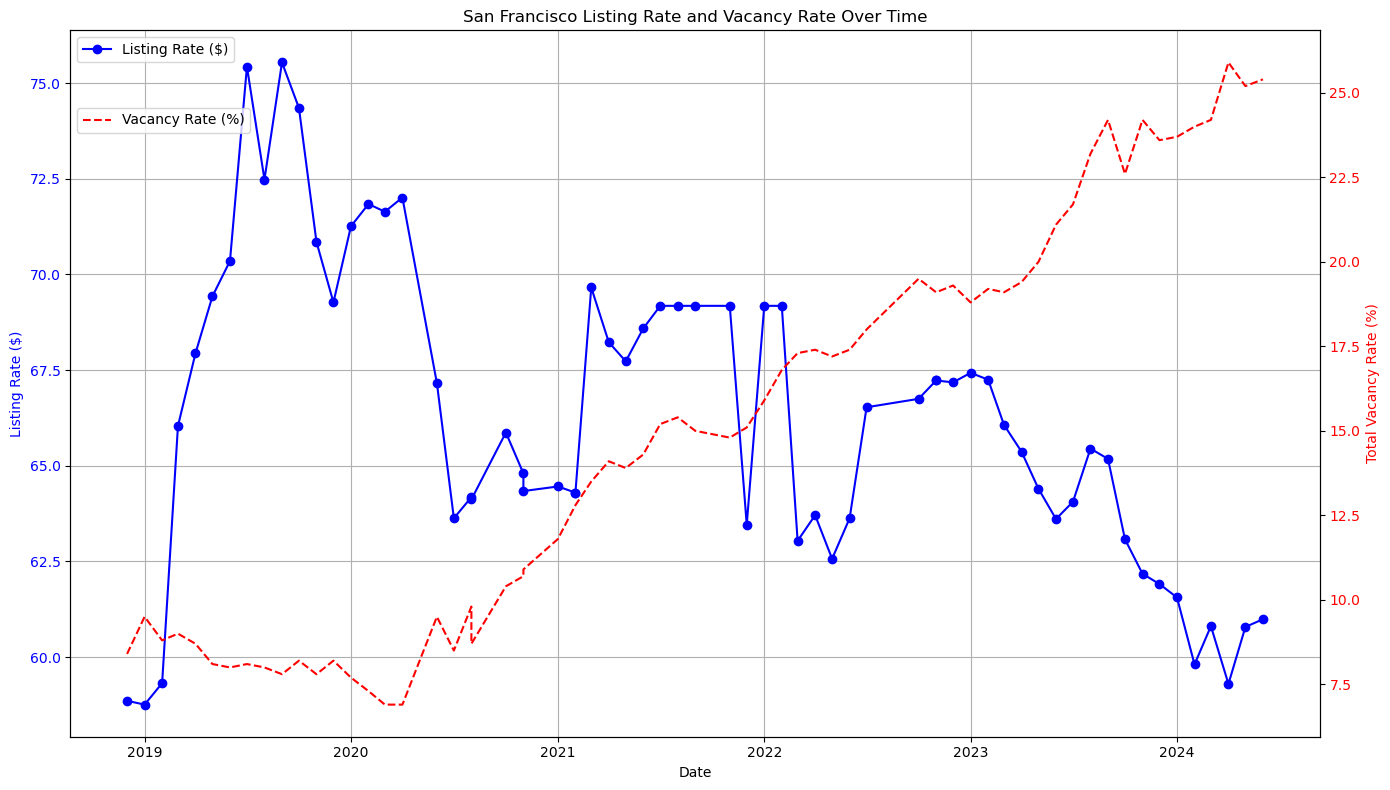

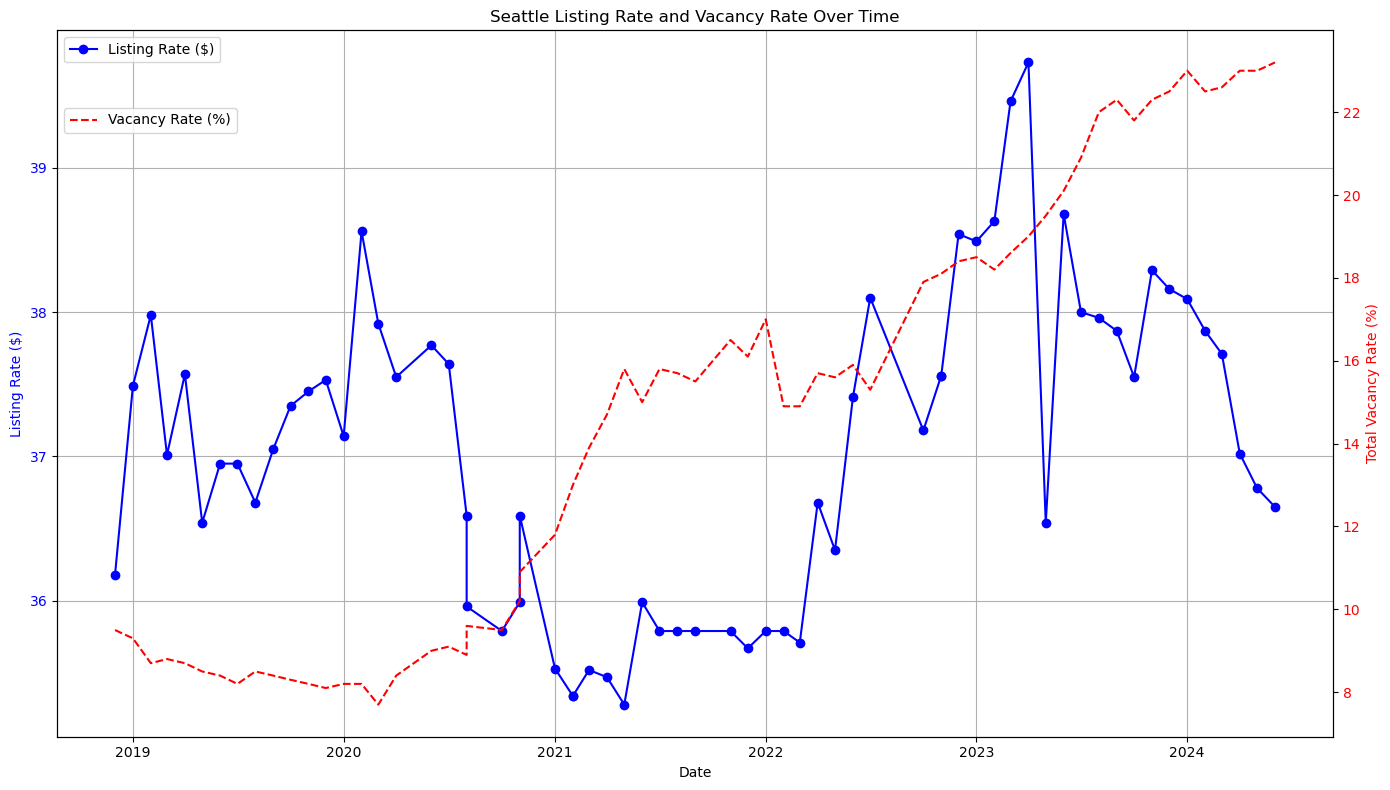

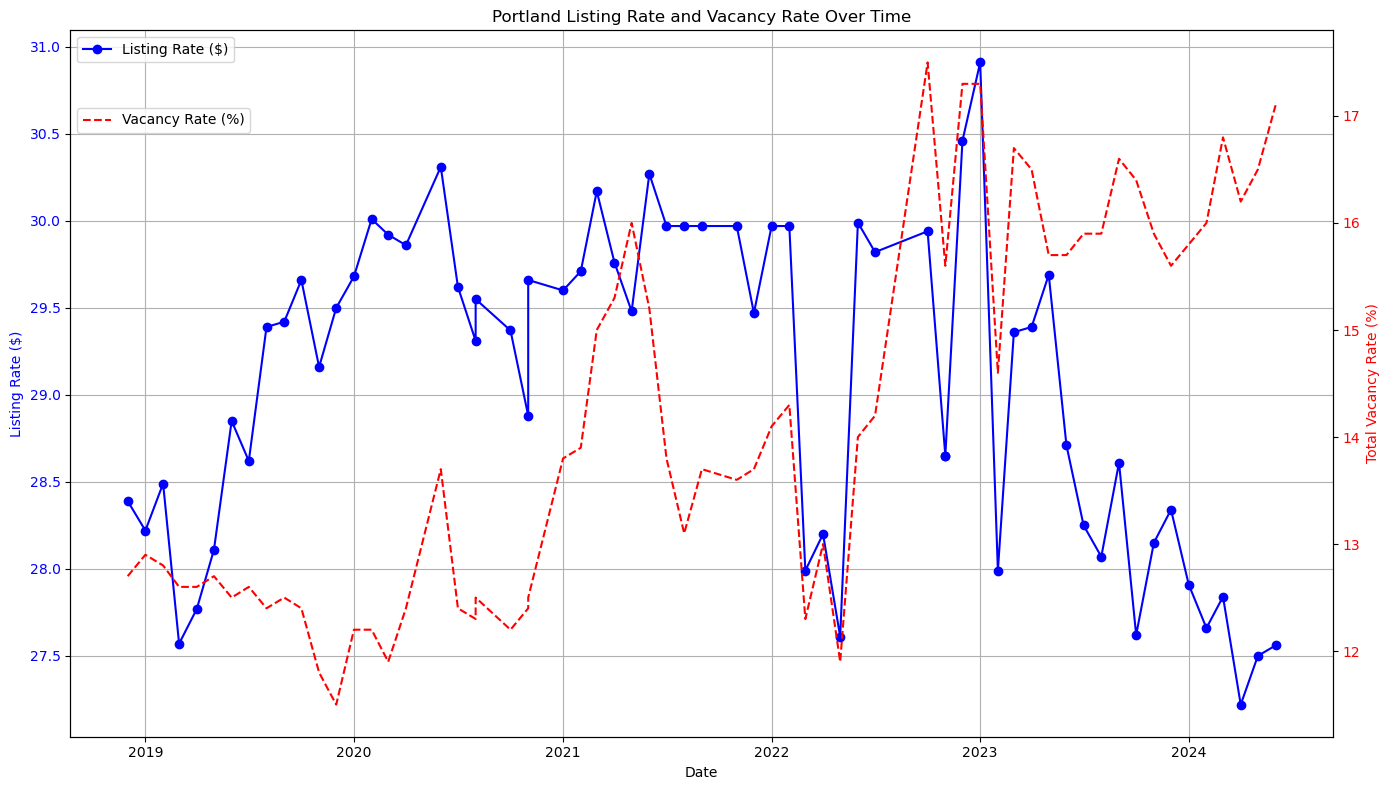

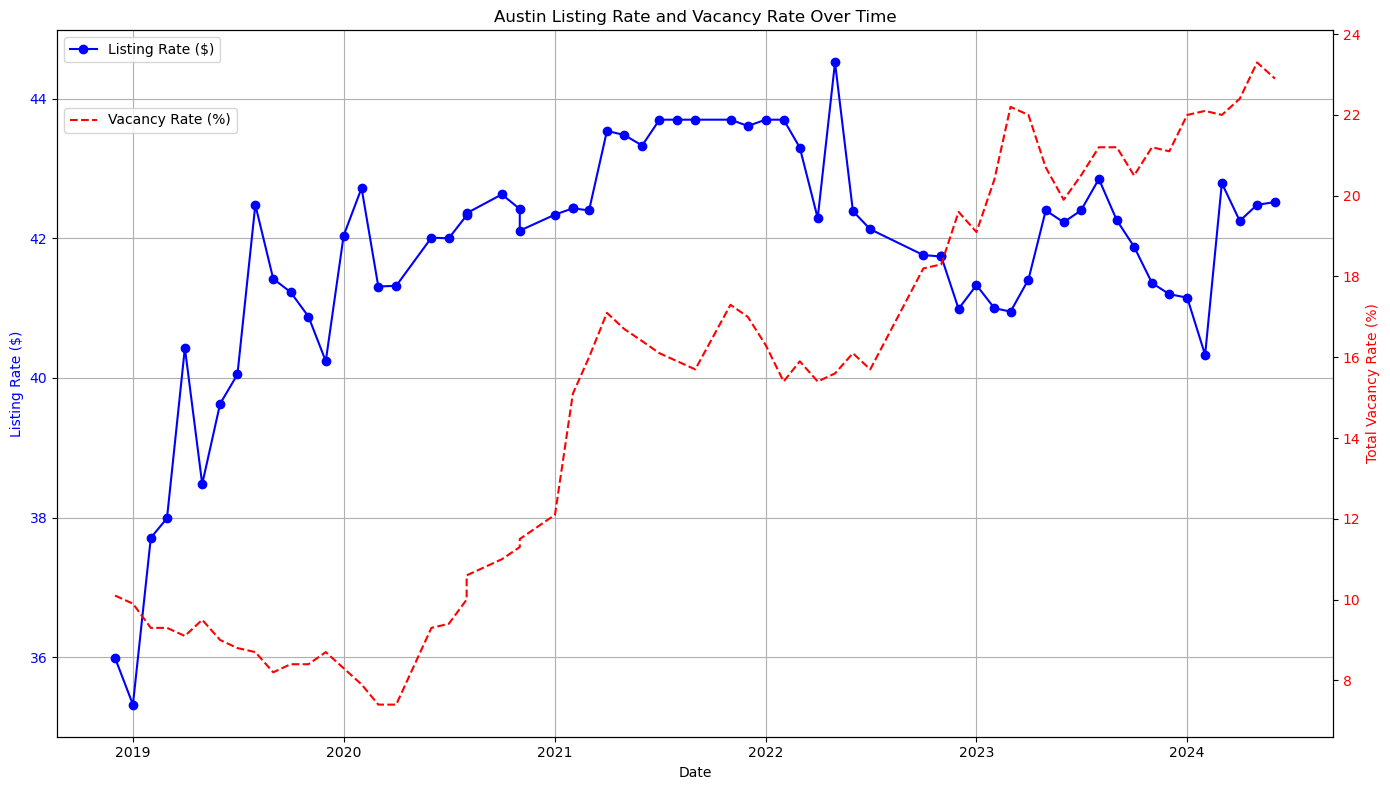

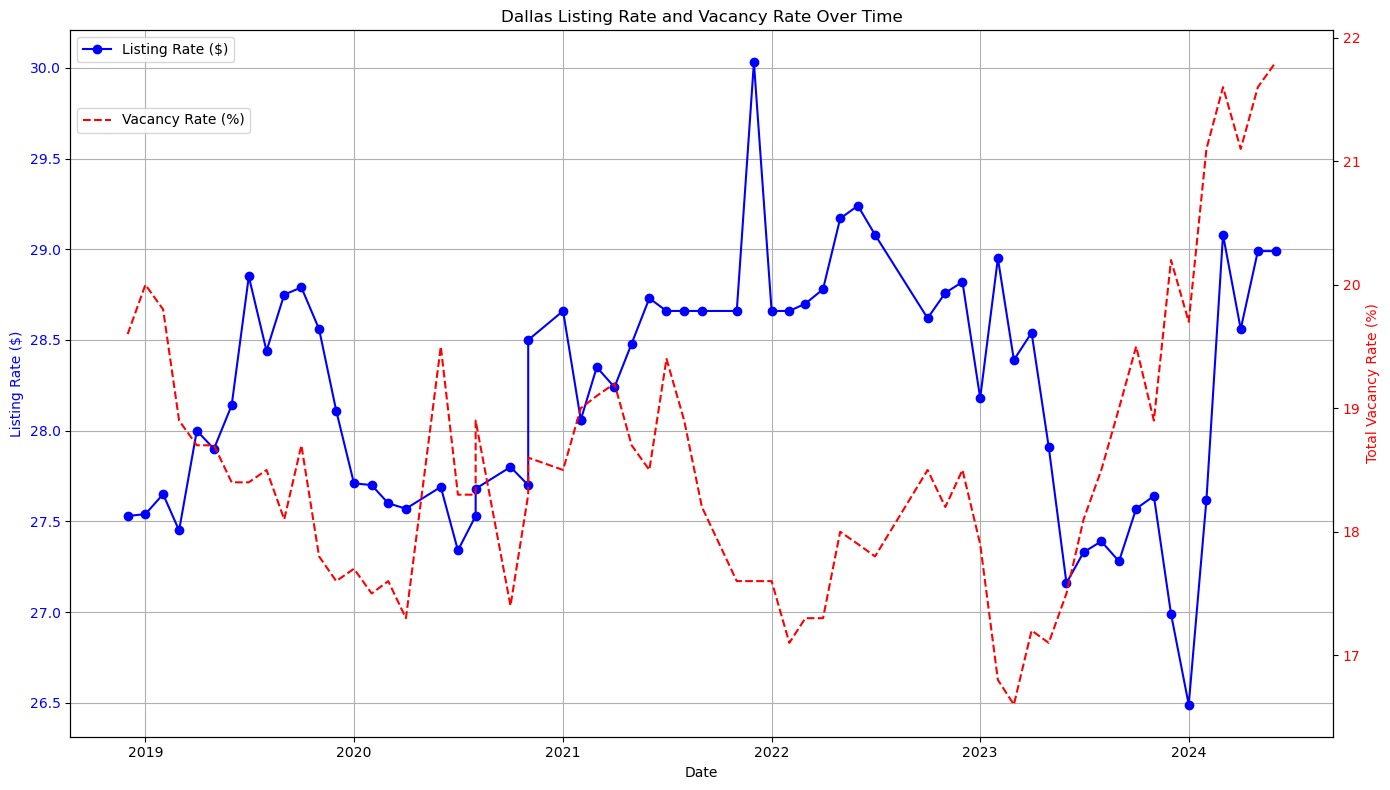

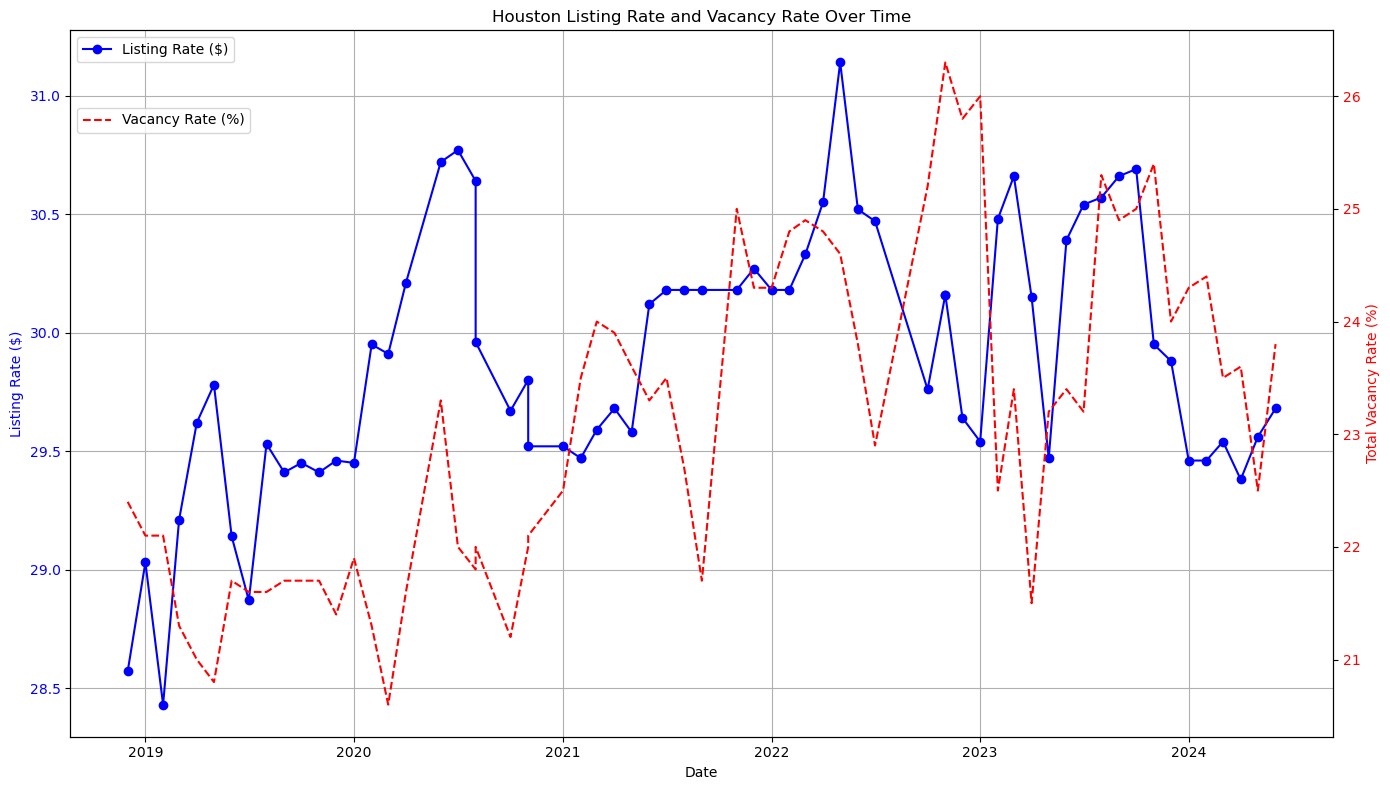

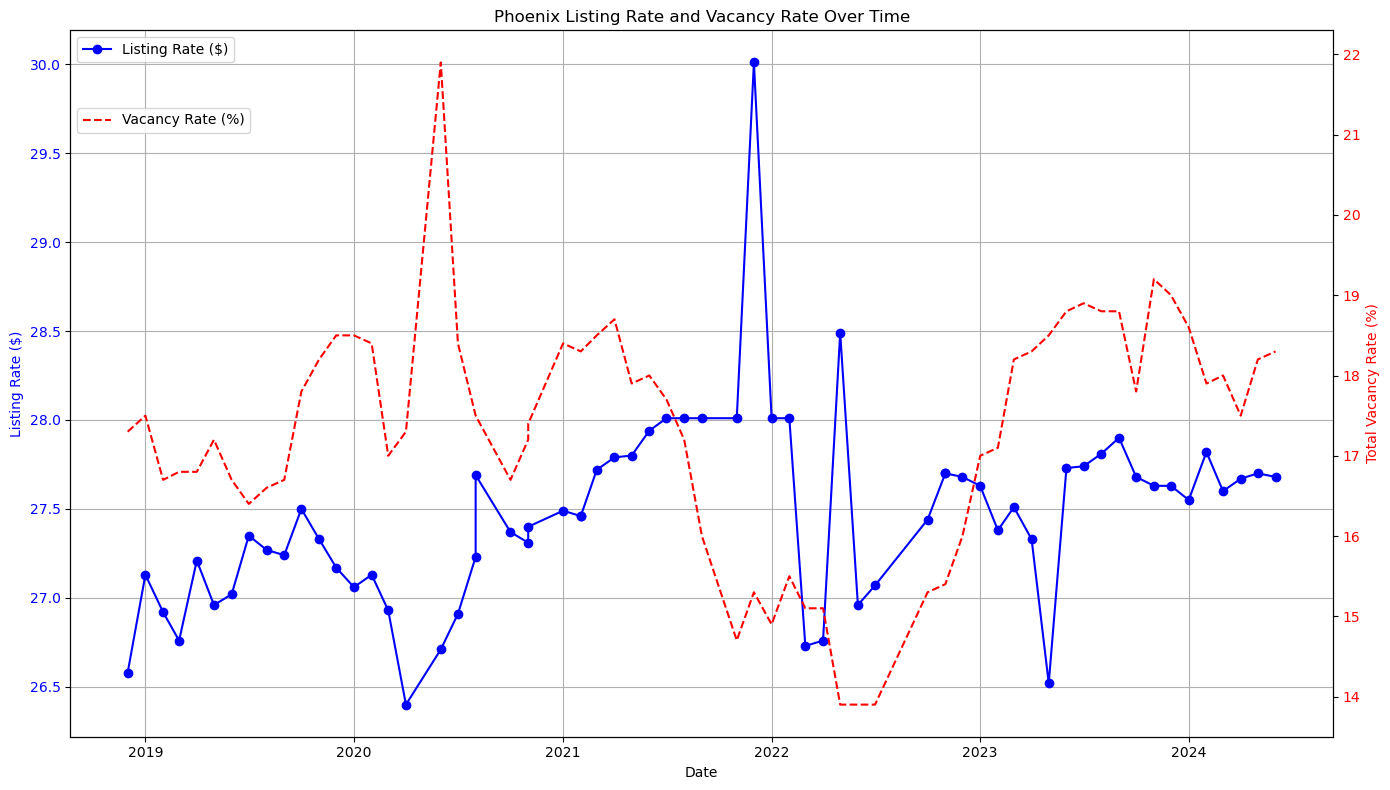

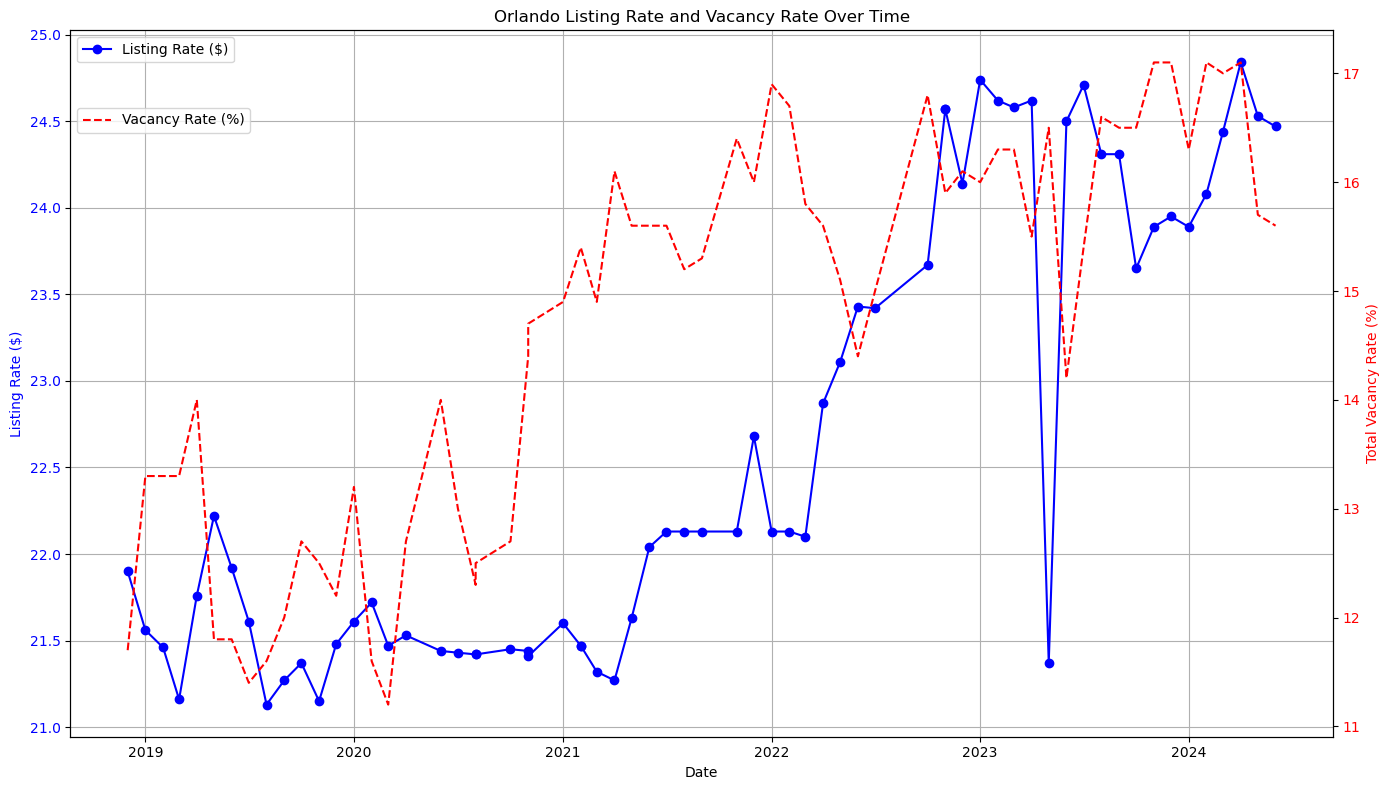

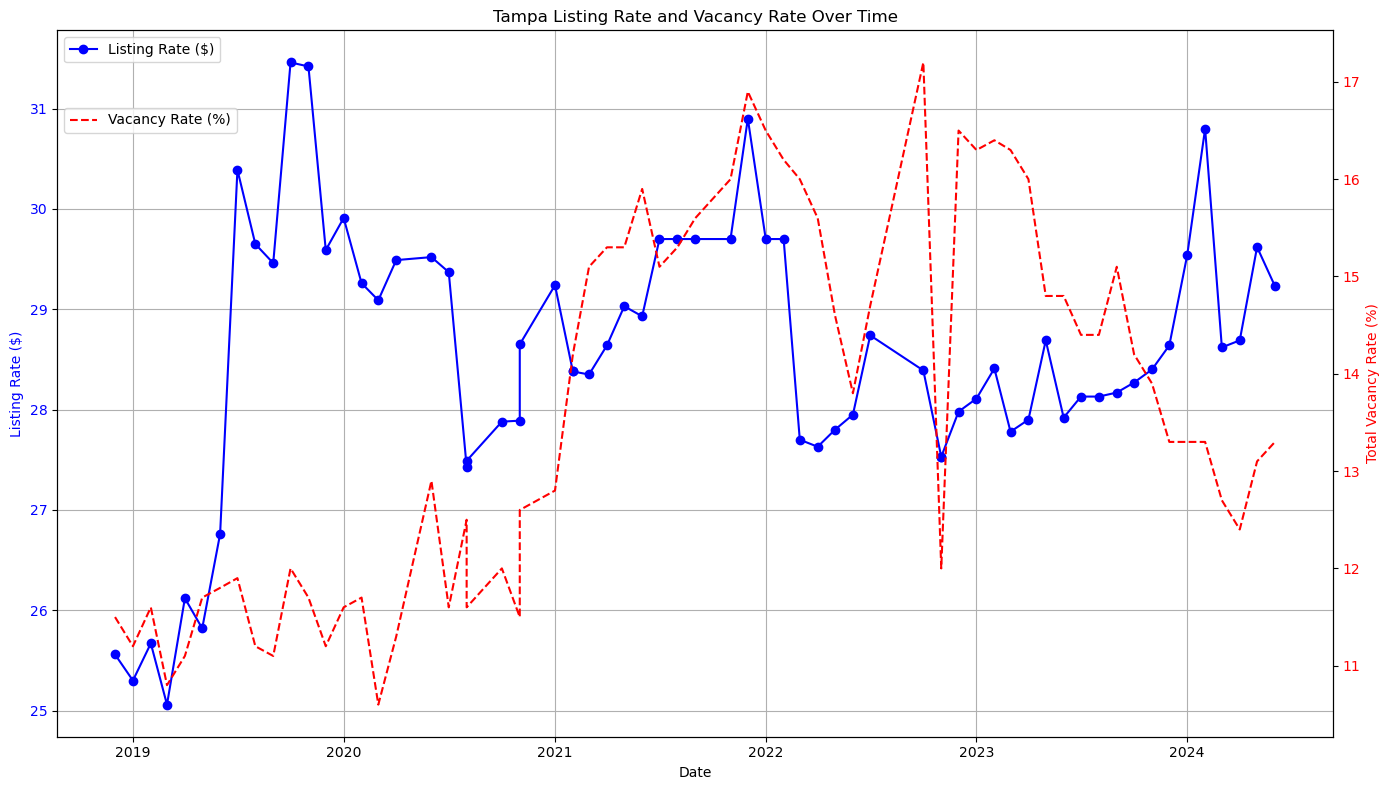

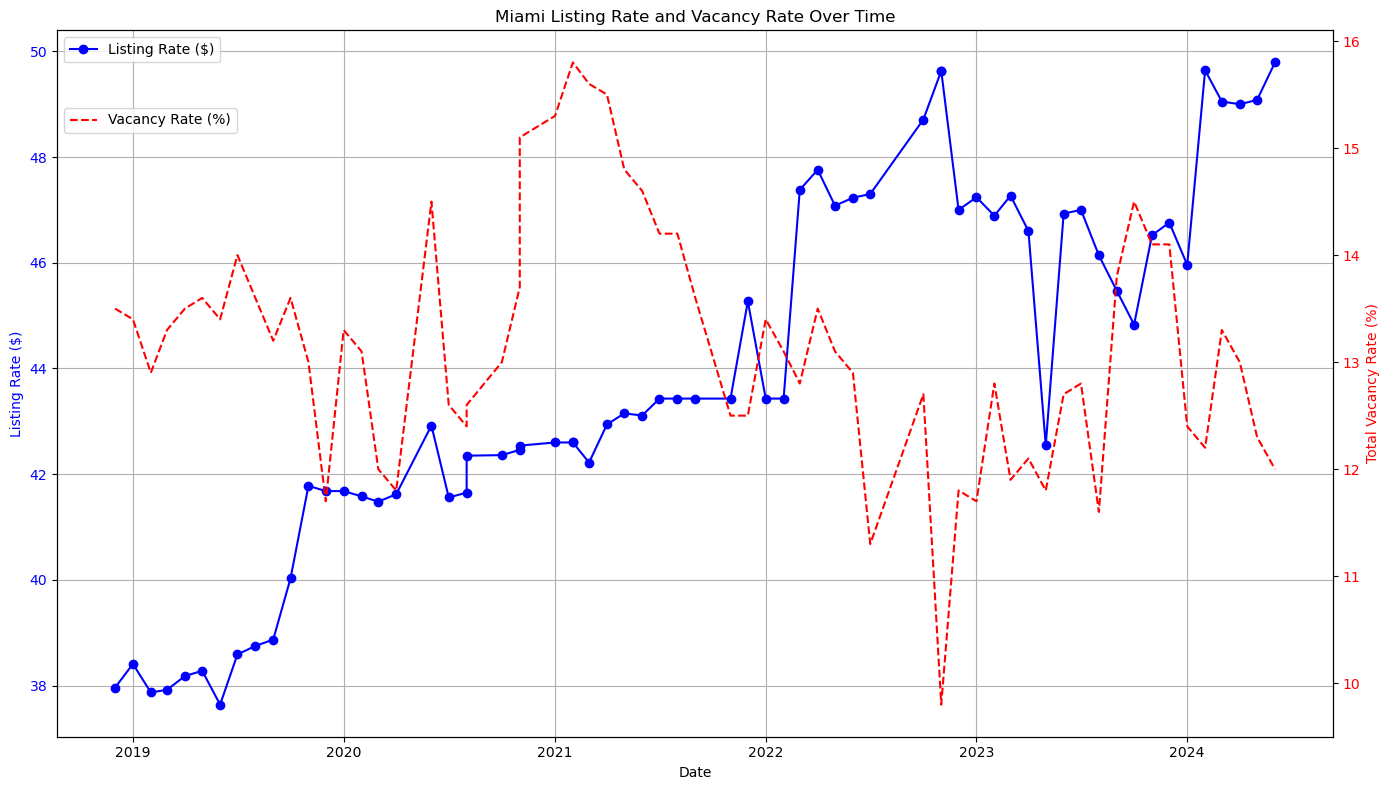

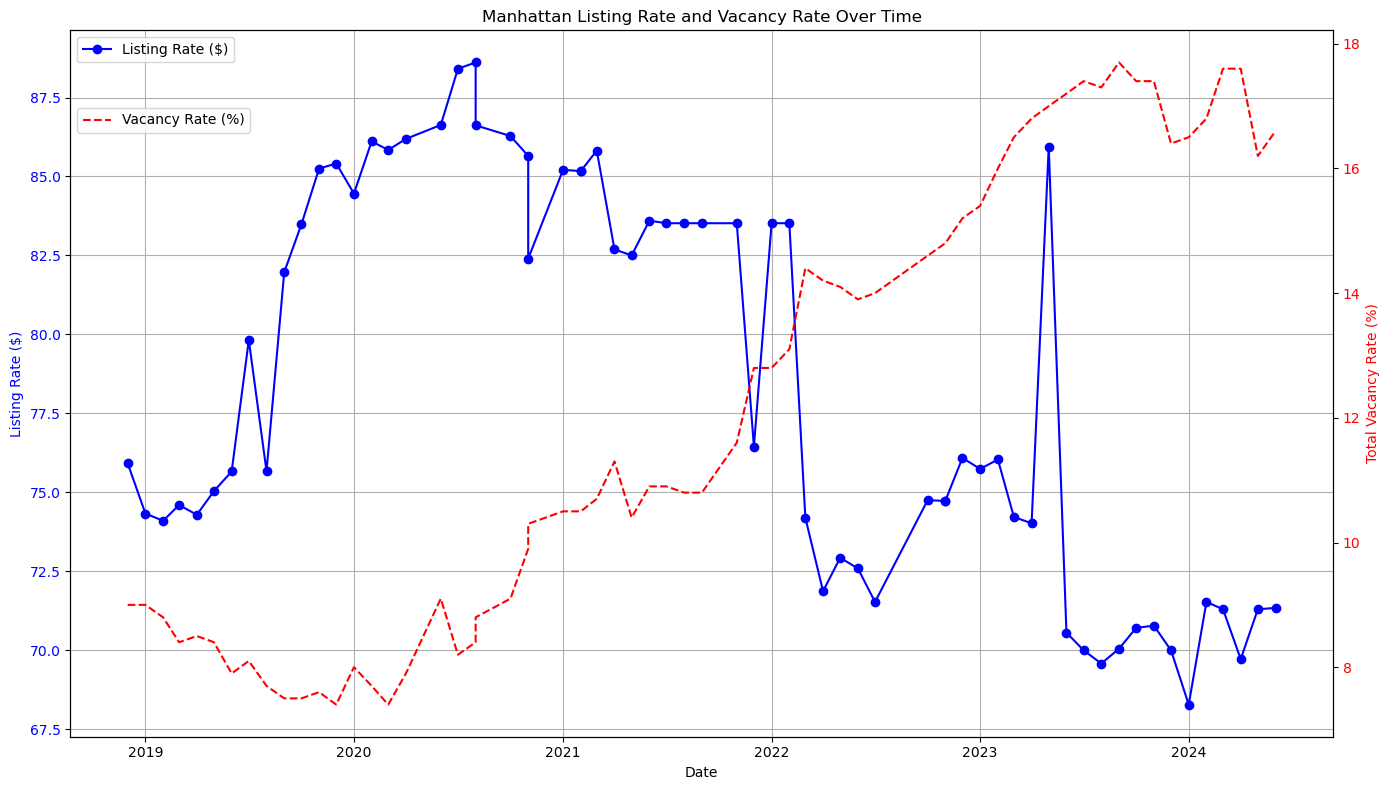

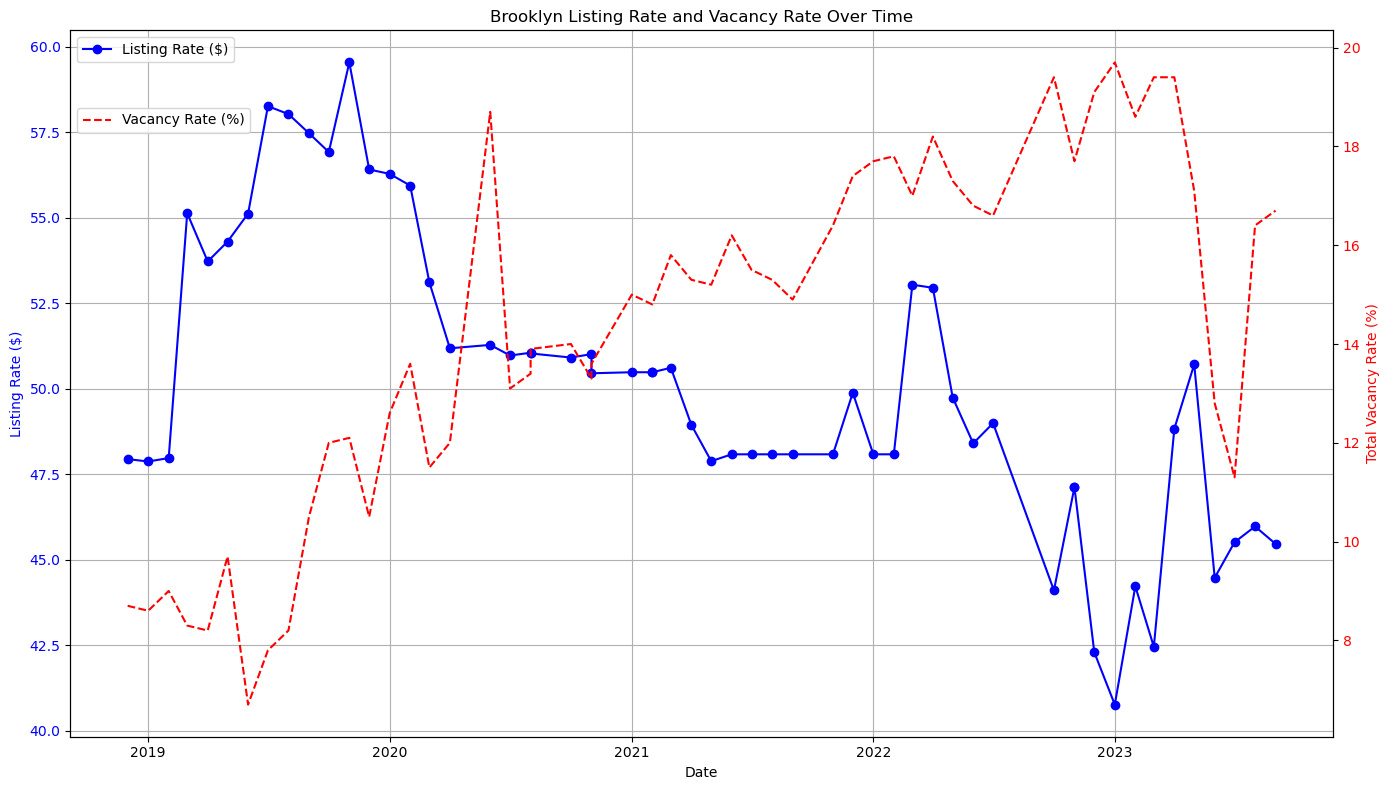

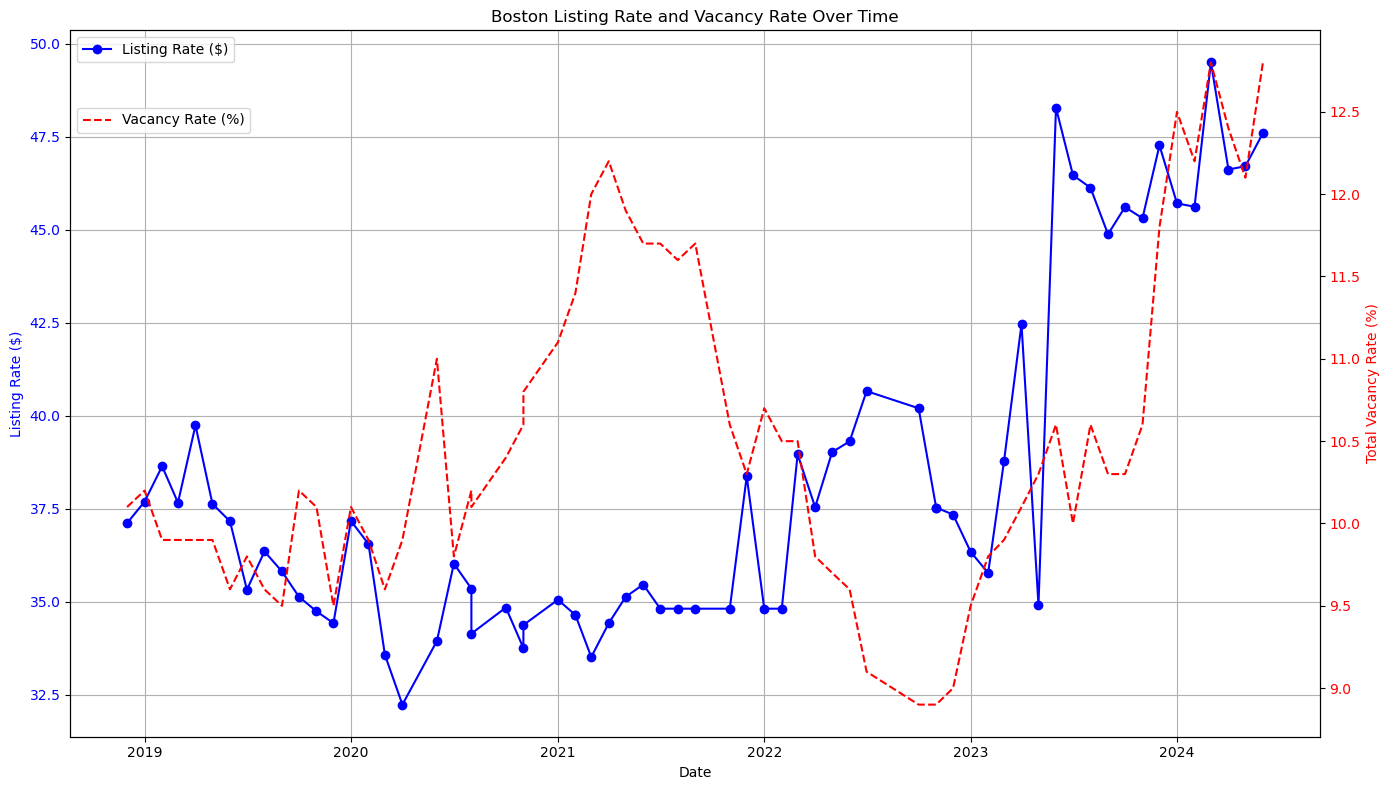

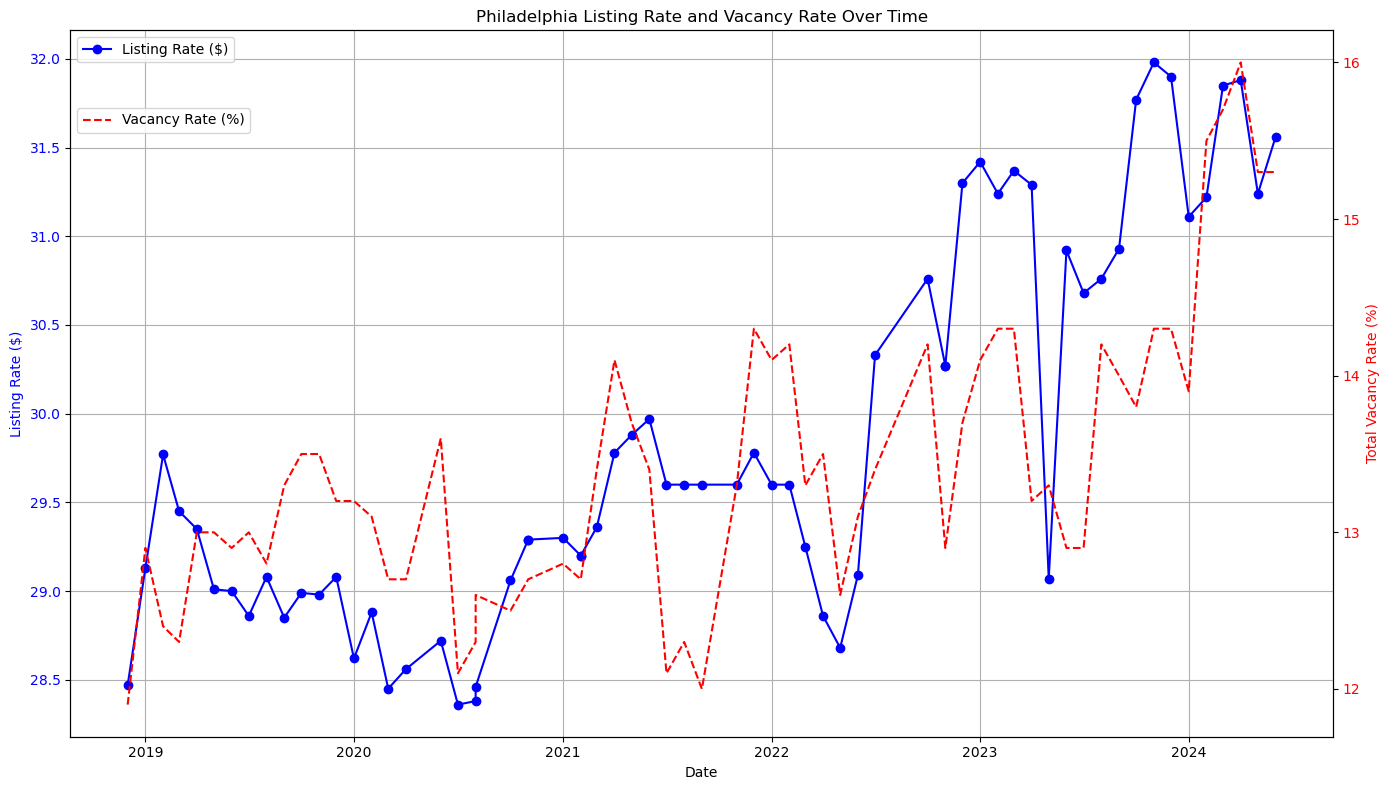

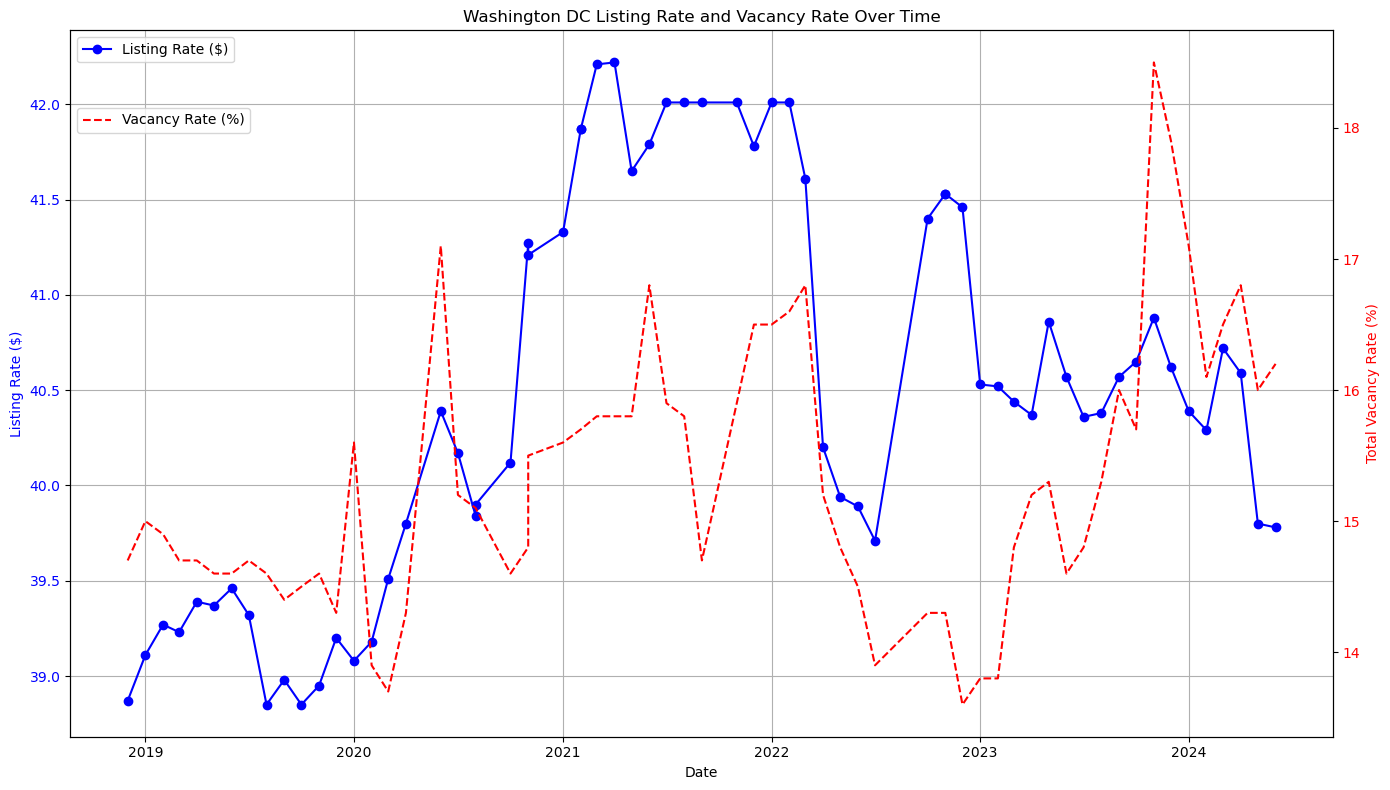

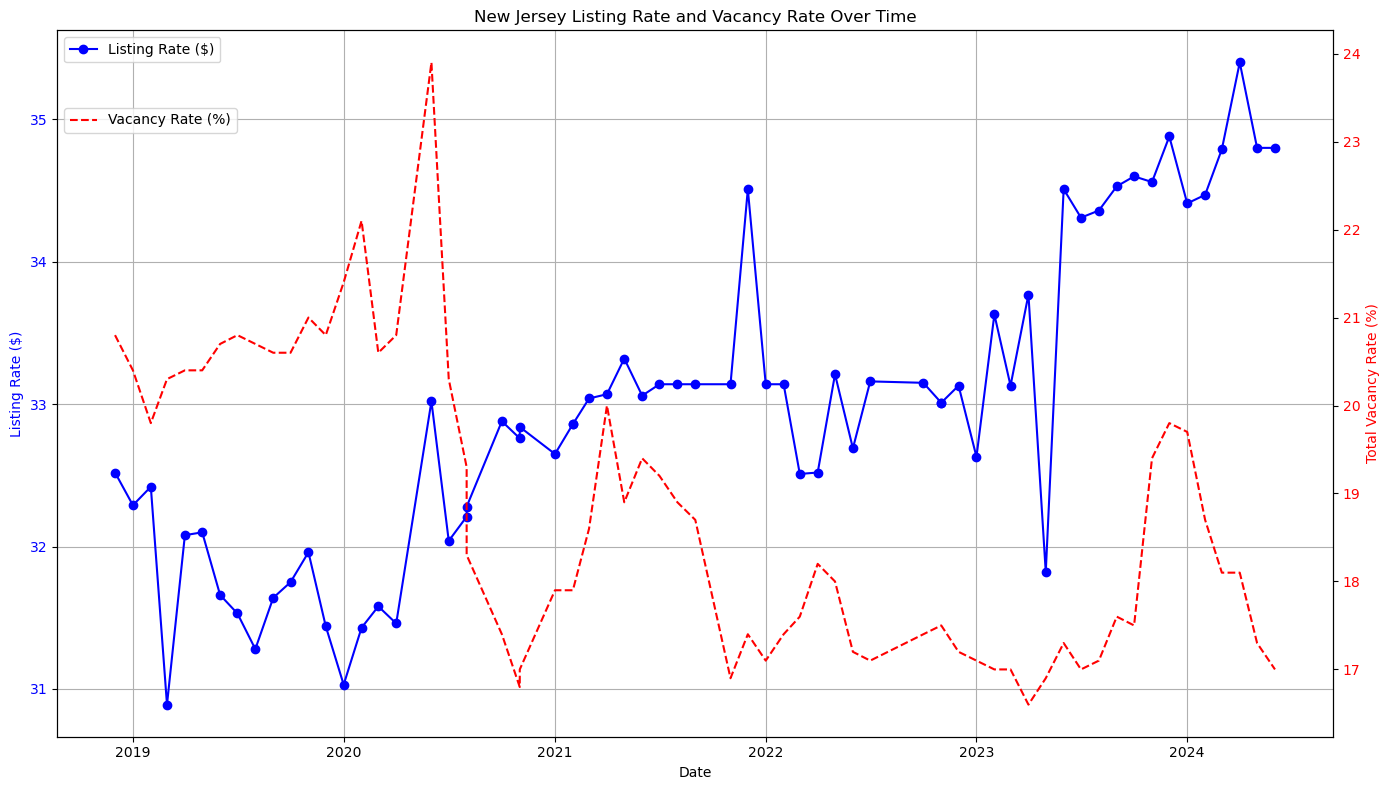

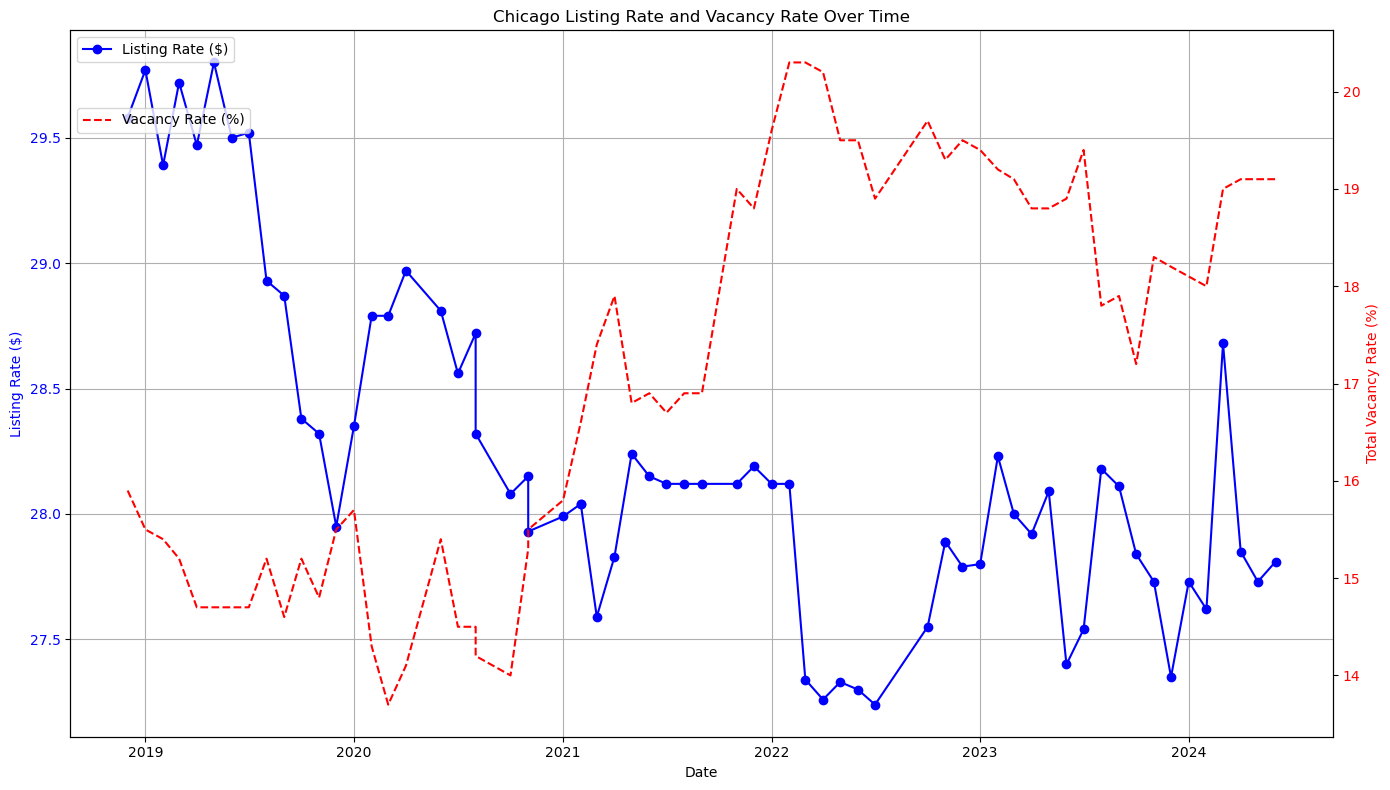

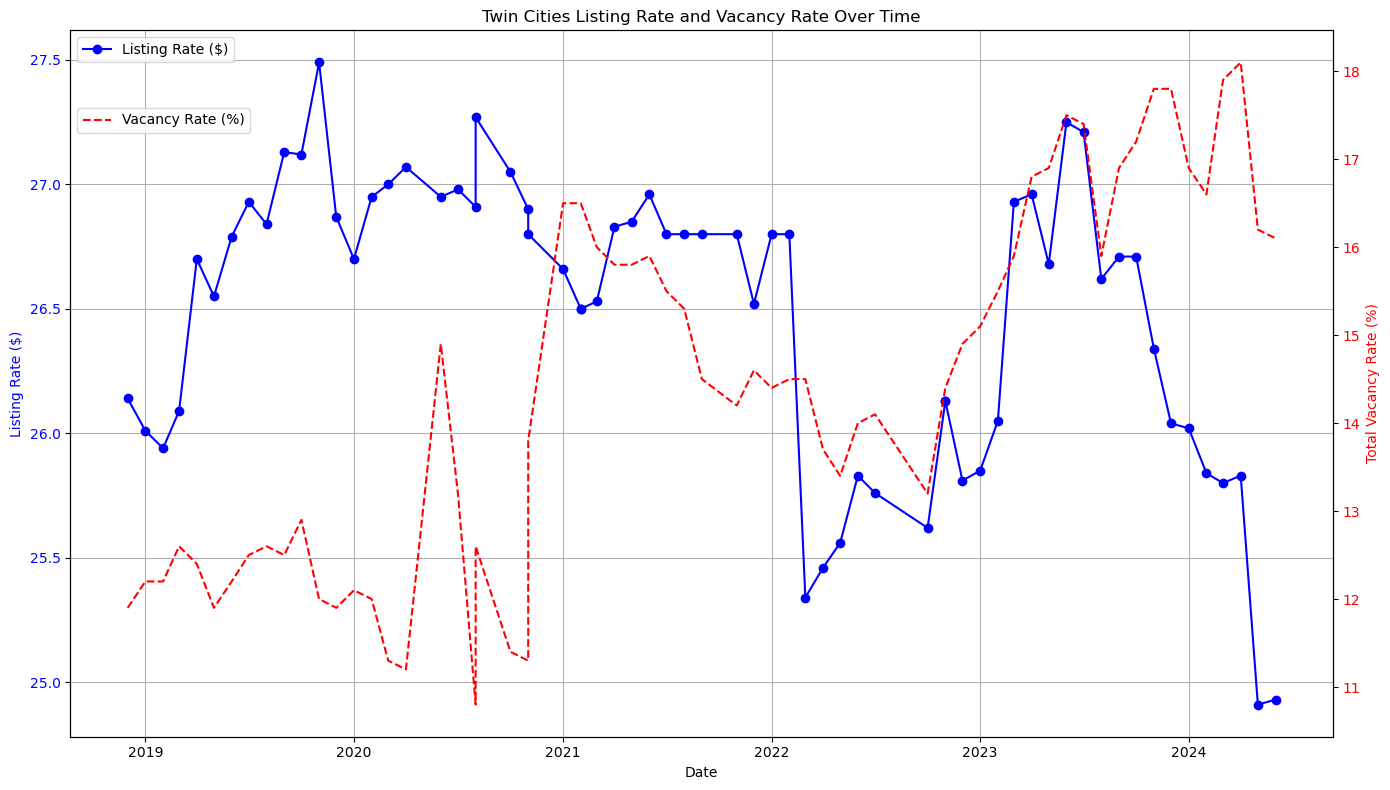

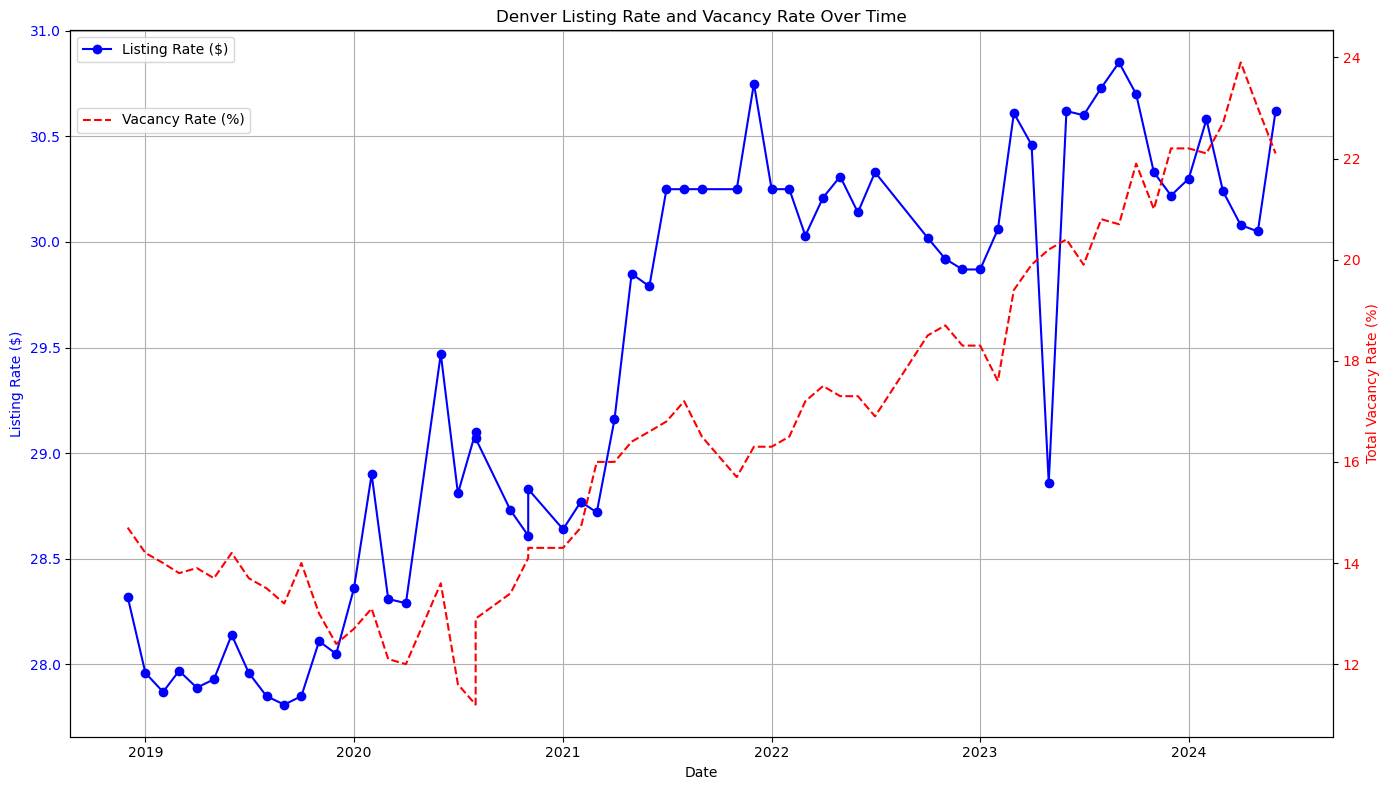

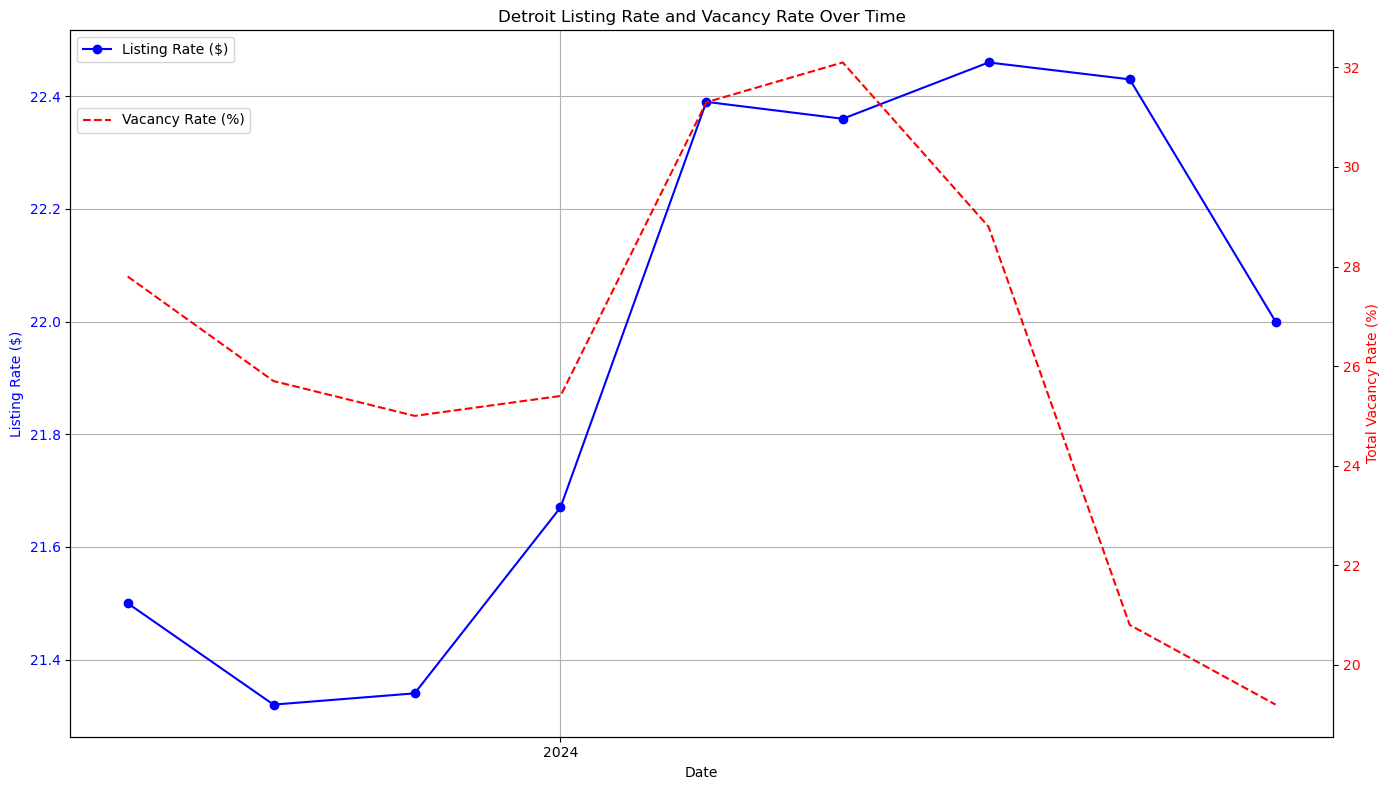

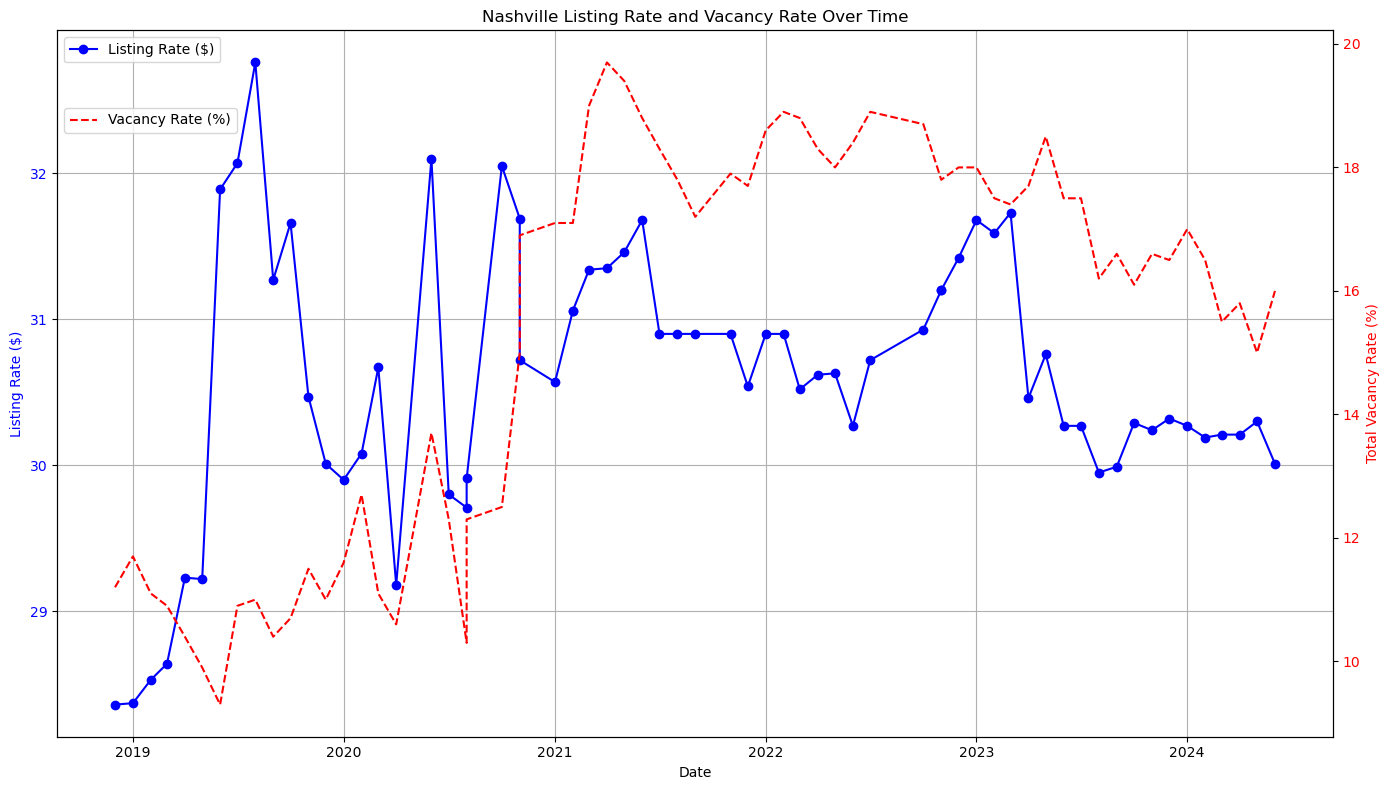

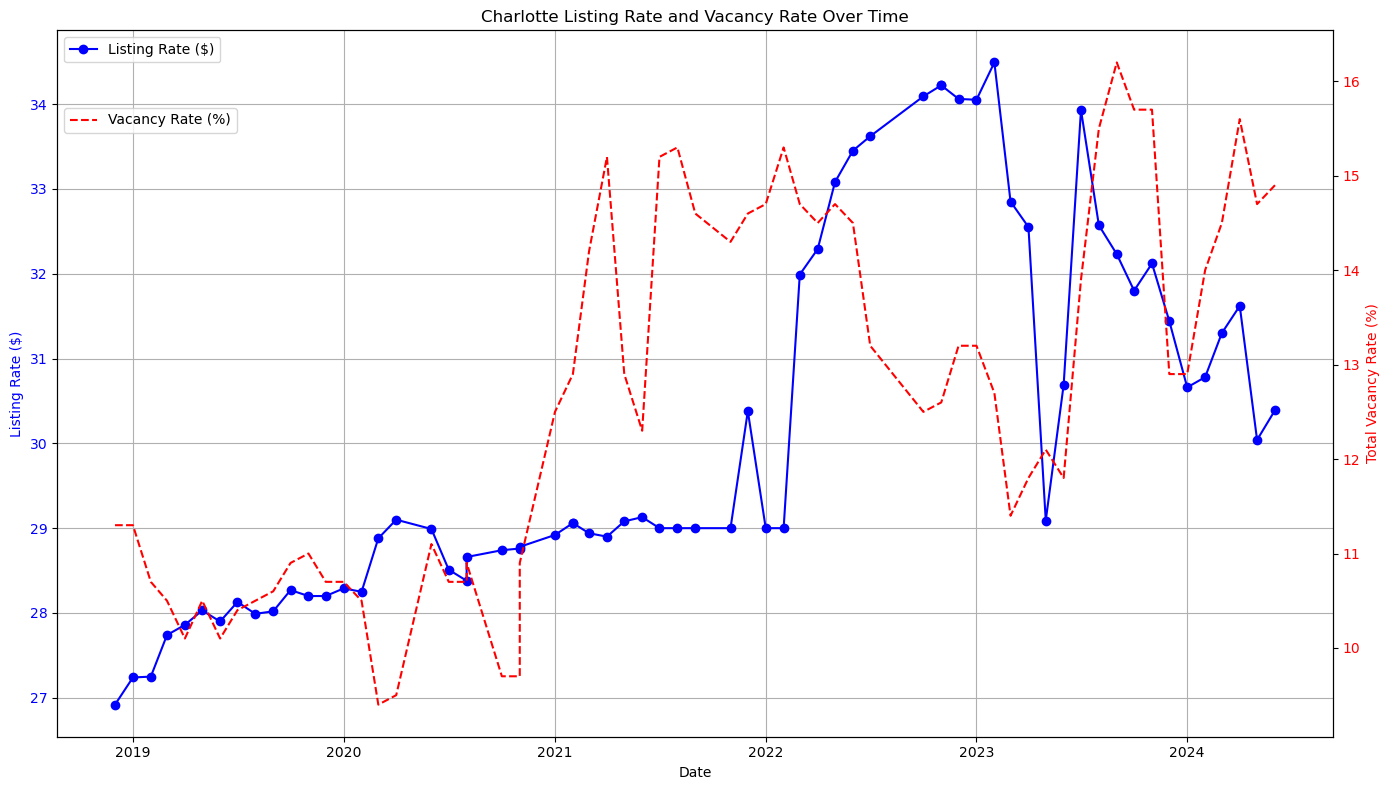

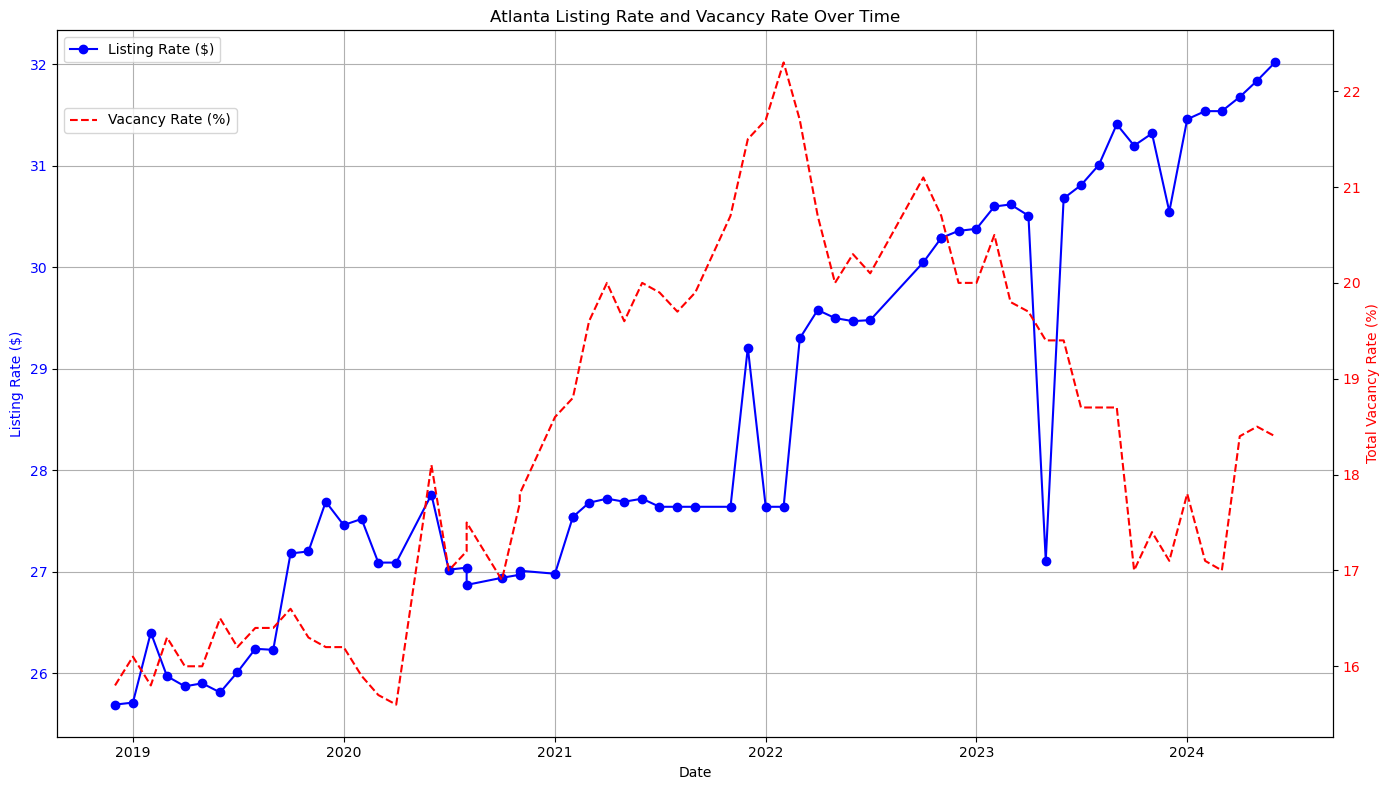

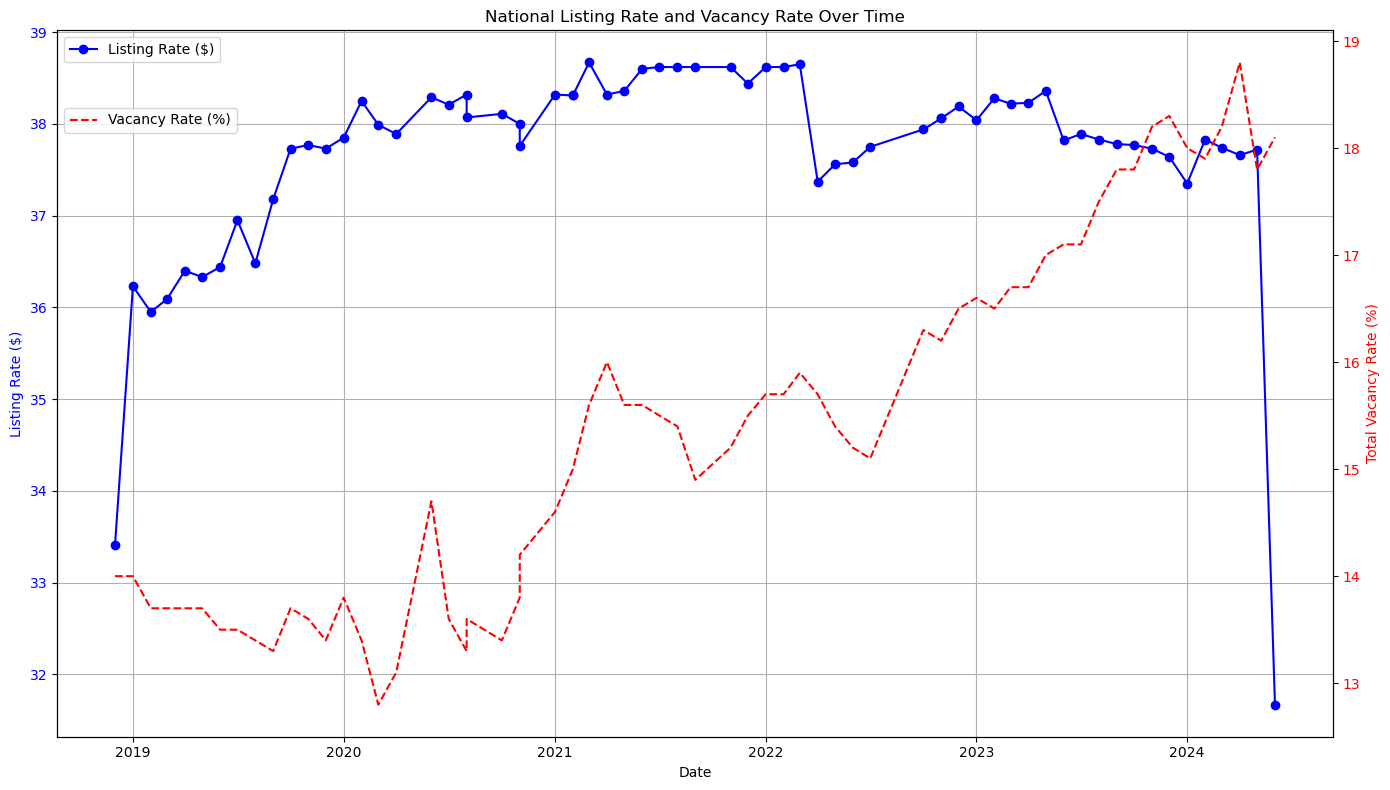

In [23]:


# Define the grouped cities
city_groups = {
    'California': ["Los Angeles", "Bay Area", "San Diego", "San Francisco"],
    'Pacific Northwest': ["Seattle", "Portland"],
    'Southwest': ["Austin", "Dallas", "Houston", "Phoenix"],
    'Florida': ["Orlando", "Tampa", "Miami"],
    'Northeast': ["Manhattan", "Brooklyn", "Boston"],
    'Mid-Atlantic': ["Philadelphia", "Washington DC", "New Jersey"],
    'Midwest': ["Chicago", "Twin Cities", "Denver", "Detroit"],
    'Southeast': [ "Nashville", "Charlotte", "Atlanta"],
    'National': ["National"]
}

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)  # Ensure data is sorted by Date

# Function to plot listing rates and vacancy rates for each city
def plot_city_data(city):
    city_data = df[df['Market'] == city]
    plt.figure(figsize=(14, 8))
    
    ax1 = plt.gca()
    ax1.plot(city_data['Date'], city_data['Listing Rate'], '-o', label='Listing Rate ($)', color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Listing Rate ($)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.xaxis.set_major_locator(YearLocator())
    ax1.xaxis.set_major_formatter(DateFormatter('%Y'))
    ax1.grid(True)
    
    ax2 = ax1.twinx()
    ax2.plot(city_data['Date'], city_data['Total Vacancy Rate'], '--', label='Vacancy Rate (%)', color='red')
    ax2.set_ylabel('Total Vacancy Rate (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    plt.title(f'{city} Listing Rate and Vacancy Rate Over Time')
    ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
    ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
    plt.tight_layout()
    plt.show()

# Plot each city in each group
for group_name, cities in city_groups.items():
    for city in cities:
        plot_city_data(city)


In [25]:
daily_ridership = pd.read_csv(
    "MTA_Daily_Ridership_Data__Beginning_2020.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Display the first and last five rows of the DataFrame
daily_ridership.sort_index(inplace =True)

display(daily_ridership.head())
display(daily_ridership.tail())

Subways: Total Estimated Ridership  \
Date                                             
2020-03-02                             5329915   
2020-03-03                             5481103   
2020-03-04                             5498809   
2020-03-05                             5496453   
2020-03-06                             5189447   

            Subways: % of Comparable Pre-Pandemic Day  \
Date                                                    
2020-03-02                                       0.96   
2020-03-03                                       0.98   
2020-03-04                                       0.99   
2020-03-05                                       0.99   
2020-03-06                                       0.93   

            Buses: Total Estimated Ridership  \
Date                                           
2020-03-02                           2209066   
2020-03-03                           2228608   
2020-03-04                           2177165   
2020-03-05                           2244515   
2020-03-06                           2066743   

            Buses: % of Comparable Pre-Pandemic Day  \
Date                                                  
2020-03-02                                     0.99   
2020-03-03                                     0.99   
2020-03-04                                     0.97   
2020-03-05                                     1.00   
2020-03-06                                     0.92   

            LIRR: Total Estimated Ridership  \
Date                                          
2020-03-02                         321569.0   
2020-03-03                         319727.0   
2020-03-04                         311662.0   
2020-03-05                         307597.0   
2020-03-06                         289171.0   

            LIRR: % of Comparable Pre-Pandemic Day  \
Date                                                 
2020-03-02                                    1.03   
2020-03-03                                    1.02   
2020-03-04                                    0.99   
2020-03-05                                    0.98   
2020-03-06                                    0.92   

            Metro-North: Total Estimated Ridership  \
Date                                                 
2020-03-02                                  180702   
2020-03-03                                  190648   
2020-03-04                                  192689   
2020-03-05                                  194387   
2020-03-06                                  205056   

            Metro-North: % of Comparable Pre-Pandemic Day  \
Date                                                        
2020-03-02                                           0.66   
2020-03-03                                           0.69   
2020-03-04                                           0.70   
2020-03-05                                           0.70   
2020-03-06                                           0.74   

            Access-A-Ride: Total Scheduled Trips  \
Date                                               
2020-03-02                                 30338   
2020-03-03                                 32767   
2020-03-04                                 34297   
2020-03-05                                 33209   
2020-03-06                                 30970   

            Access-A-Ride: % of Comparable Pre-Pandemic Day  \
Date                                                          
2020-03-02                                             1.02   
2020-03-03                                             1.10   
2020-03-04                                             1.15   
2020-03-05                                             1.12   
2020-03-06                                             1.04   

            Bridges and Tunnels: Total Traffic  \
Date                                             
2020-03-02                              874620   
2020-03-03                              882175   
2020-03-04     

Subways: Total Estimated Ridership  \
Date                                             
2024-07-21                             1877551   
2024-07-22                             3235046   
2024-07-23                             3605664   
2024-07-24                             3654248   
2024-07-25                             3634815   

            Subways: % of Comparable Pre-Pandemic Day  \
Date                                                    
2024-07-21                                       0.80   
2024-07-22                                       0.61   
2024-07-23                                       0.68   
2024-07-24                                       0.69   
2024-07-25                                       0.69   

            Buses: Total Estimated Ridership  \
Date                                           
2024-07-21                            656891   
2024-07-22                           1161435   
2024-07-23                           1197058   
2024-07-24                           1192941   
2024-07-25                           1123778   

            Buses: % of Comparable Pre-Pandemic Day  \
Date                                                  
2024-07-21                                     0.60   
2024-07-22                                     0.56   
2024-07-23                                     0.58   
2024-07-24                                     0.58   
2024-07-25                                     0.54   

            LIRR: Total Estimated Ridership  \
Date                                          
2024-07-21                         126169.0   
2024-07-22                         231813.0   
2024-07-23                         247915.0   
2024-07-24                         249158.0   
2024-07-25                         255367.0   

            LIRR: % of Comparable Pre-Pandemic Day  \
Date                                                 
2024-07-21                                    1.20   
2024-07-22                                    0.73   
2024-07-23                                    0.78   
2024-07-24                                    0.79   
2024-07-25                                    0.81   

            Metro-North: Total Estimated Ridership  \
Date                                                 
2024-07-21                                  111438   
2024-07-22                                  215087   
2024-07-23                                  229842   
2024-07-24                                  224862   
2024-07-25                                  214281   

            Metro-North: % of Comparable Pre-Pandemic Day  \
Date                                                        
2024-07-21                                           1.05   
2024-07-22                                           0.76   
2024-07-23                                           0.81   
2024-07-24                                           0.79   
2024-07-25                                           0.76   

            Access-A-Ride: Total Scheduled Trips  \
Date                                               
2024-07-21                                 21664   
2024-07-22                                 32431   
2024-07-23                                 35110   
2024-07-24                                 36652   
2024-07-25                                 35373   

            Access-A-Ride: % of Comparable Pre-Pandemic Day  \
Date                                                          
2024-07-21                                             1.31   
2024-07-22                                             1.14   
2024-07-23                                             1.24   
2024-07-24                                             1.29   
2024-07-25                                             1.25   

            Bridges and Tunnels: Total Traffic  \
Date                                             
2024-07-21                              962715   
2024-07-22                              937858   
2024-07-23     

In [27]:
print(daily_ridership.columns)
print(len(daily_ridership))
print(daily_ridership.dtypes)

Index(['Subways: Total Estimated Ridership',
       'Subways: % of Comparable Pre-Pandemic Day',
       'Buses: Total Estimated Ridership',
       'Buses: % of Comparable Pre-Pandemic Day',
       'LIRR: Total Estimated Ridership',
       'LIRR: % of Comparable Pre-Pandemic Day',
       'Metro-North: Total Estimated Ridership',
       'Metro-North: % of Comparable Pre-Pandemic Day',
       'Access-A-Ride: Total Scheduled Trips',
       'Access-A-Ride: % of Comparable Pre-Pandemic Day',
       'Bridges and Tunnels: Total Traffic',
       'Bridges and Tunnels: % of Comparable Pre-Pandemic Day',
       'Staten Island Railway: Total Estimated Ridership',
       'Staten Island Railway: % of Comparable Pre-Pandemic Day'],
      dtype='object')
1575
Subways: Total Estimated Ridership                           int64
Subways: % of Comparable Pre-Pandemic Day                  float64
Buses: Total Estimated Ridership                             int64
Buses: % of Comparable Pre-Pandemic Day       

In [29]:
# Rename Columns to remove strings
dr_df = daily_ridership.rename(columns = {"Subways: Total Estimated Ridership" : "subway_est",
                                          "Subways: % of Comparable Pre-Pandemic Day" : "subway_comp",
                                          "Buses: Total Estimated Ridership" : "bus_est",
                                          "Buses: % of Comparable Pre-Pandemic Day" : "bus_comp",
                                          "LIRR: Total Estimated Ridership" : "lirr_est",
                                          "LIRR: % of Comparable Pre-Pandemic Day" : "lirr_comp",
                                          "Metro-North: Total Estimated Ridership" : "metro_north_est",
                                          "Metro-North: % of Comparable Pre-Pandemic Day" : "metro_north_comp",
                                          "Access-A-Ride: Total Scheduled Trips" : "access_a_ride_est",
                                          "Access-A-Ride: % of Comparable Pre-Pandemic Day" : "access_a_ride_comp",
                                          "Bridges and Tunnels: Total Traffic" : "bridge_tunnel_est",
                                          "Bridges and Tunnels: % of Comparable Pre-Pandemic Day" : "bridge_tunnel_comp",
                                          "Staten Island Railway: Total Estimated Ridership" : "sir_est",
                                          "Staten Island Railway: % of Comparable Pre-Pandemic Day" : "sir_comp"
                                          })

dr_df.head()


subway_est  subway_comp  bus_est  bus_comp  lirr_est  lirr_comp  \
Date                                                                          
2020-03-02     5329915         0.96  2209066      0.99  321569.0       1.03   
2020-03-03     5481103         0.98  2228608      0.99  319727.0       1.02   
2020-03-04     5498809         0.99  2177165      0.97  311662.0       0.99   
2020-03-05     5496453         0.99  2244515      1.00  307597.0       0.98   
2020-03-06     5189447         0.93  2066743      0.92  289171.0       0.92   

            metro_north_est  metro_north_comp  access_a_ride_est  \
Date                                                               
2020-03-02           180702              0.66              30338   
2020-03-03           190648              0.69              32767   
2020-03-04           192689              0.70              34297   
2020-03-05           194387              0.70              33209   
2020-03-06           205056              0.74              30970   

            access_a_ride_comp  bridge_tunnel_est  bridge_tunnel_comp  \
Date                                                                    
2020-03-02                1.02             874620                0.95   
2020-03-03                1.10             882175                0.96   
2020-03-04                1.15             905558                0.98   
2020-03-05                1.12             929298                1.01   
2020-03-06                1.04             945408                1.03   

            sir_est  sir_comp  
Date                           
2020-03-02  17140.0      1.07  
2020-03-03  17453.0      1.09  
2020-03-04  17136.0      1.07  
2020-03-05  17203.0      1.08  
2020-03-06  15285.0      0.96

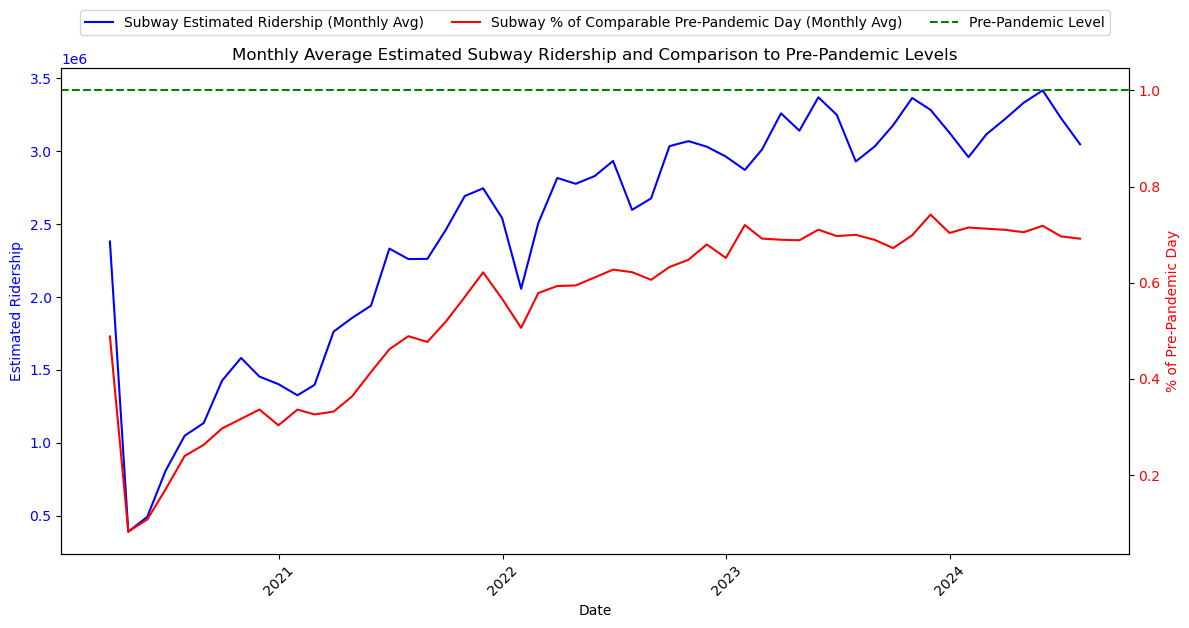

In [31]:
# Resample data to monthly averages
monthly_data = dr_df.resample('M').mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot subway_est on the primary y-axis
ax1.plot(monthly_data.index, monthly_data['subway_est'], label='Subway Estimated Ridership (Monthly Avg)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format x-axis
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Secondary y-axis
ax2 = ax1.twinx()
ax2.plot(monthly_data.index, monthly_data['subway_comp'], label='Subway % of Comparable Pre-Pandemic Day (Monthly Avg)', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 100%
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Title and legend
plt.title('Monthly Average Estimated Subway Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()

# Positioning the legend above the plot
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

# Show the plot
plt.show()


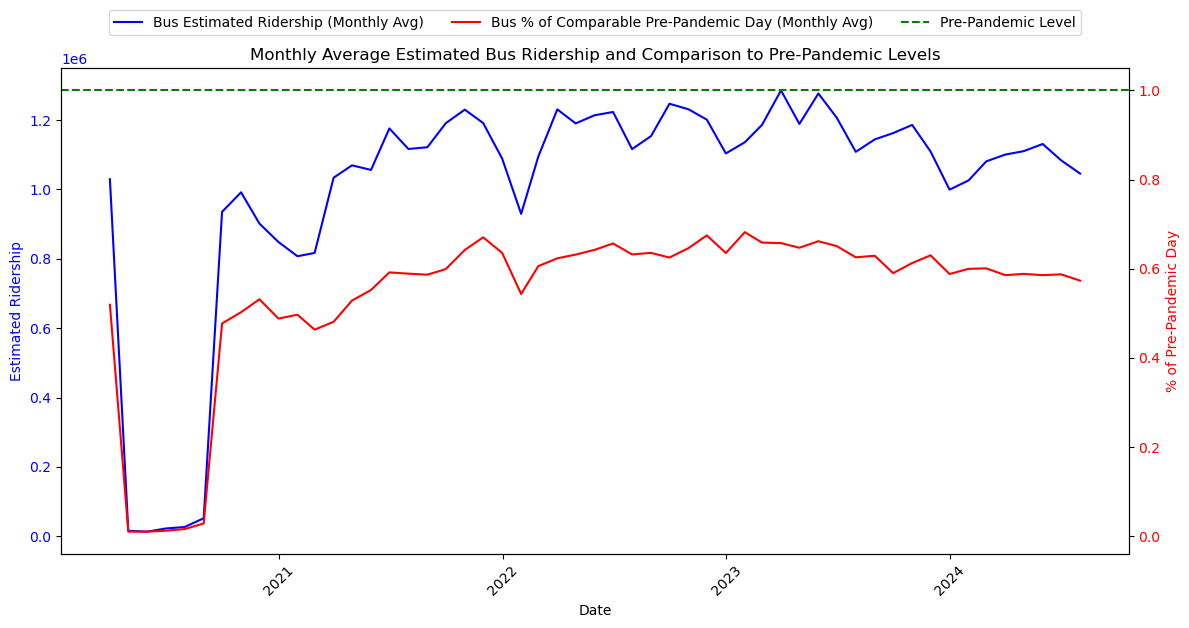

In [33]:
# Resample data to monthly averages
monthly_bus_data = dr_df[['bus_est', 'bus_comp']].resample('M').mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bus_est on the primary y-axis with monthly averages
ax1.plot(monthly_bus_data.index, monthly_bus_data['bus_est'], label='Bus Estimated Ridership (Monthly Avg)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format the x-axis to display years and adjust date formatting
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  # Rotate dates for better visibility

# Create a secondary y-axis for percentage comparisons
ax2 = ax1.twinx()
ax2.plot(monthly_bus_data.index, monthly_bus_data['bus_comp'], label='Bus % of Comparable Pre-Pandemic Day (Monthly Avg)', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 1.0 for the secondary y-axis to indicate the pre-pandemic level
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and adjust legend
plt.title('Monthly Average Estimated Bus Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)  # Adjust legend to top center

# Display the plot
plt.show()

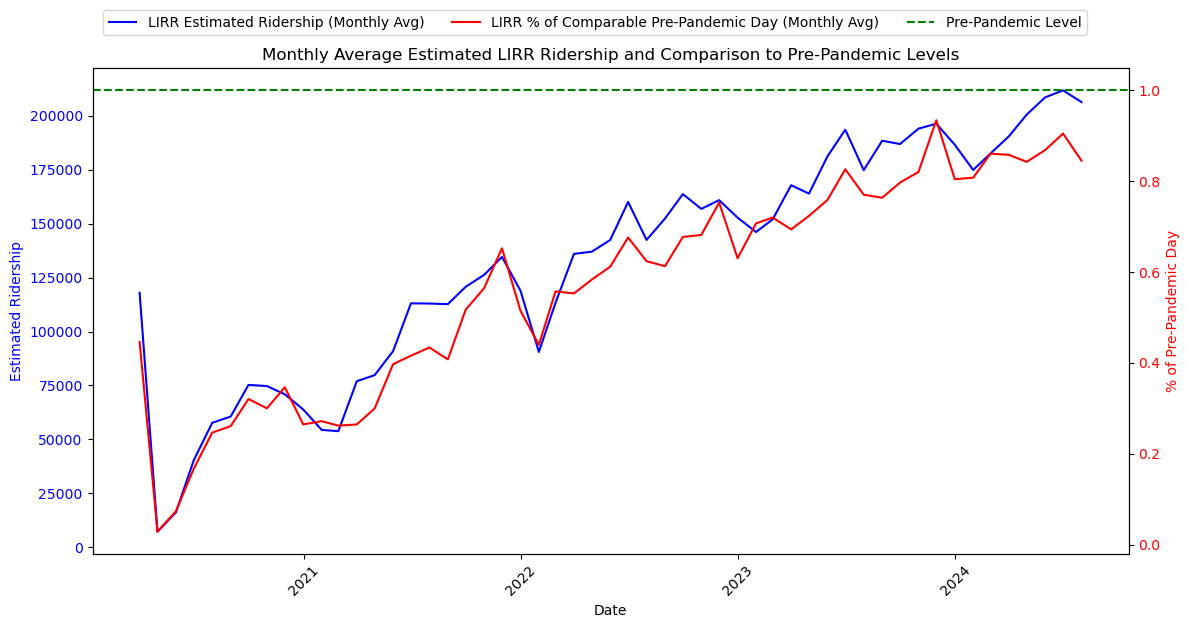

In [35]:
# Resample data to monthly averages
monthly_lirr_data = dr_df[['lirr_est', 'lirr_comp']].resample('M').mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot lirr_est on the primary y-axis with monthly averages
ax1.plot(monthly_lirr_data.index, monthly_lirr_data['lirr_est'], label='LIRR Estimated Ridership (Monthly Avg)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format the x-axis to display years and adjust date formatting
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  # Rotate dates for better visibility

# Create a secondary y-axis for percentage comparisons
ax2 = ax1.twinx()
ax2.plot(monthly_lirr_data.index, monthly_lirr_data['lirr_comp'], label='LIRR % of Comparable Pre-Pandemic Day (Monthly Avg)', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 1.0 for the secondary y-axis to indicate the pre-pandemic level
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and adjust legend
plt.title('Monthly Average Estimated LIRR Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)  # Adjust legend to top center

# Display the plot
plt.show()

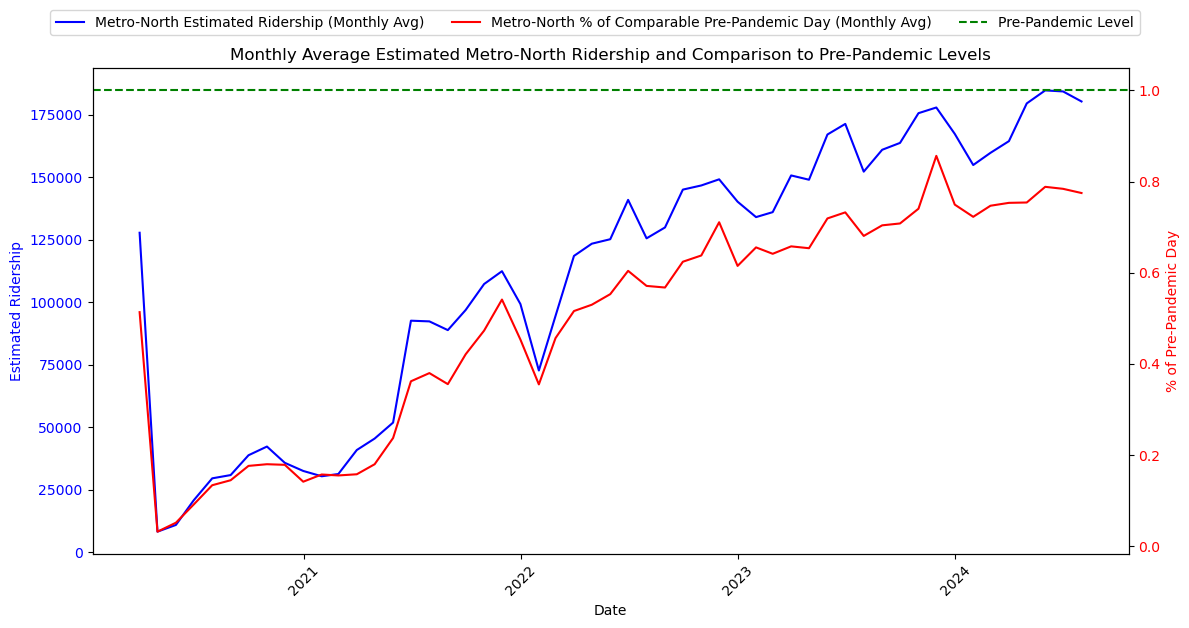

In [37]:
# Resample data to monthly averages
monthly_metro_north_data = dr_df[['metro_north_est', 'metro_north_comp']].resample('M').mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot metro_north_est on the primary y-axis with monthly averages
ax1.plot(monthly_metro_north_data.index, monthly_metro_north_data['metro_north_est'], label='Metro-North Estimated Ridership (Monthly Avg)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format the x-axis to display years and adjust date formatting
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  # Rotate dates for better visibility

# Create a secondary y-axis for percentage comparisons
ax2 = ax1.twinx()
ax2.plot(monthly_metro_north_data.index, monthly_metro_north_data['metro_north_comp'], label='Metro-North % of Comparable Pre-Pandemic Day (Monthly Avg)', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 1.0 for the secondary y-axis to indicate the pre-pandemic level
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and adjust legend
plt.title('Monthly Average Estimated Metro-North Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)  # Adjust legend to top center

# Display the plot
plt.show()


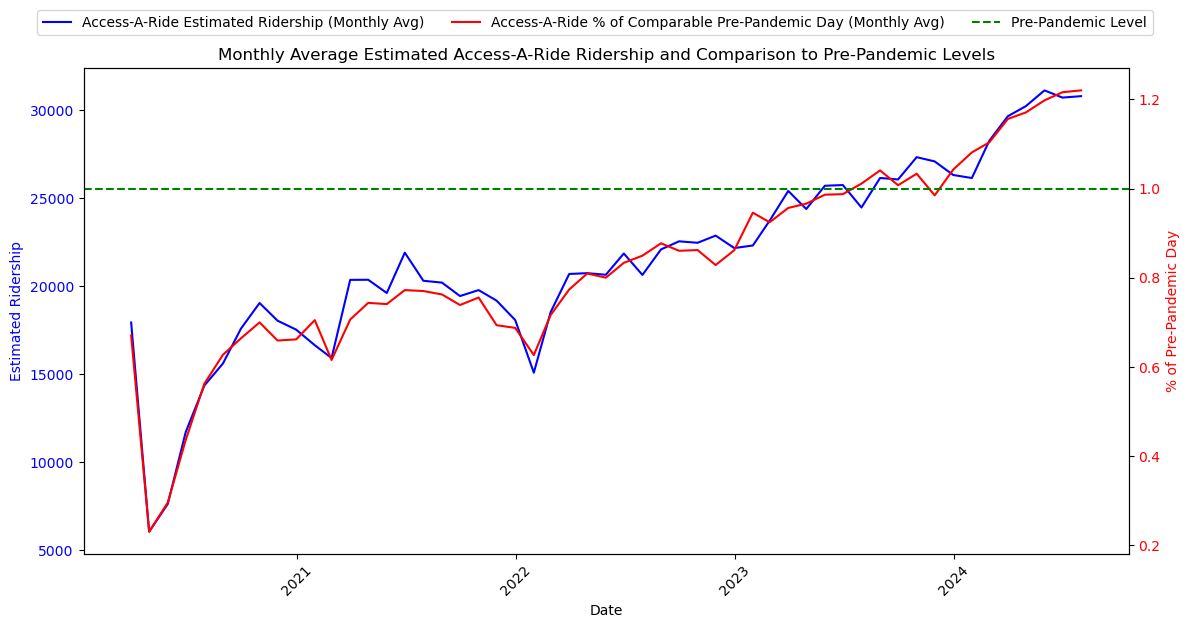

In [39]:
# Resample data to monthly averages
monthly_access_ride_data = dr_df[['access_a_ride_est', 'access_a_ride_comp']].resample('M').mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot access_a_ride_est on the primary y-axis with monthly averages
ax1.plot(monthly_access_ride_data.index, monthly_access_ride_data['access_a_ride_est'], label='Access-A-Ride Estimated Ridership (Monthly Avg)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format the x-axis to display years and adjust date formatting
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  # Rotate dates for better visibility

# Create a secondary y-axis for percentage comparisons
ax2 = ax1.twinx()
ax2.plot(monthly_access_ride_data.index, monthly_access_ride_data['access_a_ride_comp'], label='Access-A-Ride % of Comparable Pre-Pandemic Day (Monthly Avg)', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 1.0 for the secondary y-axis to indicate the pre-pandemic level
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and adjust legend
plt.title('Monthly Average Estimated Access-A-Ride Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)  # Adjust legend to top center

# Display the plot
plt.show()


In [41]:
# Resample data to monthly averages
monthly_bridge_tunnel_data = dr_df[['bridge_tunnel_est', 'bridge_tunnel_comp']].resample('M').mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bridge_tunnel_est on the primary y-axis with monthly averages
ax1.plot(monthly_bridge_tunnel_data.index, monthly_bridge_tunnel_data['bridge_tunnel_est'], label='Bridge & Tunnel Estimated Ridership (Monthly Avg)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format the x-axis to display years and adjust date formatting
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  # Rotate dates for better visibility

# Create a secondary y-axis for percentage comparisons
ax2 = ax1.twinx()
ax2.plot(monthly_bridge_tunnel_data.index, monthly_bridge_tunnel_data['bridge_tunnel_comp'], label='Bridge & Tunnel % of Comparable Pre-Pandemic Day (Monthly Avg)', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 1.0 for the secondary y-axis to indicate the pre-pandemic level
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and adjust legend
plt.title('Monthly Average Estimated Bridge & Tunnel Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)  # Adjust legend to top center

# Display the plot
plt.show()


In [43]:
# Resample data to monthly averages
monthly_sir_data = dr_df[['sir_est', 'sir_comp']].resample('M').mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot sir_est on the primary y-axis with monthly averages
ax1.plot(monthly_sir_data.index, monthly_sir_data['sir_est'], label='Staten Island Rail Estimated Ridership (Monthly Avg)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format the x-axis to display years and adjust date formatting
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  # Rotate dates for better visibility

# Create a secondary y-axis for percentage comparisons
ax2 = ax1.twinx()
ax2.plot(monthly_sir_data.index, monthly_sir_data['sir_comp'], label='Staten Island Rail % of Comparable Pre-Pandemic Day (Monthly Avg)', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 1.0 for the secondary y-axis to indicate the pre-pandemic level
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and adjust legend
plt.title('Monthly Average Estimated Staten Island Rail Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)  # Adjust legend to top center

# Display the plot
plt.show()


In [45]:
# Average est and comp by category by day of week
# Test it out for different time periods
dr_df['day_of_week'] = dr_df.index.day_name()

average_ridership_by_day = dr_df.groupby('day_of_week').mean()

days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_ridership_by_day = average_ridership_by_day.reindex(days_of_week_order)

print(average_ridership_by_day)

               subway_est  subway_comp       bus_est  bus_comp       lirr_est  \
day_of_week                                                                     
Monday       2.538669e+06     0.507696  1.079326e+06  0.541435  143521.526087   
Tuesday      2.856833e+06     0.521478  1.170607e+06  0.542826  159118.286957   
Wednesday    2.923502e+06     0.533000  1.188358e+06  0.552130  159069.921739   
Thursday     2.876048e+06     0.532478  1.157054e+06  0.543870  155029.556522   
Friday       2.729566e+06     0.517860  1.109467e+06  0.533799  149804.467249   
Saturday     1.852100e+06     0.599765  7.079889e+05  0.530939   82745.577465   
Sunday       1.469769e+06     0.613239  5.542583e+05  0.548310   70042.004695   

             lirr_comp  metro_north_est  metro_north_comp  access_a_ride_est  \
day_of_week                                                                    
Monday        0.531522    117657.847826          0.465609       21835.934783   
Tuesday       0.505739    1352

In [47]:
monthly_mta = pd.read_csv(
    "MTA_Monthly_Ridership___Traffic_Data__Beginning_January_2008.csv",
    index_col='Month',
    parse_dates=True
).dropna()

# Display the first and last five rows of the DataFrame
monthly_mta.sort_index(inplace =True)

display(monthly_mta.head())
display(monthly_mta.tail())

Agency  Ridership
Month                       
2008-01-01    MNR    6453734
2008-02-01    MNR    6144377
2008-03-01    MNR    6602280
2008-04-01    B&T   24900328
2008-04-01    MNR    6787480

Agency  Ridership
Month                       
2024-02-01    AAR     944524
2024-02-01    SIR     176396
2024-02-01    B&T   25061171
2024-02-01    MNR    4710620
2024-02-01   LIRR    5331553

In [49]:
agencies = monthly_mta['Agency'].unique()
agencies

array(['MNR', 'B&T', 'Bus', 'Subway', 'LIRR', 'AAR', 'SIR'], dtype=object)

In [51]:
subway = monthly_mta.loc[monthly_mta['Agency'] == "Subway"]

print(subway)

            Agency  Ridership
Month                        
2018-01-01  Subway  134683435
2018-02-01  Subway  127432835
2018-03-01  Subway  143982923
2018-04-01  Subway  141950369
2018-05-01  Subway  150320833
...            ...        ...
2023-10-01  Subway  103949018
2023-11-01  Subway   98511566
2023-12-01  Subway   95685578
2024-01-01  Subway   91419551
2024-02-01  Subway   90284772

[74 rows x 2 columns]


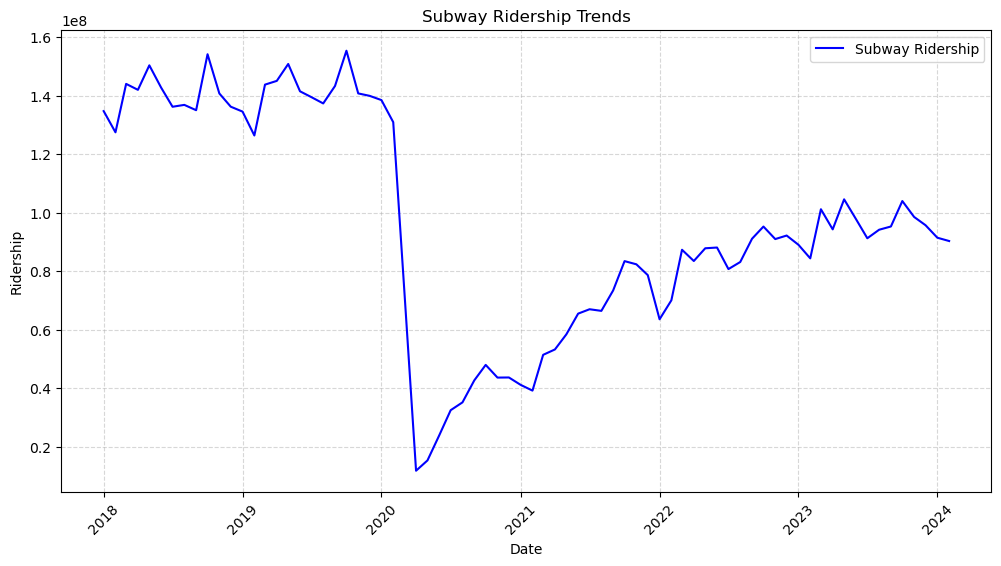

In [53]:
x = subway.index
y = subway['Ridership']

plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Subway Ridership', color='blue')

# Add titles and labels
plt.title('Subway Ridership Trends')
plt.xlabel('Date')
plt.ylabel('Ridership')

# Improve date formatting on the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Show only year ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format dates as 'Year'
plt.xticks(rotation=45)  # Rotate dates for better readability

plt.legend()

# Optional: Add a grid for better readability of the plot
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

In [55]:
# Load the BART ridership data without immediately parsing dates
daily_bart = pd.read_csv(
    "BART Data.csv",
    index_col='Date'
).dropna()

# Convert the index to datetime after reading
daily_bart.index = pd.to_datetime(daily_bart.index, format='%m/%d/%y')  # Adjust format as necessary

# Ensure the index is sorted
daily_bart.sort_index(inplace=True)

# Display the first and last five rows of the DataFrame

print(daily_bart.head())
print(daily_bart.tail())


            Ridership  % of pre-pandemic
Date                                    
2020-03-02     379775               0.95
2020-03-03     388262               0.93
2020-03-04     384382               0.93
2020-03-05     375216               0.90
2020-03-06     328949               0.88
            Ridership  % of pre-pandemic
Date                                    
2024-07-25     169492               0.41
2024-07-26     142175               0.34
2024-07-27      82136               0.52
2024-07-28      71312               0.66
2024-07-29     139253               0.34


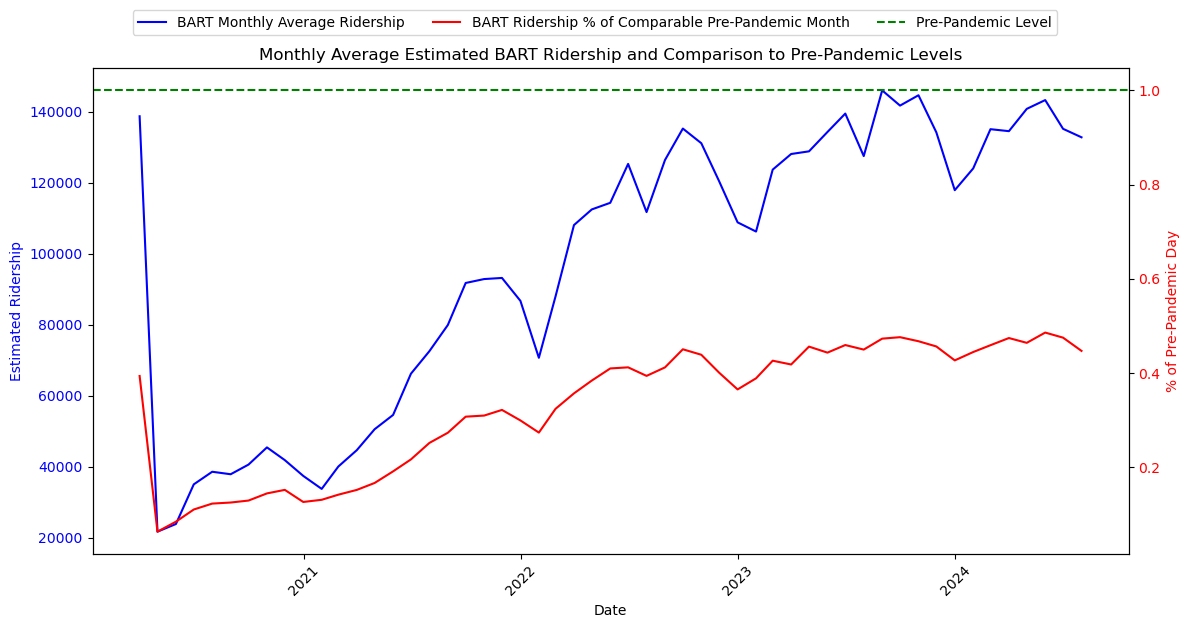

In [57]:
# Resample the data to monthly averages
monthly_bart = daily_bart.resample('M').mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot monthly averaged ridership on the primary y-axis
ax1.plot(monthly_bart.index, monthly_bart['Ridership'], label='BART Monthly Average Ridership', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Estimated Ridership', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Setting the x-axis major locator and formatter for better date formatting
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)  # Rotate dates for better readability

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(monthly_bart.index, monthly_bart['% of pre-pandemic'], label='BART Ridership % of Comparable Pre-Pandemic Month', color='red')
ax2.set_ylabel('% of Pre-Pandemic Day', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a horizontal line at 100% for the secondary y-axis
ax2.axhline(y=1.0, color='green', linestyle='--', label='Pre-Pandemic Level')

# Add title and legend
plt.title('Monthly Average Estimated BART Ridership and Comparison to Pre-Pandemic Levels')
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)  # Adjust legend to top center

# Display the plot
plt.show()


In [59]:
# Group the data by day of the week and calculate the average traffic
day_week_traffic = dr_df["subway_est"].groupby(by=[dr_df.index.isocalendar().day]).mean()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(day_week_traffic, marker='o', linestyle='-', label='Subway Estimated Ridership')
plt.xlabel("Day of the Week")
plt.ylabel("Average Estimated Ridership")
plt.title("Average Subway Estimated Ridership by Day of the Week")
plt.xticks(ticks=range(1, 8), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

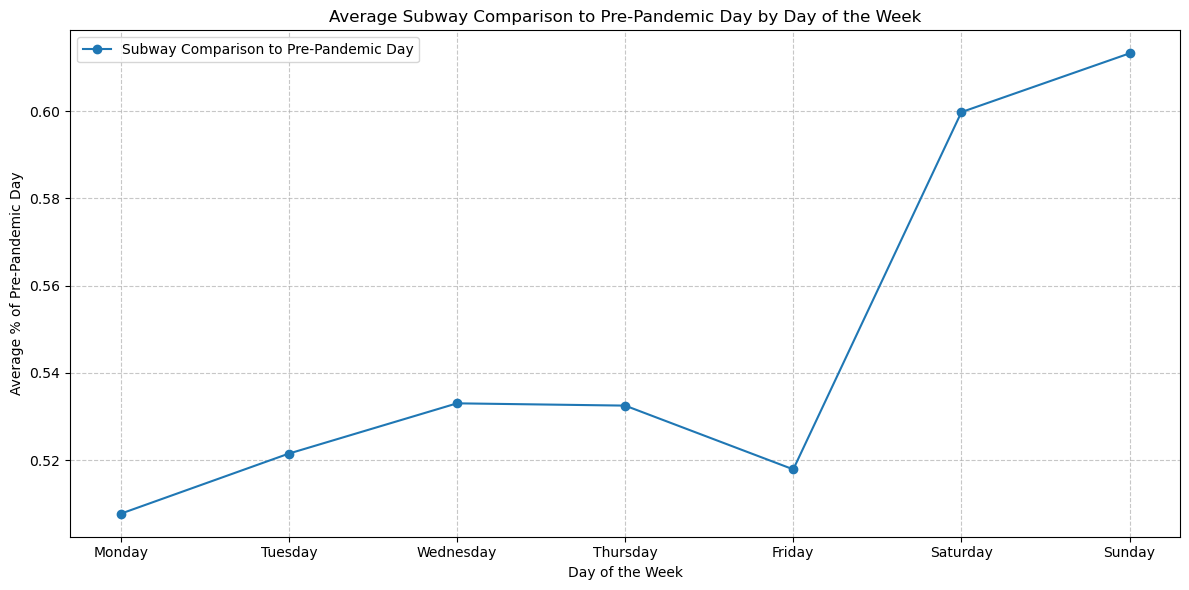

In [61]:
# Group the data by day of the week and calculate the average traffic
day_week_traffic = dr_df["subway_comp"].groupby(by=[dr_df.index.isocalendar().day]).mean()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(day_week_traffic, marker='o', linestyle='-', label='Subway Comparison to Pre-Pandemic Day')
plt.xlabel("Day of the Week")
plt.ylabel("Average % of Pre-Pandemic Day")
plt.title("Average Subway Comparison to Pre-Pandemic Day by Day of the Week")
plt.xticks(ticks=range(1, 8), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [71]:
# Filter for Manhattan and San Francisco data
manhattan_data = df[df['Market'] == 'Manhattan']
sf_data = df[df['Market'] == 'San Francisco']

# Create a combined DataFrame for correlation analysis
combined_df = pd.DataFrame({
    'NY_vacancy': manhattan_data['Total Vacancy Rate'].reset_index(drop=True),
    'NY_listing': manhattan_data['Listing Rate'].reset_index(drop=True),
    'SF_vacancy': sf_data['Total Vacancy Rate'].reset_index(drop=True),
    'SF_listing': sf_data['Listing Rate'].reset_index(drop=True),
    'subway_est': dr_df['subway_est'].reset_index(drop=True),
    'subway_comp': dr_df['subway_comp'].reset_index(drop=True)
})

# Calculate the correlation matrix for the relevant columns
correlation_matrix = combined_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
ax.set_title('Correlation Heatmap: CRE Trends vs. Commuting Trends in New York')

# Display the plot
plt.tight_layout()
plt.show()
